In [1]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score as sil

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as ac
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing
from sklearn import metrics

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import AdaBoostClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

from sklearn import svm
from sklearn.svm import SVC

from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB

from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


In [2]:
import warnings
warnings.filterwarnings("ignore")

## Load the data

In [3]:
df=pd.read_csv("marketing_campaign.csv")

## Exploratory Data Analysis

In [4]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [5]:
df.tail()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
2235         1  13-06-2013       46       709  ...                  5   
2236         1  10-06-2014       56       406  ...                  7   
2237         0  25-01-2014       91       908  ...                  6   
2238         1  24-01-2014        8       428  ...                  3   
2239         1  15-10-2012       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[5 rows x 29 columns]

In [6]:
df.shape

(2240, 29)

In [7]:
df.sample(5)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
173   1880        1959         PhD       Together  53537.0        1         1   
1794  9905        1952  Graduation       Together  34074.0        1         1   
861    807        1969      Master       Together  44602.0        1         1   
1210  5644        1957  Graduation       Together  42213.0        0         1   
1354  2407        1982  Graduation        Married  69109.0        0         0   

     Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
173   30-01-2014       17        81  ...                  5             0   
1794  13-07-2013       69       135  ...                  6             1   
861   15-02-2014       35       167  ...                  8             0   
1210  12-10-2013       96       309  ...                  7             0   
1354  09-11-2012       10       823  ...                  4             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
173              0             0             0             0         0   
1794             0             0             0             0         0   
861              0             0             0             0         0   
1210             1             0             0             0         0   
1354             0             1             0             0         0   

      Z_CostContact  Z_Revenue  Response  
173               3         11         0  
1794              3         11         0  
861               3         11         0  
1210              3         11         0  
1354              3         11         1  

[5 rows x 29 columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [9]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

### Mean Imputation

In [10]:
mean_Income = df['Income'].mean()
mean_Income

52247.25135379061

In [11]:
df1 = df.copy()

In [12]:
df1.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [13]:
df1.shape

(2240, 29)

In [14]:
df1['Income'] = df1['Income'].fillna(mean_Income)

In [15]:
df1.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [16]:
df1.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2240.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25037.797168     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35538.750000     0.000000     0.000000   
50%     5458.500000  1970.000000   51741.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68289.750000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

In [17]:
df1[df1.duplicated()].shape

(0, 29)

In [18]:
df1.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [19]:
df1[['Education', 'Marital_Status']]=df1[['Education', 'Marital_Status']].astype('category')

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   2240 non-null   int64   
 1   Year_Birth           2240 non-null   int64   
 2   Education            2240 non-null   category
 3   Marital_Status       2240 non-null   category
 4   Income               2240 non-null   float64 
 5   Kidhome              2240 non-null   int64   
 6   Teenhome             2240 non-null   int64   
 7   Dt_Customer          2240 non-null   object  
 8   Recency              2240 non-null   int64   
 9   MntWines             2240 non-null   int64   
 10  MntFruits            2240 non-null   int64   
 11  MntMeatProducts      2240 non-null   int64   
 12  MntFishProducts      2240 non-null   int64   
 13  MntSweetProducts     2240 non-null   int64   
 14  MntGoldProds         2240 non-null   int64   
 15  NumDealsPurchases    

In [21]:
df1.Education.value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [22]:
df1.Marital_Status.value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [23]:
df1['Dt_Customer'] = pd.DatetimeIndex(df1['Dt_Customer'])

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   category      
 3   Marital_Status       2240 non-null   category      
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

<AxesSubplot:ylabel='Education'>

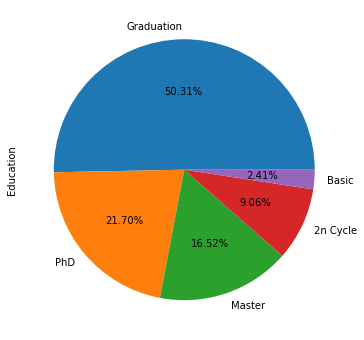

In [25]:
plt.figure(figsize=(6,6))
df1.Education.value_counts().plot(kind='pie',autopct="%1.2f%%")

<AxesSubplot:ylabel='Marital_Status'>

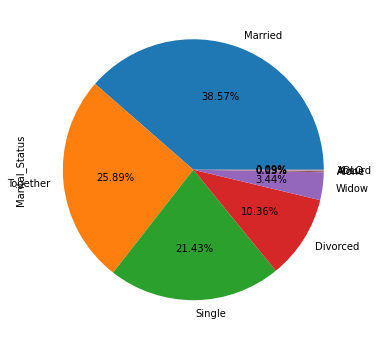

In [26]:
plt.figure(figsize=(6,6))
df1.Marital_Status.value_counts().plot(kind='pie',autopct="%1.2f%%")

Text(0.5, 0, "Customer's yearly household income")

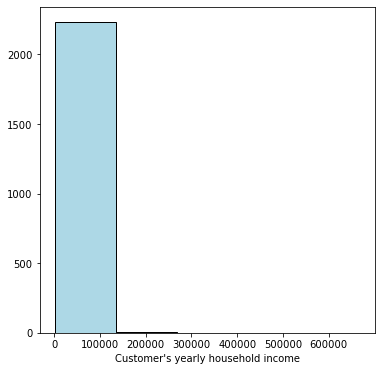

In [27]:
plt.figure(figsize=(6,6))
plt.hist(df1['Income'],facecolor="lightblue",edgecolor="black",bins=5)
plt.xlabel("Customer's yearly household income")

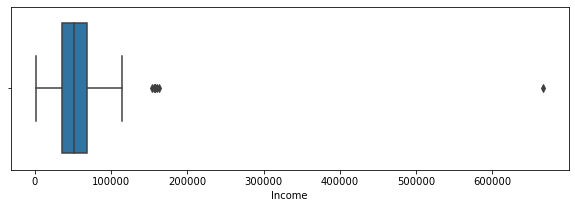

In [28]:
plt.figure(figsize=(10,3))
sns.boxplot(df1.Income)
plt.xlabel('Income')
plt.show()

<AxesSubplot:xlabel='Education'>

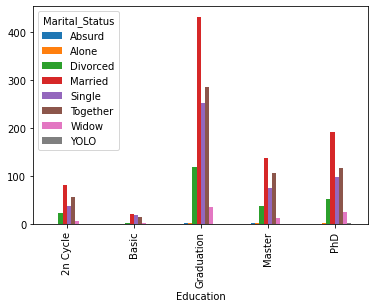

In [29]:
pd.crosstab(df1.Education,df1.Marital_Status).plot(kind="bar")

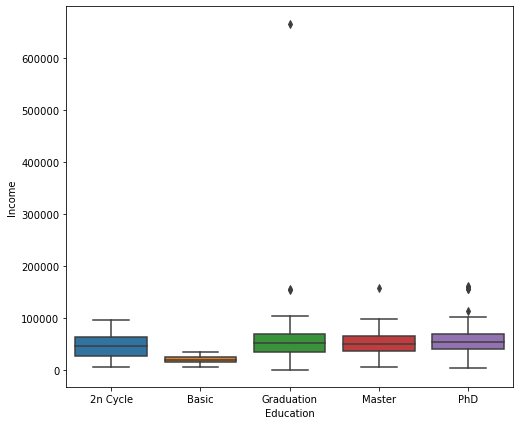

In [30]:
plt.figure(figsize=(8,7))
sns.boxplot(x='Education', y='Income', data=df1)
plt.ylabel('Income')
plt.show()

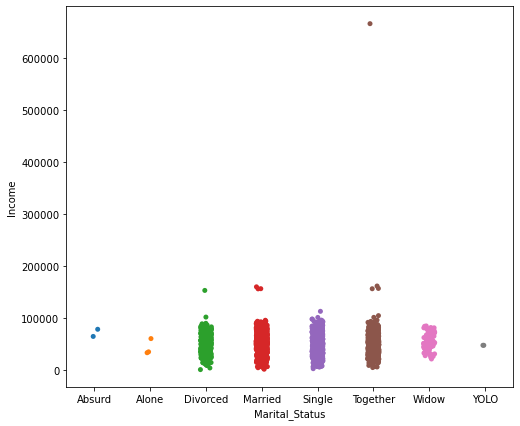

In [31]:
plt.figure(figsize=(8,7))
sns.stripplot(x='Marital_Status', y='Income', data=df1)
plt.ylabel('Income')
plt.show()

### Removing the outlier at Income = 666666.0

In [32]:
df1[df1.Income>600000]

ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
2233  9432        1977  Graduation       Together  666666.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
2233         0  2013-02-06       23         9  ...                  6   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
2233             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
2233         0              3         11         0  

[1 rows x 29 columns]

In [33]:
df2 = df1.copy()
df2.drop(2233,axis=0,inplace=True)

In [34]:
df2.shape

(2239, 29)

Text(0.5, 0, "Customer's yearly household income")

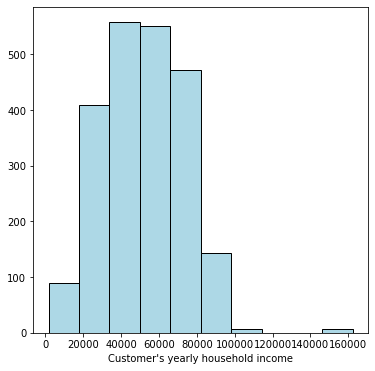

In [35]:
plt.figure(figsize=(6,6))
plt.hist(df2['Income'],facecolor="lightblue",edgecolor="black")
plt.xlabel("Customer's yearly household income")

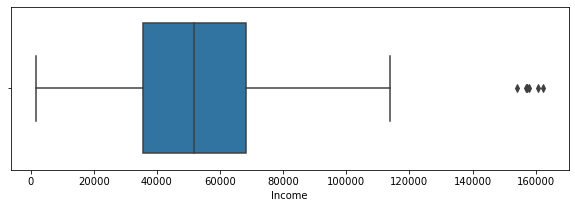

In [36]:
plt.figure(figsize=(10,3))
sns.boxplot(df2.Income)
plt.xlabel('Income')
plt.show()

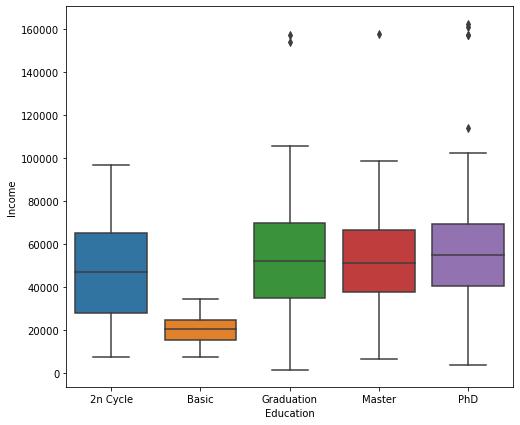

In [37]:
plt.figure(figsize=(8,7))
sns.boxplot(x='Education', y='Income', data=df2)
plt.ylabel('Income')
plt.show()

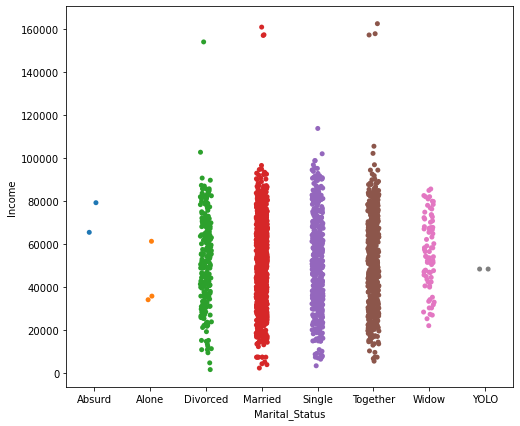

In [38]:
plt.figure(figsize=(8,7))
sns.stripplot(x='Marital_Status', y='Income', data=df2)
plt.ylabel('Income')
plt.show()

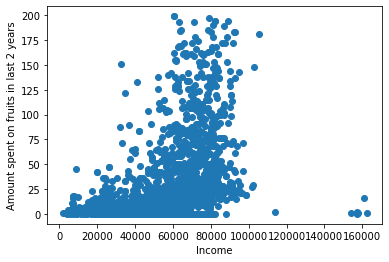

In [39]:
plt.scatter(df2.Income,df2.MntFruits);
plt.xlabel('Income');
plt.ylabel('Amount spent on fruits in last 2 years');

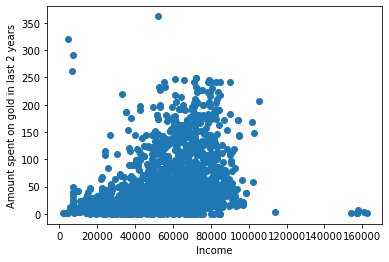

In [40]:
plt.scatter(df2.Income,df2.MntGoldProds);
plt.xlabel('Income');
plt.ylabel('Amount spent on gold in last 2 years');

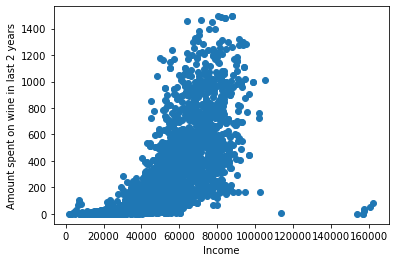

In [41]:
plt.scatter(df2.Income,df2.MntWines);
plt.xlabel('Income');
plt.ylabel('Amount spent on wine in last 2 years');

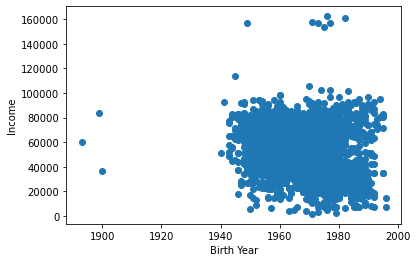

In [42]:
plt.scatter(df2.Year_Birth,df2.Income);
plt.xlabel('Birth Year');
plt.ylabel('Income');

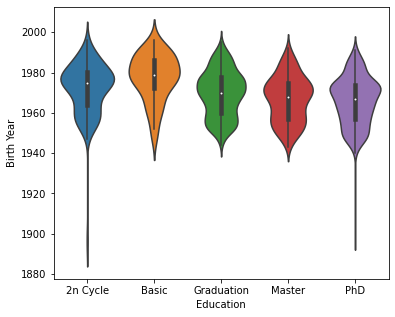

In [43]:
plt.figure(figsize=(6,5))
sns.violinplot(x='Education', y='Year_Birth', data=df2)
plt.ylabel('Birth Year')
plt.show()

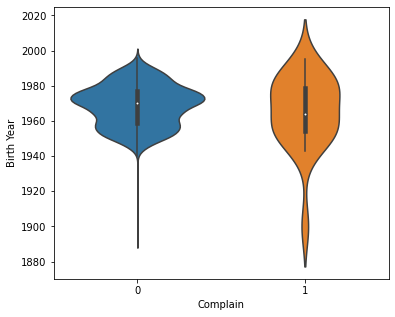

In [44]:
plt.figure(figsize=(6,5))
sns.violinplot(x='Complain', y='Year_Birth', data=df2)
plt.ylabel('Birth Year')
plt.show()

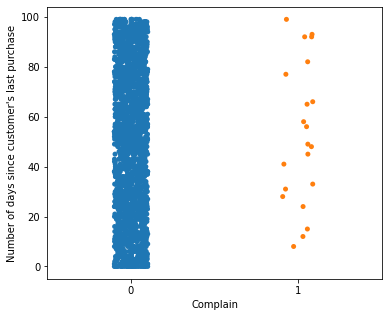

In [45]:
plt.figure(figsize=(6,5))
sns.stripplot(x='Complain', y='Recency', data=df2)
plt.ylabel("Number of days since customer's last purchase")
plt.show()

### Creating dummy variables for categorical columns

In [46]:
data=pd.get_dummies(df2)
data.head()

ID  Year_Birth   Income  Kidhome  Teenhome Dt_Customer  Recency  \
0  5524        1957  58138.0        0         0  2012-04-09       58   
1  2174        1954  46344.0        1         1  2014-08-03       38   
2  4141        1965  71613.0        0         0  2013-08-21       26   
3  6182        1984  26646.0        1         0  2014-10-02       26   
4  5324        1981  58293.0        1         0  2014-01-19       94   

   MntWines  MntFruits  MntMeatProducts  ...  Education_Master  Education_PhD  \
0       635         88              546  ...                 0              0   
1        11          1                6  ...                 0              0   
2       426         49              127  ...                 0              0   
3        11          4               20  ...                 0              0   
4       173         43              118  ...                 0              1   

   Marital_Status_Absurd  Marital_Status_Alone  Marital_Status_Divorced  \
0                      0                     0                        0   
1                      0                     0                        0   
2                      0                     0                        0   
3                      0                     0                        0   
4                      0                     0                        0   

   Marital_Status_Married  Marital_Status_Single  Marital_Status_Together  \
0                       0                      1                        0   
1                       0                      1                        0   
2                       0                      0                        1   
3                       0                      0                        1   
4                       1                      0                        0   

   Marital_Status_Widow  Marital_Status_YOLO  
0                     0                    0  
1                     0                    0  
2                     0                    0  
3                     0                    0  
4                     0                    0  

[5 rows x 40 columns]

In [47]:
data.columns

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Education_2n Cycle', 'Education_Basic', 'Education_Graduation',
       'Education_Master', 'Education_PhD', 'Marital_Status_Absurd',
       'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO'],
      dtype='object')

## Clustering

### Normalization of data

In [48]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return x

In [49]:
data1_norm = norm_func(data.iloc[:,1:24])

In [50]:
data1_norm.head()

Year_Birth    Income Kidhome Teenhome  Dt_Customer   Recency  MntWines  \
0   0.621359  0.351086     0.0      0.0     0.086548  0.585859  0.425318   
1   0.592233   0.27768     0.5      0.5     0.882408  0.383838  0.007368   
2   0.699029  0.434956     0.0      0.0     0.555974  0.262626  0.285332   
3   0.883495  0.155079     0.5      0.0     0.938852  0.262626  0.007368   
4   0.854369  0.352051     0.5      0.0     0.698024  0.949495  0.115874   

  MntFruits MntMeatProducts MntFishProducts  ... NumWebPurchases  \
0  0.442211        0.316522        0.664093  ...        0.296296   
1  0.005025        0.003478        0.007722  ...        0.037037   
2  0.246231        0.073623        0.428571  ...        0.296296   
3  0.020101        0.011594         0.03861  ...        0.074074   
4   0.21608        0.068406        0.177606  ...        0.185185   

  NumCatalogPurchases NumStorePurchases NumWebVisitsMonth AcceptedCmp3  \
0            0.357143          0.307692              0.35          0.0   
1            0.035714          0.153846              0.25          0.0   
2            0.071429          0.769231               0.2          0.0   
3                 0.0          0.307692               0.3          0.0   
4            0.107143          0.461538              0.25          0.0   

  AcceptedCmp4 AcceptedCmp5 AcceptedCmp1 AcceptedCmp2 Complain  
0          0.0          0.0          0.0          0.0      0.0  
1          0.0          0.0          0.0          0.0      0.0  
2          0.0          0.0          0.0          0.0      0.0  
3          0.0          0.0          0.0          0.0      0.0  
4          0.0          0.0          0.0          0.0      0.0  

[5 rows x 23 columns]

In [51]:
data2_norm = norm_func(data.iloc[:,26:])

In [52]:
data2_norm.head()

Response  Education_2n Cycle  Education_Basic  Education_Graduation  \
0       1.0                 0.0              0.0                   1.0   
1       0.0                 0.0              0.0                   1.0   
2       0.0                 0.0              0.0                   1.0   
3       0.0                 0.0              0.0                   1.0   
4       0.0                 0.0              0.0                   0.0   

   Education_Master  Education_PhD  Marital_Status_Absurd  \
0               0.0            0.0                    0.0   
1               0.0            0.0                    0.0   
2               0.0            0.0                    0.0   
3               0.0            0.0                    0.0   
4               0.0            1.0                    0.0   

   Marital_Status_Alone  Marital_Status_Divorced  Marital_Status_Married  \
0                   0.0                      0.0                     0.0   
1                   0.0                      0.0                     0.0   
2                   0.0                      0.0                     0.0   
3                   0.0                      0.0                     0.0   
4                   0.0                      0.0                     1.0   

   Marital_Status_Single  Marital_Status_Together  Marital_Status_Widow  \
0                    1.0                      0.0                   0.0   
1                    1.0                      0.0                   0.0   
2                    0.0                      1.0                   0.0   
3                    0.0                      1.0                   0.0   
4                    0.0                      0.0                   0.0   

   Marital_Status_YOLO  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

In [53]:
data_norm = pd.concat([data1_norm,data2_norm],axis=1)

In [54]:
data_norm.head()

Year_Birth    Income Kidhome Teenhome  Dt_Customer   Recency  MntWines  \
0   0.621359  0.351086     0.0      0.0     0.086548  0.585859  0.425318   
1   0.592233   0.27768     0.5      0.5     0.882408  0.383838  0.007368   
2   0.699029  0.434956     0.0      0.0     0.555974  0.262626  0.285332   
3   0.883495  0.155079     0.5      0.0     0.938852  0.262626  0.007368   
4   0.854369  0.352051     0.5      0.0     0.698024  0.949495  0.115874   

  MntFruits MntMeatProducts MntFishProducts  ... Education_Master  \
0  0.442211        0.316522        0.664093  ...              0.0   
1  0.005025        0.003478        0.007722  ...              0.0   
2  0.246231        0.073623        0.428571  ...              0.0   
3  0.020101        0.011594         0.03861  ...              0.0   
4   0.21608        0.068406        0.177606  ...              0.0   

  Education_PhD Marital_Status_Absurd Marital_Status_Alone  \
0           0.0                   0.0                  0.0   
1           0.0                   0.0                  0.0   
2           0.0                   0.0                  0.0   
3           0.0                   0.0                  0.0   
4           1.0                   0.0                  0.0   

  Marital_Status_Divorced Marital_Status_Married Marital_Status_Single  \
0                     0.0                    0.0                   1.0   
1                     0.0                    0.0                   1.0   
2                     0.0                    0.0                   0.0   
3                     0.0                    0.0                   0.0   
4                     0.0                    1.0                   0.0   

  Marital_Status_Together Marital_Status_Widow Marital_Status_YOLO  
0                     0.0                  0.0                 0.0  
1                     0.0                  0.0                 0.0  
2                     1.0                  0.0                 0.0  
3                     1.0                  0.0                 0.0  
4                     0.0                  0.0                 0.0  

[5 rows x 37 columns]

## Hierarchical Clustering

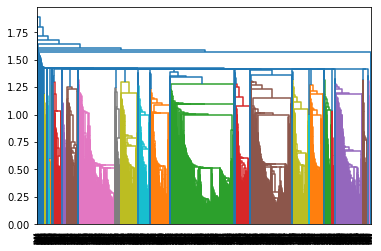

In [55]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(data_norm, method='single'))

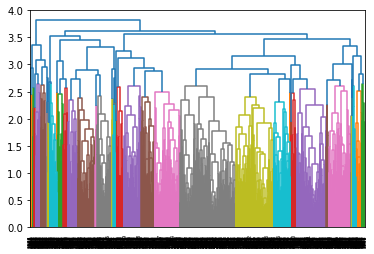

In [56]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(data_norm, method='complete'))

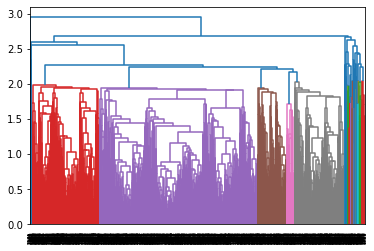

In [57]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(data_norm, method='average'))

### Hierarchical Clustering - Single Linkage

In [58]:
# create clusters
hc_s = AgglomerativeClustering(n_clusters=10, affinity = 'euclidean', linkage = 'single')

In [59]:
hc_s.fit_predict(data_norm)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [60]:
y_hc_s = hc_s.fit_predict(data_norm)

In [61]:
data['h_clusterid_s'] = y_hc_s
data.head()

ID  Year_Birth   Income  Kidhome  Teenhome Dt_Customer  Recency  \
0  5524        1957  58138.0        0         0  2012-04-09       58   
1  2174        1954  46344.0        1         1  2014-08-03       38   
2  4141        1965  71613.0        0         0  2013-08-21       26   
3  6182        1984  26646.0        1         0  2014-10-02       26   
4  5324        1981  58293.0        1         0  2014-01-19       94   

   MntWines  MntFruits  MntMeatProducts  ...  Education_PhD  \
0       635         88              546  ...              0   
1        11          1                6  ...              0   
2       426         49              127  ...              0   
3        11          4               20  ...              0   
4       173         43              118  ...              1   

   Marital_Status_Absurd  Marital_Status_Alone  Marital_Status_Divorced  \
0                      0                     0                        0   
1                      0                     0                        0   
2                      0                     0                        0   
3                      0                     0                        0   
4                      0                     0                        0   

   Marital_Status_Married  Marital_Status_Single  Marital_Status_Together  \
0                       0                      1                        0   
1                       0                      1                        0   
2                       0                      0                        1   
3                       0                      0                        1   
4                       1                      0                        0   

   Marital_Status_Widow  Marital_Status_YOLO  h_clusterid_s  
0                     0                    0              1  
1                     0                    0              1  
2                     0                    0              1  
3                     0                    0              1  
4                     0                    0              1  

[5 rows x 41 columns]

In [62]:
data.groupby(["h_clusterid_s"])["ID"].apply(lambda x:tuple(x))

h_clusterid_s
0                                   (9369, 4947, 1524)
1    (5524, 2174, 4141, 6182, 5324, 7446, 965, 6177...
2                                         (8732, 6906)
3                                              (1665,)
4                                         (9516, 3968)
5                                              (4427,)
6                                              (2186,)
7                                              (9058,)
8                                              (5376,)
9                                              (3520,)
Name: ID, dtype: object

In [63]:
data.groupby(["h_clusterid_s"])["ID"].count()

h_clusterid_s
0       3
1    2226
2       2
3       1
4       2
5       1
6       1
7       1
8       1
9       1
Name: ID, dtype: int64

### Silhouette score for Hierarchical Clustering - Single Linkage

In [64]:
nc=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50]
sc_score=[]    
for i in nc:
    hc = AgglomerativeClustering(n_clusters=i, affinity = 'euclidean', linkage = 'single')
    y=hc.fit_predict(data_norm)
    sc_score.append(sil(data_norm,y))

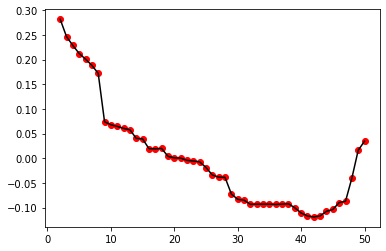

In [65]:
plt.plot(nc,sc_score,color="black")
plt.scatter(nc,sc_score,color="red")
plt.show()

In [66]:
sc_score

[0.2820019622963619,
 0.24684996770921358,
 0.22880877308915723,
 0.21249126720312334,
 0.20118420453816027,
 0.18851691641084972,
 0.17219567328914137,
 0.07394802500028329,
 0.06805864813301316,
 0.0646204771323891,
 0.06070246756949973,
 0.057805994148808264,
 0.04032642403311619,
 0.03938771415557937,
 0.019472974391458772,
 0.01916270399969135,
 0.0199809570991046,
 0.003912119200852843,
 0.0008432037145403781,
 0.0003601361439641566,
 -0.004289220924033861,
 -0.005518010091285757,
 -0.00724985330188001,
 -0.01878453549563507,
 -0.03393554961293637,
 -0.03826576832929361,
 -0.03875689617810598,
 -0.0724457694090827,
 -0.0832630508805228,
 -0.08505034781622192,
 -0.09352149865249403,
 -0.09310140350830785,
 -0.09308967779742736,
 -0.09305834570820301,
 -0.09377673470309619,
 -0.092943067129983,
 -0.0923488120654433,
 -0.10039012628491423,
 -0.11103200970586954,
 -0.11705348754245778,
 -0.11897596533223734,
 -0.11698402372317517,
 -0.10759262293617447,
 -0.10388655768161735,
 -0.089

### Hierarchical Clustering - Complete Linkage

In [67]:
# create clusters
hc_c = AgglomerativeClustering(n_clusters=10, affinity = 'euclidean', linkage = 'complete')

In [68]:
hc_c.fit_predict(data_norm)

array([2, 2, 2, ..., 2, 4, 0], dtype=int64)

In [69]:
y_hc_c = hc_c.fit_predict(data_norm)

In [70]:
data['h_clusterid_c'] = y_hc_c
data.head()

ID  Year_Birth   Income  Kidhome  Teenhome Dt_Customer  Recency  \
0  5524        1957  58138.0        0         0  2012-04-09       58   
1  2174        1954  46344.0        1         1  2014-08-03       38   
2  4141        1965  71613.0        0         0  2013-08-21       26   
3  6182        1984  26646.0        1         0  2014-10-02       26   
4  5324        1981  58293.0        1         0  2014-01-19       94   

   MntWines  MntFruits  MntMeatProducts  ...  Marital_Status_Absurd  \
0       635         88              546  ...                      0   
1        11          1                6  ...                      0   
2       426         49              127  ...                      0   
3        11          4               20  ...                      0   
4       173         43              118  ...                      0   

   Marital_Status_Alone  Marital_Status_Divorced  Marital_Status_Married  \
0                     0                        0                       0   
1                     0                        0                       0   
2                     0                        0                       0   
3                     0                        0                       0   
4                     0                        0                       1   

   Marital_Status_Single  Marital_Status_Together  Marital_Status_Widow  \
0                      1                        0                     0   
1                      1                        0                     0   
2                      0                        1                     0   
3                      0                        1                     0   
4                      0                        0                     0   

   Marital_Status_YOLO  h_clusterid_s  h_clusterid_c  
0                    0              1              2  
1                    0              1              2  
2                    0              1              2  
3                    0              1              2  
4                    0              1              0  

[5 rows x 42 columns]

In [71]:
data.groupby(["h_clusterid_c"])["ID"].apply(lambda x:tuple(x))

h_clusterid_c
0    (5324, 6177, 4855, 5899, 387, 5376, 1993, 4047...
1    (8180, 6864, 7987, 7829, 5552, 5341, 4391, 469...
2    (5524, 2174, 4141, 6182, 965, 1994, 2125, 2569...
3    (2278, 10755, 9909, 9369, 10629, 10401, 5346, ...
4    (7446, 3033, 8755, 10738, 503, 2139, 4114, 626...
5    (2225, 8908, 999, 1592, 7215, 10240, 9529, 217...
6    (8595, 8614, 6518, 7247, 1377, 313, 10102, 660...
7    (2114, 10314, 2798, 3725, 5547, 2574, 10446, 9...
8    (6565, 6853, 6274, 9274, 1361, 3711, 7627, 802...
9    (7373, 2968, 7660, 1461, 10095, 3182, 1184, 97...
Name: ID, dtype: object

In [72]:
data.groupby(["h_clusterid_c"])["ID"].count()

h_clusterid_c
0    429
1     82
2    980
3    176
4    296
5     93
6     74
7     26
8     24
9     59
Name: ID, dtype: int64

### Silhouette score for Hierarchical Clustering - Complete Linkage

In [73]:
nc=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50]
sc_score=[]    
for i in nc:
    hc = AgglomerativeClustering(n_clusters=i, affinity = 'euclidean', linkage = 'complete')
    y=hc.fit_predict(data_norm)
    sc_score.append(sil(data_norm,y))

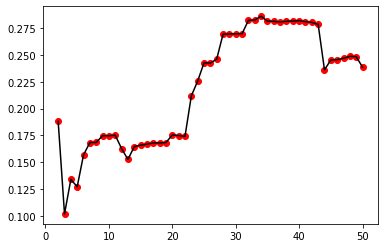

In [74]:
plt.plot(nc,sc_score,color="black")
plt.scatter(nc,sc_score,color="red")
plt.show()

In [75]:
sc_score

[0.18810332120336473,
 0.10210529207691507,
 0.13414821541172708,
 0.12735801042414197,
 0.15692228996434449,
 0.16847027385587257,
 0.16852413829298132,
 0.1748294377309882,
 0.17479425730628378,
 0.17525708032362916,
 0.16282672977893678,
 0.15271203993449986,
 0.16464349542904141,
 0.16599147916512927,
 0.16691512004837647,
 0.16817299175703715,
 0.16811231248062064,
 0.1684542919696226,
 0.17546255633880395,
 0.17497494700299757,
 0.17414650508309815,
 0.2117866677927261,
 0.2255824594341589,
 0.2424963233938507,
 0.24234072236825882,
 0.24596968536499267,
 0.26910990333279783,
 0.2694132377128149,
 0.2695490397930314,
 0.26958635143875004,
 0.2819659730194816,
 0.2823040702757543,
 0.28583723893806035,
 0.2812436594075005,
 0.28109601595708367,
 0.2805309929451847,
 0.2811875477090031,
 0.2813676101056778,
 0.2817744963303196,
 0.28085045422389254,
 0.2801367598608088,
 0.27830940215224453,
 0.23602088459359075,
 0.2452110510900628,
 0.24547248787978862,
 0.2467877481776368,
 0.24

### Hierarchical Clustering - Average Linkage

In [76]:
# create clusters
hc_a = AgglomerativeClustering(n_clusters=10, affinity = 'euclidean', linkage = 'average')

In [77]:
hc_a.fit_predict(data_norm)

array([5, 5, 5, ..., 5, 5, 5], dtype=int64)

In [78]:
y_hc_a = hc_a.fit_predict(data_norm)

In [79]:
data['h_clusterid_a'] = y_hc_a
data.head()

ID  Year_Birth   Income  Kidhome  Teenhome Dt_Customer  Recency  \
0  5524        1957  58138.0        0         0  2012-04-09       58   
1  2174        1954  46344.0        1         1  2014-08-03       38   
2  4141        1965  71613.0        0         0  2013-08-21       26   
3  6182        1984  26646.0        1         0  2014-10-02       26   
4  5324        1981  58293.0        1         0  2014-01-19       94   

   MntWines  MntFruits  MntMeatProducts  ...  Marital_Status_Alone  \
0       635         88              546  ...                     0   
1        11          1                6  ...                     0   
2       426         49              127  ...                     0   
3        11          4               20  ...                     0   
4       173         43              118  ...                     0   

   Marital_Status_Divorced  Marital_Status_Married  Marital_Status_Single  \
0                        0                       0                      1   
1                        0                       0                      1   
2                        0                       0                      0   
3                        0                       0                      0   
4                        0                       1                      0   

   Marital_Status_Together  Marital_Status_Widow  Marital_Status_YOLO  \
0                        0                     0                    0   
1                        0                     0                    0   
2                        1                     0                    0   
3                        1                     0                    0   
4                        0                     0                    0   

   h_clusterid_s  h_clusterid_c  h_clusterid_a  
0              1              2              5  
1              1              2              5  
2              1              2              5  
3              1              2              5  
4              1              0              5  

[5 rows x 43 columns]

In [80]:
data.groupby(["h_clusterid_a"])["ID"].apply(lambda x:tuple(x))

h_clusterid_a
0    (2225, 7503, 4452, 8908, 999, 7215, 2798, 9529...
1    (2114, 10314, 3762, 3725, 2574, 10446, 9493, 5...
2                                        (5255, 10971)
3    (6565, 6260, 6853, 6274, 2926, 9274, 1361, 603...
4                                         (9516, 3968)
5    (5524, 2174, 4141, 6182, 5324, 7446, 965, 6177...
6                                   (5376, 8475, 1501)
7     (9369, 4947, 8779, 4073, 9984, 1524, 4427, 6815)
8                                              (1665,)
9                                              (3520,)
Name: ID, dtype: object

In [81]:
data.groupby(["h_clusterid_a"])["ID"].count()

h_clusterid_a
0      69
1      21
2       2
3      38
4       2
5    2094
6       3
7       8
8       1
9       1
Name: ID, dtype: int64

### Silhouette score for Hierarchical Clustering - Average Linkage

In [82]:
nc=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50]
sc_score=[]    
for i in nc:
    hc = AgglomerativeClustering(n_clusters=i, affinity = 'euclidean', linkage = 'average')
    y=hc.fit_predict(data_norm)
    sc_score.append(sil(data_norm,y))

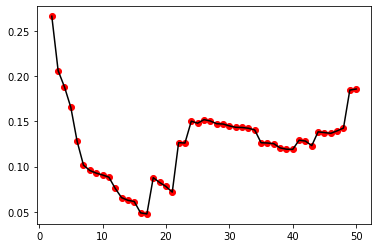

In [83]:
plt.plot(nc,sc_score,color="black")
plt.scatter(nc,sc_score,color="red")
plt.show()

In [84]:
sc_score

[0.2660208543614508,
 0.20589552561198965,
 0.18798660648351953,
 0.16541440298419197,
 0.1277459935763847,
 0.10160644201466873,
 0.09571691423783031,
 0.0928280457673903,
 0.09076847737997015,
 0.08834467681259167,
 0.07602498773654129,
 0.06575171819241911,
 0.06281367958480291,
 0.06147572394428333,
 0.04894881188619585,
 0.047772013739371386,
 0.08778670608153023,
 0.08249716630304543,
 0.07808214536732498,
 0.07188578727104063,
 0.12646935981765442,
 0.12603653711035032,
 0.1501599422112788,
 0.14792718159750357,
 0.15185790752406605,
 0.15038138463468256,
 0.14737163912389425,
 0.14703613912321556,
 0.14499325431126175,
 0.14340013596508636,
 0.14319214125443575,
 0.14236507453114186,
 0.14049372806634453,
 0.1263945940629943,
 0.12607223079427635,
 0.12534663279017172,
 0.12068974963703552,
 0.11922198862947708,
 0.1190453046519122,
 0.12916423642395294,
 0.1281953266090779,
 0.12317394146013247,
 0.1384168127007268,
 0.1375643271777328,
 0.13677655394273822,
 0.139480533578279

## DBSCAN

In [85]:
dbs=DBSCAN(min_samples=18,eps=1.2)
dbs_labels=dbs.fit_predict(data_norm)

In [86]:
dbs_labels

array([0, 0, 1, ..., 4, 3, 2], dtype=int64)

In [87]:
data['d_clusterid'] = dbs_labels

In [88]:
data.groupby(["d_clusterid"])["ID"].apply(lambda x:tuple(x))

d_clusterid
-1     (2114, 6565, 5376, 5255, 2968, 2225, 6260, 685...
 0     (5524, 2174, 7892, 1371, 7244, 1331, 7437, 855...
 1     (4141, 6182, 4939, 1409, 5710, 8430, 7286, 307...
 2     (5324, 6177, 1993, 4047, 1966, 4339, 6566, 837...
 3     (7446, 3033, 4119, 5798, 3267, 9805, 11084, 28...
 4     (965, 2125, 10383, 5846, 535, 11100, 7386, 105...
 5     (4855, 5899, 11051, 1685, 7055, 1880, 5602, 47...
 6     (1994, 2569, 9736, 9360, 2404, 9422, 8601, 938...
 7     (387, 2563, 4669, 8151, 2457, 6682, 1777, 6516...
 8     (8180, 6864, 5552, 4391, 4697, 5954, 5154, 313...
 9     (2278, 1473, 7264, 11004, 7301, 4279, 8181, 10...
 10    (8755, 503, 2139, 4114, 1402, 1859, 273, 10991...
 11    (10738, 11178, 6205, 821, 2795, 10236, 5726, 6...
 12    (10755, 9909, 10629, 5346, 367, 5885, 3559, 89...
 13    (7281, 1016, 2937, 5823, 1030, 9449, 5304, 315...
 14    (8595, 8614, 7247, 10102, 6609, 8842, 6878, 78...
 15    (10401, 5234, 1491, 7798, 1755, 2227, 9262, 55...
 16    (7373, 1461,

In [89]:
data.groupby(["d_clusterid"])["ID"].count()

d_clusterid
-1     300
 0     230
 1     252
 2     168
 3      96
 4     105
 5     101
 6     403
 7      19
 8      33
 9      31
 10    125
 11     65
 12     70
 13     86
 14     29
 15     53
 16     37
 17     18
 18     18
Name: ID, dtype: int64

In [90]:
data.tail()

ID  Year_Birth   Income  Kidhome  Teenhome Dt_Customer  Recency  \
2235  10870        1967  61223.0        0         1  2013-06-13       46   
2236   4001        1946  64014.0        2         1  2014-10-06       56   
2237   7270        1981  56981.0        0         0  2014-01-25       91   
2238   8235        1956  69245.0        0         1  2014-01-24        8   
2239   9405        1954  52869.0        1         1  2012-10-15       40   

      MntWines  MntFruits  MntMeatProducts  ...  Marital_Status_Divorced  \
2235       709         43              182  ...                        0   
2236       406          0               30  ...                        0   
2237       908         48              217  ...                        1   
2238       428         30              214  ...                        0   
2239        84          3               61  ...                        0   

      Marital_Status_Married  Marital_Status_Single  Marital_Status_Together  \
2235                       1                      0                        0   
2236                       0                      0                        1   
2237                       0                      0                        0   
2238                       0                      0                        1   
2239                       1                      0                        0   

      Marital_Status_Widow  Marital_Status_YOLO  h_clusterid_s  h_clusterid_c  \
2235                     0                    0              1              2   
2236                     0                    0              1              0   
2237                     0                    0              1              2   
2238                     0                    0              1              4   
2239                     0                    0              1              0   

      h_clusterid_a  d_clusterid  
2235              5            6  
2236              5           -1  
2237              5            4  
2238              5            3  
2239              5            2  

[5 rows x 44 columns]

### Drop outliers found in DBSCAN Clustering

In [91]:
data_norm['d_clusterid'] = dbs_labels

In [92]:
data_norm.head()

Year_Birth    Income Kidhome Teenhome  Dt_Customer   Recency  MntWines  \
0   0.621359  0.351086     0.0      0.0     0.086548  0.585859  0.425318   
1   0.592233   0.27768     0.5      0.5     0.882408  0.383838  0.007368   
2   0.699029  0.434956     0.0      0.0     0.555974  0.262626  0.285332   
3   0.883495  0.155079     0.5      0.0     0.938852  0.262626  0.007368   
4   0.854369  0.352051     0.5      0.0     0.698024  0.949495  0.115874   

  MntFruits MntMeatProducts MntFishProducts  ... Education_PhD  \
0  0.442211        0.316522        0.664093  ...           0.0   
1  0.005025        0.003478        0.007722  ...           0.0   
2  0.246231        0.073623        0.428571  ...           0.0   
3  0.020101        0.011594         0.03861  ...           0.0   
4   0.21608        0.068406        0.177606  ...           1.0   

  Marital_Status_Absurd Marital_Status_Alone Marital_Status_Divorced  \
0                   0.0                  0.0                     0.0   
1                   0.0                  0.0                     0.0   
2                   0.0                  0.0                     0.0   
3                   0.0                  0.0                     0.0   
4                   0.0                  0.0                     0.0   

  Marital_Status_Married Marital_Status_Single Marital_Status_Together  \
0                    0.0                   1.0                     0.0   
1                    0.0                   1.0                     0.0   
2                    0.0                   0.0                     1.0   
3                    0.0                   0.0                     1.0   
4                    1.0                   0.0                     0.0   

  Marital_Status_Widow Marital_Status_YOLO d_clusterid  
0                  0.0                 0.0           0  
1                  0.0                 0.0           0  
2                  0.0                 0.0           1  
3                  0.0                 0.0           1  
4                  0.0                 0.0           2  

[5 rows x 38 columns]

In [93]:
data_norm[data_norm['d_clusterid']==-1]

Year_Birth    Income Kidhome Teenhome  Dt_Customer   Recency  MntWines  \
15     0.514563  0.504584     0.0      0.0     0.301976  0.232323  0.673811   
18     0.543689  0.468453     0.0      0.5     0.418627  0.919192   0.67783   
21     0.834951  0.004463     0.5      0.0     0.479774  0.424242   0.00067   
27     0.902913  0.314422     0.5      0.0     0.384760  0.191919  0.003349   
39     0.485437  0.293887     0.0      0.0     0.338664  0.535354  0.292699   
...         ...       ...     ...      ...          ...       ...       ...   
2208   0.679612  0.082083     0.0      0.5     0.174976  0.525253  0.002009   
2210   0.601942  0.249205     0.0      0.5     0.378175  0.313131  0.202277   
2221   0.864078  0.460872     0.0      0.0     0.428034  0.121212  0.476892   
2228   0.825243  0.314422     0.0      0.0     0.315146  0.535354  0.021433   
2236   0.514563  0.387659     1.0      0.5     0.942615  0.565657  0.271936   

     MntFruits MntMeatProducts MntFishProducts  ... Education_PhD  \
15    0.110553        0.066667        0.227799  ...           1.0   
18     0.40201        0.288696             0.0  ...           0.0   
21    0.005025             1.0        0.003861  ...           0.0   
27    0.005025        0.001739        0.011583  ...           0.0   
39    0.040201         0.11942        0.617761  ...           1.0   
...        ...             ...             ...  ...           ...   
2208  0.015075        0.001739        0.057915  ...           0.0   
2210  0.145729        0.075942        0.123552  ...           0.0   
2221  0.130653        0.311884        0.266409  ...           0.0   
2228   0.01005        0.931594        0.046332  ...           0.0   
2236       0.0        0.017391             0.0  ...           1.0   

     Marital_Status_Absurd Marital_Status_Alone Marital_Status_Divorced  \
15                     0.0                  0.0                     0.0   
18                     0.0                  0.0                     0.0   
21                     0.0                  0.0                     0.0   
27                     0.0                  0.0                     0.0   
39                     0.0                  0.0                     1.0   
...                    ...                  ...                     ...   
2208                   0.0                  0.0                     0.0   
2210                   0.0                  0.0                     1.0   
2221                   0.0                  0.0                     0.0   
2228                   0.0                  0.0                     0.0   
2236                   0.0                  0.0                     0.0   

     Marital_Status_Married Marital_Status_Single Marital_Status_Together  \
15                      0.0                   1.0                     0.0   
18                      1.0                   0.0                     0.0   
21                      1.0                   0.0                     0.0   
27                      0.0                   1.0                     0.0   
39                      0.0                   0.0                     0.0   
...                     ...                   ...                     ...   
2208                    0.0                   0.0                     1.0   
2210                    0.0                   0.0                     0.0   
2221                    0.0                   1.0                     0.0   
2228                    0.0                   0.0                     1.0   
2236                    0.0                   0.0                     1.0   

     Marital_Status_Widow Marital_Status_YOLO d_clusterid  
15                    0.0                 0.0          -1  
18                    0.0                 0.0          -1  
21                    0.0                 0.0          -1  
27                    0.0                 0.0          -1  
39                    0.0                 0.0          -1  
...                   ...                

In [94]:
list(data_norm[data_norm['d_clusterid']==-1].index)

[15,
 18,
 21,
 27,
 39,
 53,
 55,
 60,
 67,
 79,
 87,
 98,
 105,
 111,
 113,
 116,
 124,
 131,
 136,
 138,
 153,
 155,
 164,
 176,
 179,
 190,
 192,
 199,
 203,
 205,
 209,
 217,
 218,
 231,
 240,
 243,
 246,
 252,
 260,
 295,
 296,
 299,
 312,
 319,
 336,
 338,
 339,
 344,
 347,
 351,
 360,
 400,
 404,
 412,
 417,
 418,
 423,
 424,
 426,
 427,
 430,
 437,
 447,
 456,
 466,
 472,
 485,
 489,
 513,
 519,
 523,
 530,
 537,
 543,
 546,
 559,
 575,
 586,
 591,
 611,
 622,
 633,
 644,
 646,
 676,
 678,
 687,
 688,
 690,
 693,
 694,
 703,
 705,
 716,
 734,
 735,
 745,
 749,
 753,
 787,
 791,
 797,
 804,
 820,
 822,
 824,
 825,
 826,
 845,
 852,
 854,
 870,
 875,
 891,
 894,
 906,
 912,
 914,
 917,
 927,
 942,
 943,
 949,
 966,
 973,
 976,
 980,
 984,
 987,
 990,
 1000,
 1001,
 1002,
 1007,
 1010,
 1016,
 1022,
 1030,
 1050,
 1053,
 1066,
 1067,
 1076,
 1084,
 1087,
 1100,
 1111,
 1115,
 1117,
 1118,
 1129,
 1134,
 1137,
 1142,
 1153,
 1174,
 1179,
 1182,
 1190,
 1191,
 1199,
 1203,
 1222,
 

In [95]:
data_norm.drop(list(data_norm[data_norm['d_clusterid']==-1].index),axis=0,inplace=True)

In [96]:
data_norm.shape

(1939, 38)

In [97]:
data_new = data.copy()

In [98]:
data_new.head()

ID  Year_Birth   Income  Kidhome  Teenhome Dt_Customer  Recency  \
0  5524        1957  58138.0        0         0  2012-04-09       58   
1  2174        1954  46344.0        1         1  2014-08-03       38   
2  4141        1965  71613.0        0         0  2013-08-21       26   
3  6182        1984  26646.0        1         0  2014-10-02       26   
4  5324        1981  58293.0        1         0  2014-01-19       94   

   MntWines  MntFruits  MntMeatProducts  ...  Marital_Status_Divorced  \
0       635         88              546  ...                        0   
1        11          1                6  ...                        0   
2       426         49              127  ...                        0   
3        11          4               20  ...                        0   
4       173         43              118  ...                        0   

   Marital_Status_Married  Marital_Status_Single  Marital_Status_Together  \
0                       0                      1                        0   
1                       0                      1                        0   
2                       0                      0                        1   
3                       0                      0                        1   
4                       1                      0                        0   

   Marital_Status_Widow  Marital_Status_YOLO  h_clusterid_s  h_clusterid_c  \
0                     0                    0              1              2   
1                     0                    0              1              2   
2                     0                    0              1              2   
3                     0                    0              1              2   
4                     0                    0              1              0   

   h_clusterid_a  d_clusterid  
0              5            0  
1              5            0  
2              5            1  
3              5            1  
4              5            2  

[5 rows x 44 columns]

In [99]:
data_new.shape

(2239, 44)

In [100]:
data_new.drop(list(data_new[data_new['d_clusterid']==-1].index),axis=0,inplace=True)

In [101]:
data_new.shape

(1939, 44)

## K-Means Clustering

In [102]:
model_kmeans = KMeans(n_clusters=4)
model_kmeans.fit(data_norm)

KMeans(n_clusters=4)

In [103]:
model_kmeans.labels_

array([1, 1, 1, ..., 2, 1, 1])

In [104]:
data_new['k_clusterid'] = model_kmeans.labels_

In [105]:
data_new.tail()

ID  Year_Birth   Income  Kidhome  Teenhome Dt_Customer  Recency  \
2234   8372        1974  34421.0        1         0  2013-01-07       81   
2235  10870        1967  61223.0        0         1  2013-06-13       46   
2237   7270        1981  56981.0        0         0  2014-01-25       91   
2238   8235        1956  69245.0        0         1  2014-01-24        8   
2239   9405        1954  52869.0        1         1  2012-10-15       40   

      MntWines  MntFruits  MntMeatProducts  ...  Marital_Status_Married  \
2234         3          3                7  ...                       1   
2235       709         43              182  ...                       1   
2237       908         48              217  ...                       0   
2238       428         30              214  ...                       0   
2239        84          3               61  ...                       1   

      Marital_Status_Single  Marital_Status_Together  Marital_Status_Widow  \
2234                      0                        0                     0   
2235                      0                        0                     0   
2237                      0                        0                     0   
2238                      0                        1                     0   
2239                      0                        0                     0   

      Marital_Status_YOLO  h_clusterid_s  h_clusterid_c  h_clusterid_a  \
2234                    0              1              2              5   
2235                    0              1              2              5   
2237                    0              1              2              5   
2238                    0              1              4              5   
2239                    0              1              0              5   

      d_clusterid  k_clusterid  
2234            6            2  
2235            6            2  
2237            4            2  
2238            3            1  
2239            2            1  

[5 rows x 45 columns]

In [106]:
data_new.groupby(["k_clusterid"])["ID"].apply(lambda x:tuple(x))

k_clusterid
0    (7373, 8595, 7281, 8614, 6518, 10401, 7247, 10...
1    (5524, 2174, 4141, 6182, 5324, 7446, 6177, 493...
2    (965, 4855, 5899, 1994, 387, 2125, 2569, 9736,...
3    (8180, 2278, 6864, 8755, 10738, 10755, 503, 21...
Name: ID, dtype: object

In [107]:
data_new.groupby(["k_clusterid"])["ID"].count()

k_clusterid
0    241
1    746
2    628
3    324
Name: ID, dtype: int64

<AxesSubplot:xlabel='k_clusterid'>

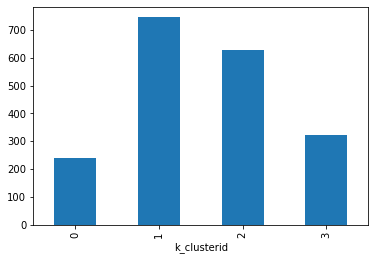

In [108]:
data_new.groupby(["k_clusterid"])["ID"].count().plot(kind='bar')

In [109]:
data_new.groupby('k_clusterid')[['Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth']].mean()

Income   Kidhome  Teenhome    Recency    MntWines  \
k_clusterid                                                            
0            47000.350634  0.485477  0.551867  48.846473  242.344398   
1            50542.428639  0.483914  0.532172  50.542895  264.123324   
2            49437.363066  0.458599  0.550955  50.047771  244.936306   
3            48303.958342  0.540123  0.515432  48.203704  223.913580   

             MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
k_clusterid                                                                  
0            21.697095       112.643154        32.979253         24.755187   
1            25.537534       148.217158        35.199732         23.337802   
2            23.592357       141.500000        33.302548         26.218153   
3            18.740741       115.429012        28.404321         18.793210   

             MntGoldProds  NumDealsPurchases  NumWebPurchases  \
k_clusterid                                                     
0               34.099585           2.365145         3.784232   
1               40.852547           2.467828         3.989276   
2               42.767516           2.289809         3.928344   
3               37.296296           2.327160         3.567901   

             NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  
k_clusterid                                                             
0                       2.128631           5.477178           5.452282  
1                       2.402145           5.626005           5.424933  
2                       2.339172           5.671975           5.554140  
3                       2.015432           5.432099           5.435185

## Cluster Validation - Finding Optimal Number of Clusters

### Elbow method for K-Means Clustering

In [110]:
nc=[2,3,4,5,6,7,8,9,10,11,12,13,14,15]
iner=[]    
for i in nc:
    km=KMeans(i)
    km.fit(data_norm)
    iner.append(km.inertia_)

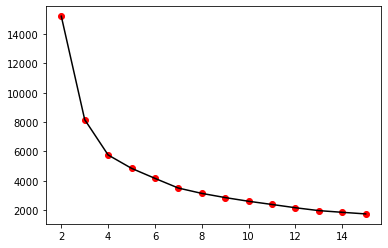

In [111]:
plt.plot(nc,iner,color="black")
plt.scatter(nc,iner,color="red")
plt.show()

## Model Building - Classification Algorithms

### Exploratory Data Analysis 2

In [112]:
data_new.head()

ID  Year_Birth   Income  Kidhome  Teenhome Dt_Customer  Recency  \
0  5524        1957  58138.0        0         0  2012-04-09       58   
1  2174        1954  46344.0        1         1  2014-08-03       38   
2  4141        1965  71613.0        0         0  2013-08-21       26   
3  6182        1984  26646.0        1         0  2014-10-02       26   
4  5324        1981  58293.0        1         0  2014-01-19       94   

   MntWines  MntFruits  MntMeatProducts  ...  Marital_Status_Married  \
0       635         88              546  ...                       0   
1        11          1                6  ...                       0   
2       426         49              127  ...                       0   
3        11          4               20  ...                       0   
4       173         43              118  ...                       1   

   Marital_Status_Single  Marital_Status_Together  Marital_Status_Widow  \
0                      1                        0                     0   
1                      1                        0                     0   
2                      0                        1                     0   
3                      0                        1                     0   
4                      0                        0                     0   

   Marital_Status_YOLO  h_clusterid_s  h_clusterid_c  h_clusterid_a  \
0                    0              1              2              5   
1                    0              1              2              5   
2                    0              1              2              5   
3                    0              1              2              5   
4                    0              1              0              5   

   d_clusterid  k_clusterid  
0            0            1  
1            0            1  
2            1            1  
3            1            1  
4            2            1  

[5 rows x 45 columns]

In [113]:
data1 = data_new.copy()

In [114]:
data1.shape

(1939, 45)

In [115]:
data1.drop(['h_clusterid_s', 'h_clusterid_c', 'h_clusterid_a', 'd_clusterid'],axis=1,inplace=True)

In [116]:
data1.shape

(1939, 41)

In [117]:
data1.head()

ID  Year_Birth   Income  Kidhome  Teenhome Dt_Customer  Recency  \
0  5524        1957  58138.0        0         0  2012-04-09       58   
1  2174        1954  46344.0        1         1  2014-08-03       38   
2  4141        1965  71613.0        0         0  2013-08-21       26   
3  6182        1984  26646.0        1         0  2014-10-02       26   
4  5324        1981  58293.0        1         0  2014-01-19       94   

   MntWines  MntFruits  MntMeatProducts  ...  Education_PhD  \
0       635         88              546  ...              0   
1        11          1                6  ...              0   
2       426         49              127  ...              0   
3        11          4               20  ...              0   
4       173         43              118  ...              1   

   Marital_Status_Absurd  Marital_Status_Alone  Marital_Status_Divorced  \
0                      0                     0                        0   
1                      0                     0                        0   
2                      0                     0                        0   
3                      0                     0                        0   
4                      0                     0                        0   

   Marital_Status_Married  Marital_Status_Single  Marital_Status_Together  \
0                       0                      1                        0   
1                       0                      1                        0   
2                       0                      0                        1   
3                       0                      0                        1   
4                       1                      0                        0   

   Marital_Status_Widow  Marital_Status_YOLO  k_clusterid  
0                     0                    0            1  
1                     0                    0            1  
2                     0                    0            1  
3                     0                    0            1  
4                     0                    0            1  

[5 rows x 41 columns]

In [118]:
df3 = df2.copy()

In [119]:
df3.shape

(2239, 29)

In [120]:
df3['d_clusterid'] = dbs_labels

In [121]:
df3.drop(list(df3[df3['d_clusterid']==-1].index),axis=0,inplace=True)

In [122]:
df3.shape

(1939, 30)

In [123]:
df3['k_clusterid'] = model_kmeans.labels_

In [124]:
df3.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp4  AcceptedCmp5  \
0  2012-04-09       58       635  ...             0             0   
1  2014-08-03       38        11  ...             0             0   
2  2013-08-21       26       426  ...             0             0   
3  2014-10-02       26        11  ...             0             0   
4  2014-01-19       94       173  ...             0             0   

   AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  \
0             0             0         0              3         11         1   
1             0             0         0              3         11         0   
2             0             0         0              3         11         0   
3             0             0         0              3         11         0   
4             0             0         0              3         11         0   

   d_clusterid  k_clusterid  
0            0            1  
1            0            1  
2            1            1  
3            1            1  
4            2            1  

[5 rows x 31 columns]

In [125]:
df3.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'd_clusterid', 'k_clusterid'],
      dtype='object')

In [126]:
df3["Expenses"]=df3.MntWines+df3.MntFruits+df3.MntMeatProducts+df3.MntFishProducts+df3.MntSweetProducts+df3.MntGoldProds

In [127]:
df3["NumPurchases"]=df3.NumDealsPurchases+df3.NumWebPurchases+df3.NumCatalogPurchases+df3.NumStorePurchases

In [128]:
df3["AcceptedCmp"]=df3.AcceptedCmp1+df3.AcceptedCmp2+df3.AcceptedCmp3+df3.AcceptedCmp4+df3.AcceptedCmp5

In [129]:
df3["Childrenhome"]=df3.Kidhome+df3.Teenhome

In [130]:
df3["Age"]=(2023-df3.Year_Birth)

In [131]:
df3.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  Z_CostContact  Z_Revenue  Response  \
0  2012-04-09       58       635  ...              3         11         1   
1  2014-08-03       38        11  ...              3         11         0   
2  2013-08-21       26       426  ...              3         11         0   
3  2014-10-02       26        11  ...              3         11         0   
4  2014-01-19       94       173  ...              3         11         0   

   d_clusterid  k_clusterid  Expenses  NumPurchases  AcceptedCmp  \
0            0            1      1617            25            0   
1            0            1        27             6            0   
2            1            1       776            21            0   
3            1            1        53             8            0   
4            2            1       422            19            0   

   Childrenhome  Age  
0             0   66  
1             2   69  
2             0   58  
3             1   39  
4             1   42  

[5 rows x 36 columns]

In [132]:
df3[df3["Year_Birth"]<1910]

ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
239  11004        1893  2n Cycle         Single  60182.0        0         1   

    Dt_Customer  Recency  MntWines  ...  Z_CostContact  Z_Revenue  Response  \
239  2014-05-17       23         8  ...              3         11         0   

     d_clusterid  k_clusterid  Expenses  NumPurchases  AcceptedCmp  \
239            9            3        22             4            0   

     Childrenhome  Age  
239             1  130  

[1 rows x 36 columns]

In [133]:
df3.drop(239,axis=0,inplace=True)

In [134]:
df3.shape

(1938, 36)

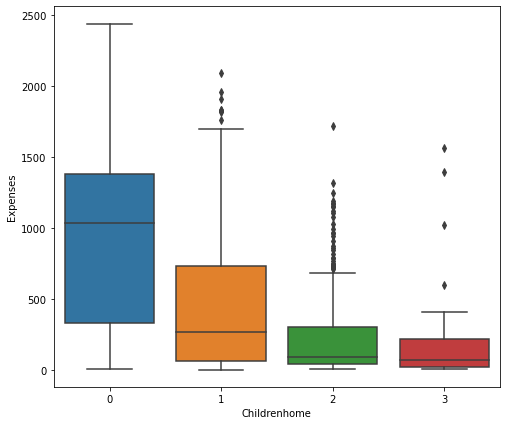

In [135]:
plt.figure(figsize=(8,7))
sns.boxplot(x='Childrenhome', y='Expenses', data=df3)
plt.ylabel('Expenses')
plt.show()

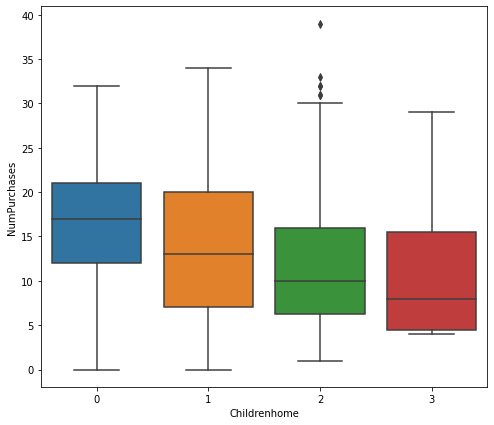

In [136]:
plt.figure(figsize=(8,7))
sns.boxplot(x='Childrenhome', y='NumPurchases', data=df3)
plt.ylabel('NumPurchases')
plt.show()

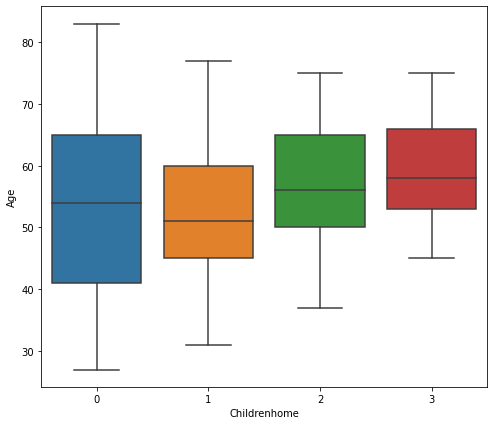

In [137]:
plt.figure(figsize=(8,7))
sns.boxplot(x='Childrenhome', y='Age', data=df3)
plt.ylabel('Age')
plt.show()

<AxesSubplot:xlabel='AcceptedCmp'>

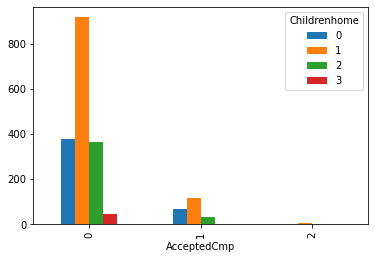

In [138]:
pd.crosstab(df3.AcceptedCmp,df3.Childrenhome).plot(kind="bar")

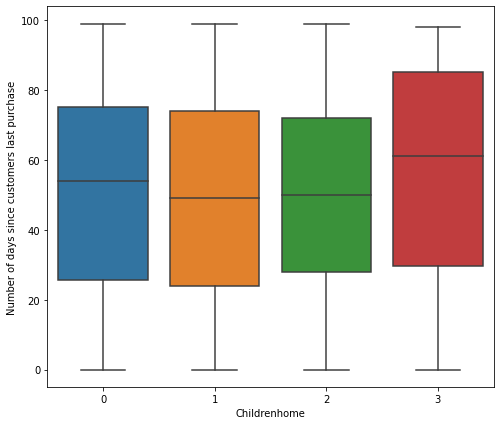

In [139]:
plt.figure(figsize=(8,7))
sns.boxplot(x='Childrenhome', y='Recency', data=df3)
plt.ylabel('Number of days since customers last purchase')
plt.show()

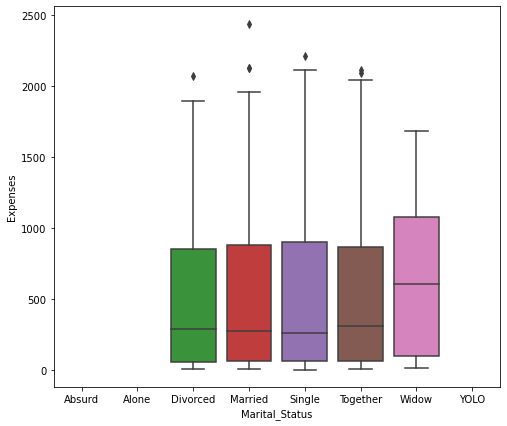

In [140]:
plt.figure(figsize=(8,7))
sns.boxplot(x='Marital_Status', y='Expenses', data=df3)
plt.ylabel('Expenses')
plt.show()

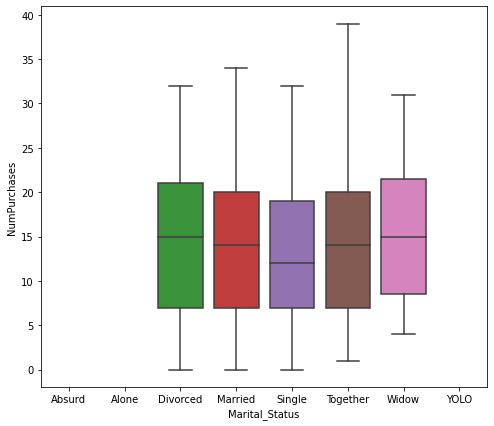

In [141]:
plt.figure(figsize=(8,7))
sns.boxplot(x='Marital_Status', y='NumPurchases', data=df3)
plt.ylabel('NumPurchases')
plt.show()

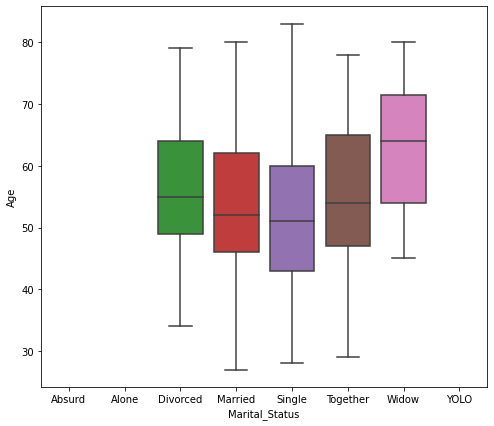

In [142]:
plt.figure(figsize=(8,7))
sns.boxplot(x='Marital_Status', y='Age', data=df3)
plt.ylabel('Age')
plt.show()

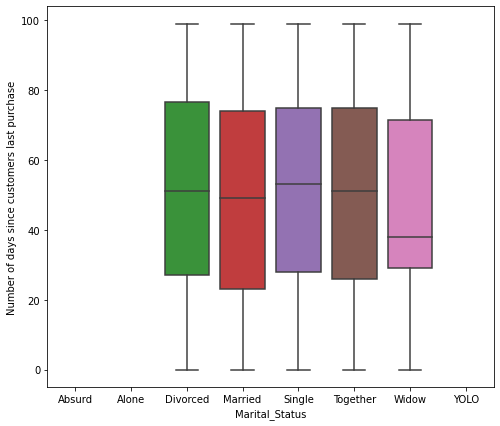

In [143]:
plt.figure(figsize=(8,7))
sns.boxplot(x='Marital_Status', y='Recency', data=df3)
plt.ylabel('Number of days since customers last purchase')
plt.show()

<AxesSubplot:xlabel='Marital_Status'>

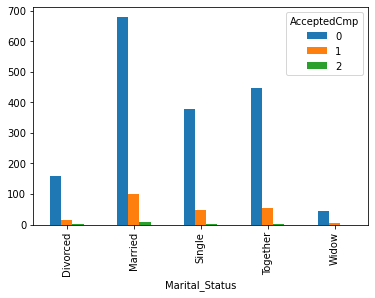

In [144]:
pd.crosstab(df3.Marital_Status,df3.AcceptedCmp).plot(kind="bar")

<AxesSubplot:xlabel='Marital_Status'>

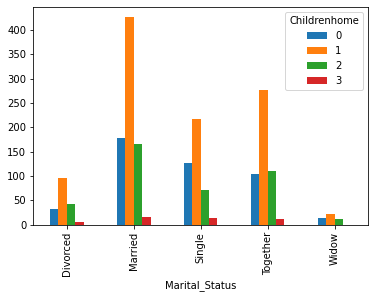

In [145]:
pd.crosstab(df3.Marital_Status,df3.Childrenhome).plot(kind="bar")

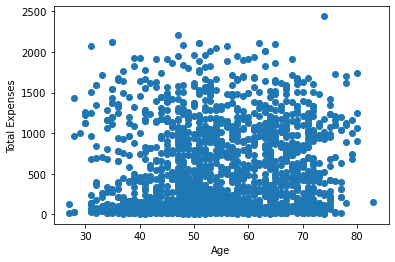

In [146]:
plt.scatter(df3.Age,df3.Expenses);
plt.xlabel('Age');
plt.ylabel('Total Expenses');

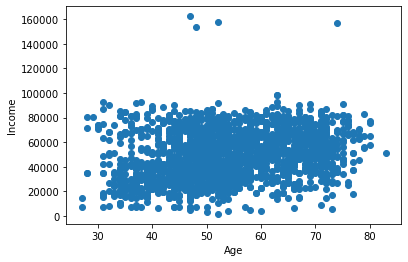

In [147]:
plt.scatter(df3.Age,df3.Income);
plt.xlabel('Age');
plt.ylabel('Income');

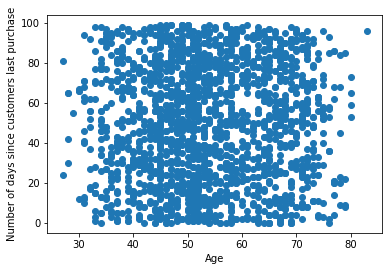

In [148]:
plt.scatter(df3.Age,df3.Recency);
plt.xlabel('Age');
plt.ylabel('Number of days since customers last purchase');

### Distribution of customers in different clusters

<AxesSubplot:ylabel='k_clusterid'>

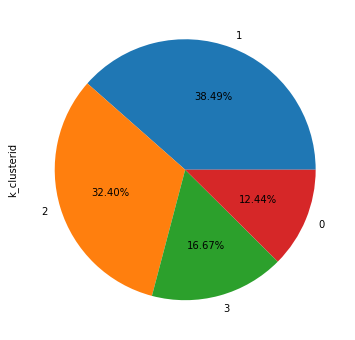

In [149]:
plt.figure(figsize=(6,6))
df3.k_clusterid.value_counts().plot(kind='pie',autopct="%1.2f%%")

<AxesSubplot:xlabel='k_clusterid'>

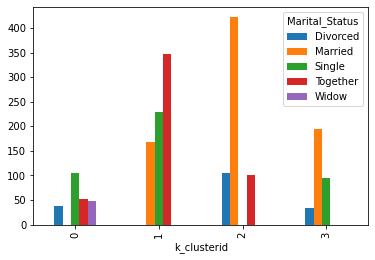

In [150]:
pd.crosstab(df3.k_clusterid,df3.Marital_Status).plot(kind="bar")

<AxesSubplot:xlabel='k_clusterid'>

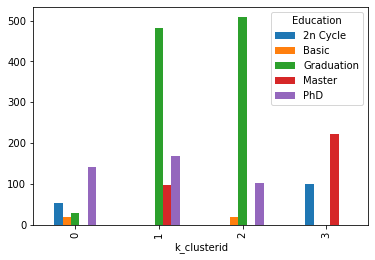

In [151]:
pd.crosstab(df3.k_clusterid,df3.Education).plot(kind="bar")

<AxesSubplot:xlabel='AcceptedCmp'>

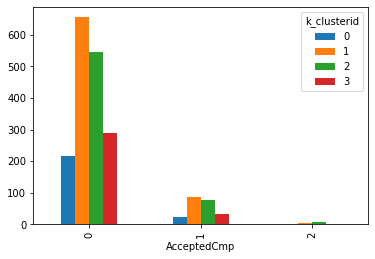

In [152]:
pd.crosstab(df3.AcceptedCmp,df3.k_clusterid).plot(kind="bar")

<AxesSubplot:xlabel='k_clusterid'>

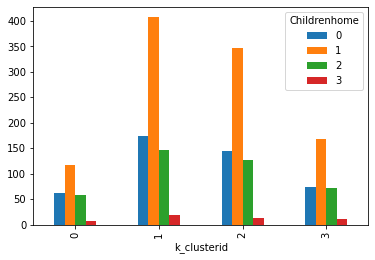

In [153]:
pd.crosstab(df3.k_clusterid,df3.Childrenhome).plot(kind="bar")

<AxesSubplot:xlabel='k_clusterid'>

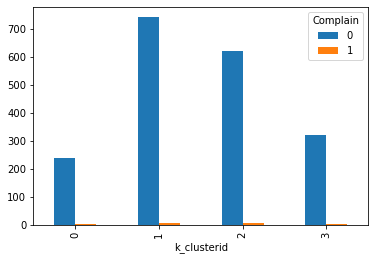

In [154]:
pd.crosstab(df3.k_clusterid,df3.Complain).plot(kind="bar")

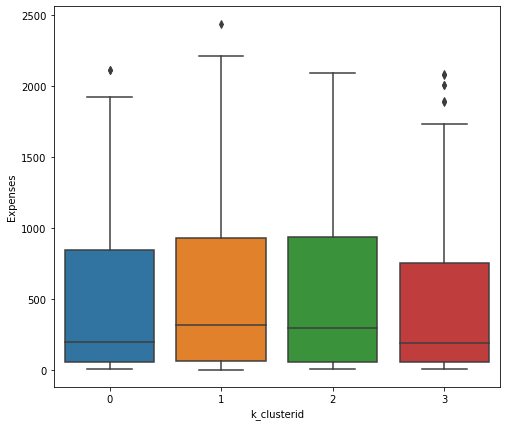

In [155]:
plt.figure(figsize=(8,7))
sns.boxplot(x='k_clusterid', y='Expenses', data=df3)
plt.ylabel('Expenses')
plt.show()

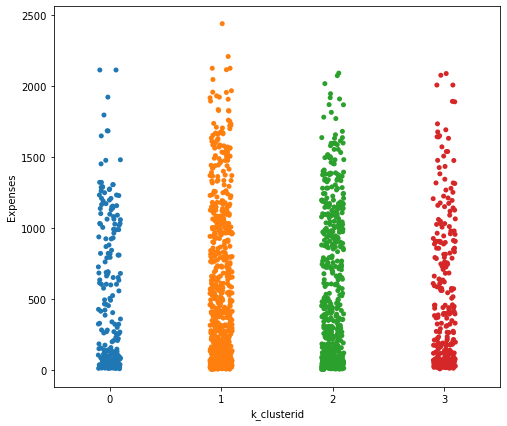

In [156]:
plt.figure(figsize=(8,7))
sns.stripplot(x='k_clusterid', y='Expenses', data=df3)
plt.ylabel('Expenses')
plt.show()

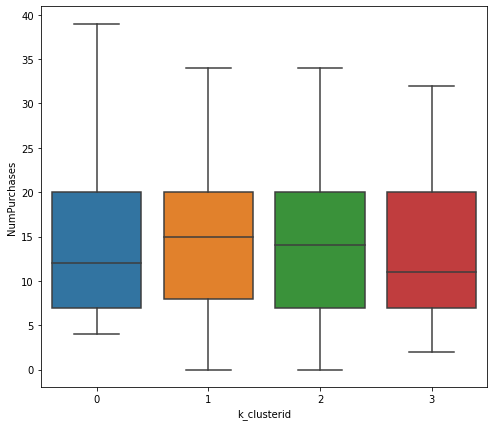

In [157]:
plt.figure(figsize=(8,7))
sns.boxplot(x='k_clusterid', y='NumPurchases', data=df3)
plt.ylabel('NumPurchases')
plt.show()

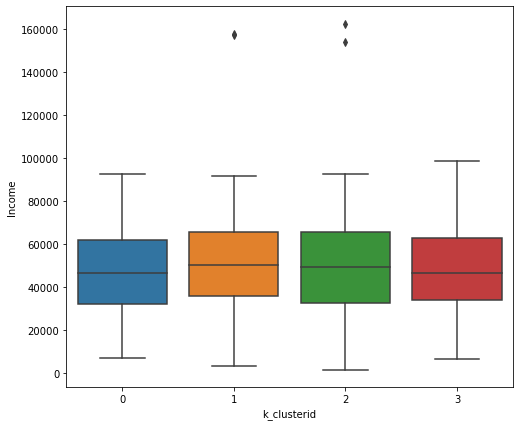

In [158]:
plt.figure(figsize=(8,7))
sns.boxplot(x='k_clusterid', y='Income', data=df3)
plt.ylabel('Income')
plt.show()

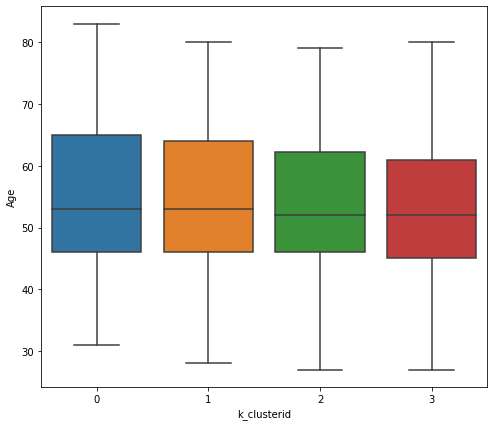

In [159]:
plt.figure(figsize=(8,7))
sns.boxplot(x='k_clusterid', y='Age', data=df3)
plt.ylabel('Age')
plt.show()

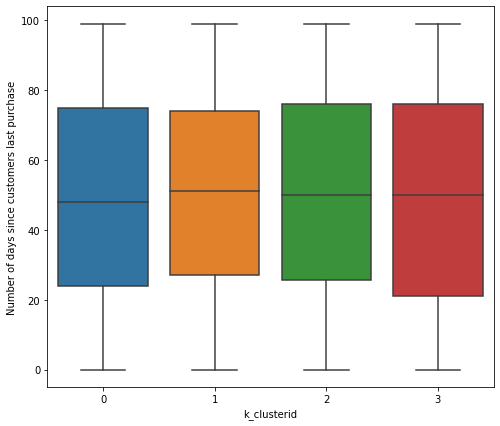

In [160]:
plt.figure(figsize=(8,7))
sns.boxplot(x='k_clusterid', y='Recency', data=df3)
plt.ylabel('Number of days since customers last purchase')
plt.show()

In [161]:
data1.head()

ID  Year_Birth   Income  Kidhome  Teenhome Dt_Customer  Recency  \
0  5524        1957  58138.0        0         0  2012-04-09       58   
1  2174        1954  46344.0        1         1  2014-08-03       38   
2  4141        1965  71613.0        0         0  2013-08-21       26   
3  6182        1984  26646.0        1         0  2014-10-02       26   
4  5324        1981  58293.0        1         0  2014-01-19       94   

   MntWines  MntFruits  MntMeatProducts  ...  Education_PhD  \
0       635         88              546  ...              0   
1        11          1                6  ...              0   
2       426         49              127  ...              0   
3        11          4               20  ...              0   
4       173         43              118  ...              1   

   Marital_Status_Absurd  Marital_Status_Alone  Marital_Status_Divorced  \
0                      0                     0                        0   
1                      0                     0                        0   
2                      0                     0                        0   
3                      0                     0                        0   
4                      0                     0                        0   

   Marital_Status_Married  Marital_Status_Single  Marital_Status_Together  \
0                       0                      1                        0   
1                       0                      1                        0   
2                       0                      0                        1   
3                       0                      0                        1   
4                       1                      0                        0   

   Marital_Status_Widow  Marital_Status_YOLO  k_clusterid  
0                     0                    0            1  
1                     0                    0            1  
2                     0                    0            1  
3                     0                    0            1  
4                     0                    0            1  

[5 rows x 41 columns]

In [162]:
data1.tail()

ID  Year_Birth   Income  Kidhome  Teenhome Dt_Customer  Recency  \
2234   8372        1974  34421.0        1         0  2013-01-07       81   
2235  10870        1967  61223.0        0         1  2013-06-13       46   
2237   7270        1981  56981.0        0         0  2014-01-25       91   
2238   8235        1956  69245.0        0         1  2014-01-24        8   
2239   9405        1954  52869.0        1         1  2012-10-15       40   

      MntWines  MntFruits  MntMeatProducts  ...  Education_PhD  \
2234         3          3                7  ...              0   
2235       709         43              182  ...              0   
2237       908         48              217  ...              0   
2238       428         30              214  ...              0   
2239        84          3               61  ...              1   

      Marital_Status_Absurd  Marital_Status_Alone  Marital_Status_Divorced  \
2234                      0                     0                        0   
2235                      0                     0                        0   
2237                      0                     0                        1   
2238                      0                     0                        0   
2239                      0                     0                        0   

      Marital_Status_Married  Marital_Status_Single  Marital_Status_Together  \
2234                       1                      0                        0   
2235                       1                      0                        0   
2237                       0                      0                        0   
2238                       0                      0                        1   
2239                       1                      0                        0   

      Marital_Status_Widow  Marital_Status_YOLO  k_clusterid  
2234                     0                    0            2  
2235                     0                    0            2  
2237                     0                    0            2  
2238                     0                    0            1  
2239                     0                    0            1  

[5 rows x 41 columns]

In [163]:
data1.columns

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Education_2n Cycle', 'Education_Basic', 'Education_Graduation',
       'Education_Master', 'Education_PhD', 'Marital_Status_Absurd',
       'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO', 'k_clusterid'],
      dtype='object')

In [164]:
data1["Expenses"]=data1.MntWines+data1.MntFruits+data1.MntMeatProducts+data1.MntFishProducts+data1.MntSweetProducts+data1.MntGoldProds

In [165]:
data1["NumPurchases"]=data1.NumDealsPurchases+data1.NumWebPurchases+data1.NumCatalogPurchases+data1.NumStorePurchases

In [166]:
data1["AcceptedCmp"]=data1.AcceptedCmp1+data1.AcceptedCmp2+data1.AcceptedCmp3+data1.AcceptedCmp4+data1.AcceptedCmp5

In [167]:
data1["Childrenhome"]=data1.Kidhome+data1.Teenhome

In [168]:
data1["Age"]=(2023-data1.Year_Birth)

In [169]:
data1.head()

ID  Year_Birth   Income  Kidhome  Teenhome Dt_Customer  Recency  \
0  5524        1957  58138.0        0         0  2012-04-09       58   
1  2174        1954  46344.0        1         1  2014-08-03       38   
2  4141        1965  71613.0        0         0  2013-08-21       26   
3  6182        1984  26646.0        1         0  2014-10-02       26   
4  5324        1981  58293.0        1         0  2014-01-19       94   

   MntWines  MntFruits  MntMeatProducts  ...  Marital_Status_Single  \
0       635         88              546  ...                      1   
1        11          1                6  ...                      1   
2       426         49              127  ...                      0   
3        11          4               20  ...                      0   
4       173         43              118  ...                      0   

   Marital_Status_Together  Marital_Status_Widow  Marital_Status_YOLO  \
0                        0                     0                    0   
1                        0                     0                    0   
2                        1                     0                    0   
3                        1                     0                    0   
4                        0                     0                    0   

   k_clusterid  Expenses  NumPurchases  AcceptedCmp  Childrenhome  Age  
0            1      1617            25            0             0   66  
1            1        27             6            0             2   69  
2            1       776            21            0             0   58  
3            1        53             8            0             1   39  
4            1       422            19            0             1   42  

[5 rows x 46 columns]

In [170]:
data1["clusterid"]=data1.k_clusterid

In [171]:
data1.head()

ID  Year_Birth   Income  Kidhome  Teenhome Dt_Customer  Recency  \
0  5524        1957  58138.0        0         0  2012-04-09       58   
1  2174        1954  46344.0        1         1  2014-08-03       38   
2  4141        1965  71613.0        0         0  2013-08-21       26   
3  6182        1984  26646.0        1         0  2014-10-02       26   
4  5324        1981  58293.0        1         0  2014-01-19       94   

   MntWines  MntFruits  MntMeatProducts  ...  Marital_Status_Together  \
0       635         88              546  ...                        0   
1        11          1                6  ...                        0   
2       426         49              127  ...                        1   
3        11          4               20  ...                        1   
4       173         43              118  ...                        0   

   Marital_Status_Widow  Marital_Status_YOLO  k_clusterid  Expenses  \
0                     0                    0            1      1617   
1                     0                    0            1        27   
2                     0                    0            1       776   
3                     0                    0            1        53   
4                     0                    0            1       422   

   NumPurchases  AcceptedCmp  Childrenhome  Age  clusterid  
0            25            0             0   66          1  
1             6            0             2   69          1  
2            21            0             0   58          1  
3             8            0             1   39          1  
4            19            0             1   42          1  

[5 rows x 47 columns]

In [172]:
data1.shape

(1939, 47)

In [173]:
data1[data1["Year_Birth"]<1910]

ID  Year_Birth   Income  Kidhome  Teenhome Dt_Customer  Recency  \
239  11004        1893  60182.0        0         1  2014-05-17       23   

     MntWines  MntFruits  MntMeatProducts  ...  Marital_Status_Together  \
239         8          0                5  ...                        0   

     Marital_Status_Widow  Marital_Status_YOLO  k_clusterid  Expenses  \
239                     0                    0            3        22   

     NumPurchases  AcceptedCmp  Childrenhome  Age  clusterid  
239             4            0             1  130          3  

[1 rows x 47 columns]

In [174]:
data1.drop(239,axis=0,inplace=True)

In [175]:
data1.shape

(1938, 47)

In [176]:
data1.columns

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Education_2n Cycle', 'Education_Basic', 'Education_Graduation',
       'Education_Master', 'Education_PhD', 'Marital_Status_Absurd',
       'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO', 'k_clusterid', 'Expenses', 'NumPurchases',
       'AcceptedCmp', 'Childrenhome', 'Age', 'clusterid'],
      dtype='object')

In [177]:
data1.drop(['Z_CostContact', 'Z_Revenue', 'k_clusterid'],axis=1,inplace=True)

In [178]:
data1.drop(['Dt_Customer'],axis=1,inplace=True)

In [179]:
data1.shape

(1938, 43)

In [180]:
data1.head()

ID  Year_Birth   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0  5524        1957  58138.0        0         0       58       635         88   
1  2174        1954  46344.0        1         1       38        11          1   
2  4141        1965  71613.0        0         0       26       426         49   
3  6182        1984  26646.0        1         0       26        11          4   
4  5324        1981  58293.0        1         0       94       173         43   

   MntMeatProducts  MntFishProducts  ...  Marital_Status_Single  \
0              546              172  ...                      1   
1                6                2  ...                      1   
2              127              111  ...                      0   
3               20               10  ...                      0   
4              118               46  ...                      0   

   Marital_Status_Together  Marital_Status_Widow  Marital_Status_YOLO  \
0                        0                     0                    0   
1                        0                     0                    0   
2                        1                     0                    0   
3                        1                     0                    0   
4                        0                     0                    0   

   Expenses  NumPurchases  AcceptedCmp  Childrenhome  Age  clusterid  
0      1617            25            0             0   66          1  
1        27             6            0             2   69          1  
2       776            21            0             0   58          1  
3        53             8            0             1   39          1  
4       422            19            0             1   42          1  

[5 rows x 43 columns]

In [181]:
data2 = data1.copy()

In [182]:
data2.head()

ID  Year_Birth   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0  5524        1957  58138.0        0         0       58       635         88   
1  2174        1954  46344.0        1         1       38        11          1   
2  4141        1965  71613.0        0         0       26       426         49   
3  6182        1984  26646.0        1         0       26        11          4   
4  5324        1981  58293.0        1         0       94       173         43   

   MntMeatProducts  MntFishProducts  ...  Marital_Status_Single  \
0              546              172  ...                      1   
1                6                2  ...                      1   
2              127              111  ...                      0   
3               20               10  ...                      0   
4              118               46  ...                      0   

   Marital_Status_Together  Marital_Status_Widow  Marital_Status_YOLO  \
0                        0                     0                    0   
1                        0                     0                    0   
2                        1                     0                    0   
3                        1                     0                    0   
4                        0                     0                    0   

   Expenses  NumPurchases  AcceptedCmp  Childrenhome  Age  clusterid  
0      1617            25            0             0   66          1  
1        27             6            0             2   69          1  
2       776            21            0             0   58          1  
3        53             8            0             1   39          1  
4       422            19            0             1   42          1  

[5 rows x 43 columns]

In [183]:
data2.columns

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response',
       'Education_2n Cycle', 'Education_Basic', 'Education_Graduation',
       'Education_Master', 'Education_PhD', 'Marital_Status_Absurd',
       'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO', 'Expenses', 'NumPurchases', 'AcceptedCmp',
       'Childrenhome', 'Age', 'clusterid'],
      dtype='object')

In [184]:
data2.drop(['Year_Birth', 'Kidhome', 'Teenhome', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases','AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',],axis=1,inplace=True)

In [185]:
data2.head()

ID   Income  Recency  NumWebVisitsMonth  Complain  Response  \
0  5524  58138.0       58                  7         0         1   
1  2174  46344.0       38                  5         0         0   
2  4141  71613.0       26                  4         0         0   
3  6182  26646.0       26                  6         0         0   
4  5324  58293.0       94                  5         0         0   

   Education_2n Cycle  Education_Basic  Education_Graduation  \
0                   0                0                     1   
1                   0                0                     1   
2                   0                0                     1   
3                   0                0                     1   
4                   0                0                     0   

   Education_Master  ...  Marital_Status_Single  Marital_Status_Together  \
0                 0  ...                      1                        0   
1                 0  ...                      1                        0   
2                 0  ...                      0                        1   
3                 0  ...                      0                        1   
4                 0  ...                      0                        0   

   Marital_Status_Widow  Marital_Status_YOLO  Expenses  NumPurchases  \
0                     0                    0      1617            25   
1                     0                    0        27             6   
2                     0                    0       776            21   
3                     0                    0        53             8   
4                     0                    0       422            19   

   AcceptedCmp  Childrenhome  Age  clusterid  
0            0             0   66          1  
1            0             2   69          1  
2            0             0   58          1  
3            0             1   39          1  
4            0             1   42          1  

[5 rows x 25 columns]

In [186]:
data2.shape

(1938, 25)

## Baseline Models - Entire Dataset

In [187]:
data1.shape

(1938, 43)

In [188]:
data1.head()

ID  Year_Birth   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0  5524        1957  58138.0        0         0       58       635         88   
1  2174        1954  46344.0        1         1       38        11          1   
2  4141        1965  71613.0        0         0       26       426         49   
3  6182        1984  26646.0        1         0       26        11          4   
4  5324        1981  58293.0        1         0       94       173         43   

   MntMeatProducts  MntFishProducts  ...  Marital_Status_Single  \
0              546              172  ...                      1   
1                6                2  ...                      1   
2              127              111  ...                      0   
3               20               10  ...                      0   
4              118               46  ...                      0   

   Marital_Status_Together  Marital_Status_Widow  Marital_Status_YOLO  \
0                        0                     0                    0   
1                        0                     0                    0   
2                        1                     0                    0   
3                        1                     0                    0   
4                        0                     0                    0   

   Expenses  NumPurchases  AcceptedCmp  Childrenhome  Age  clusterid  
0      1617            25            0             0   66          1  
1        27             6            0             2   69          1  
2       776            21            0             0   58          1  
3        53             8            0             1   39          1  
4       422            19            0             1   42          1  

[5 rows x 43 columns]

In [189]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1938 entries, 0 to 2239
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1938 non-null   int64  
 1   Year_Birth               1938 non-null   int64  
 2   Income                   1938 non-null   float64
 3   Kidhome                  1938 non-null   int64  
 4   Teenhome                 1938 non-null   int64  
 5   Recency                  1938 non-null   int64  
 6   MntWines                 1938 non-null   int64  
 7   MntFruits                1938 non-null   int64  
 8   MntMeatProducts          1938 non-null   int64  
 9   MntFishProducts          1938 non-null   int64  
 10  MntSweetProducts         1938 non-null   int64  
 11  MntGoldProds             1938 non-null   int64  
 12  NumDealsPurchases        1938 non-null   int64  
 13  NumWebPurchases          1938 non-null   int64  
 14  NumCatalogPurchases     

## 1) Logistic Regression

In [190]:
# Dividing our data into input and output variables 
x=data1.iloc[:,1:37]
y=data1.iloc[:,42]

In [191]:
x

Year_Birth   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0           1957  58138.0        0         0       58       635         88   
1           1954  46344.0        1         1       38        11          1   
2           1965  71613.0        0         0       26       426         49   
3           1984  26646.0        1         0       26        11          4   
4           1981  58293.0        1         0       94       173         43   
...          ...      ...      ...       ...      ...       ...        ...   
2234        1974  34421.0        1         0       81         3          3   
2235        1967  61223.0        0         1       46       709         43   
2237        1981  56981.0        0         0       91       908         48   
2238        1956  69245.0        0         1        8       428         30   
2239        1954  52869.0        1         1       40        84          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  ...  \
0                 546              172                88  ...   
1                   6                2                 1  ...   
2                 127              111                21  ...   
3                  20               10                 3  ...   
4                 118               46                27  ...   
...               ...              ...               ...  ...   
2234                7                6                 2  ...   
2235              182               42               118  ...   
2237              217               32                12  ...   
2238              214               80                30  ...   
2239               61                2                 1  ...   

      Education_Master  Education_PhD  Marital_Status_Absurd  \
0                    0              0                      0   
1                    0              0                      0   
2                    0              0                      0   
3                    0              0                      0   
4                    0              1                      0   
...                ...            ...                    ...   
2234                 0              0                      0   
2235                 0              0                      0   
2237                 0              0                      0   
2238                 1              0                      0   
2239                 0              1                      0   

      Marital_Status_Alone  Marital_Status_Divorced  Marital_Status_Married  \
0                        0                        0                       0   
1                        0                        0                       0   
2                        0                        0                       0   
3                        0                        0                       0   
4                        0                        0                       1   
...                    ...                      ...                     ...   
2234                     0                        0                       1   
2235                     0                        0                       1   
2237                     0                        1                       0   
2238                     0                        0                       0   
2239                     0                        0                       1   

      Marital_Status_Single  Marital_Status_Together  Marital_Status_Widow  \
0                         1                        0                     0   
1                         1                        0                     0   
2                         0                        1                     0   
3                         0                        1                     0   
4                         0                        0                     0   
...                     ...                      ...                   ...   
2234                    

In [192]:
y

0       1
1       1
2       1
3       1
4       1
       ..
2234    2
2235    2
2237    2
2238    1
2239    1
Name: clusterid, Length: 1938, dtype: int32

## Test-Train Split

In [193]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,shuffle=True)

In [194]:
x_train.shape

(1356, 36)

In [195]:
y_train.shape

(1356,)

In [196]:
x_test.shape

(582, 36)

In [197]:
y_test.shape

(582,)

## Logistic regression and fit the model

In [198]:
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

In [199]:
classifier.intercept_

array([-3.40462738e-08,  1.17746712e-07,  6.89261674e-08, -1.52626606e-07])

In [200]:
classifier.coef_

array([[-1.02175232e-04, -8.67411579e-06, -1.32444297e-06,
        -1.82900368e-08, -1.21729525e-05,  3.21898528e-04,
         4.14994773e-05, -3.13085308e-04,  1.14930293e-04,
         1.25534747e-04, -1.35006551e-04, -3.02408493e-06,
         3.28595646e-06,  4.91208515e-06,  5.94372116e-06,
        -9.30349163e-06, -5.87129963e-07, -1.27108440e-07,
        -5.09567520e-07,  1.09540474e-07, -1.42272049e-07,
         1.29937619e-07,  1.87604073e-06,  5.85960406e-06,
         2.43781716e-06, -1.62080220e-05, -6.19369159e-06,
         1.40702461e-05,  0.00000000e+00,  0.00000000e+00,
         2.84060208e-06, -1.64803952e-05,  8.48963249e-06,
        -7.52125830e-07,  5.86824023e-06,  0.00000000e+00],
       [ 1.73668779e-04,  3.51847974e-06,  3.80642366e-06,
         1.30557386e-07,  2.65475609e-05,  1.14457731e-04,
         1.01310599e-04,  4.17525595e-05, -1.40037076e-04,
        -2.52575244e-04, -1.37121061e-04,  1.03573334e-05,
         1.12236951e-07, -1.89480543e-08, -1.64671238e-

## Model Accuracy on Training Dataset

In [201]:
y_train_pred=classifier.predict(x_train)

In [202]:
data1_logistic_train_ac=ac(y_train,y_train_pred)
data1_logistic_train_ac

0.3827433628318584

In [203]:
y_train_pred_df = pd.DataFrame({'actual': y_train,
                                'predicted_values': classifier.predict(x_train)})
y_train_pred_df

actual  predicted_values
258        1                 1
1542       2                 2
1173       3                 1
1804       2                 1
1183       0                 1
...      ...               ...
610        3                 1
304        1                 1
137        1                 1
2165       0                 1
1452       1                 1

[1356 rows x 2 columns]

## Model Accuracy on Testing Dataset

In [204]:
y_test_pred=classifier.predict(x_test)

In [205]:
data1_logistic_test_ac=ac(y_test,y_test_pred)
data1_logistic_test_ac

0.38316151202749144

In [206]:
y_test_pred_df = pd.DataFrame({'actual': y_test,
                                'predicted_values': classifier.predict(x_test)})
y_test_pred_df

actual  predicted_values
1202       3                 1
1369       2                 1
869        1                 1
1227       2                 1
2000       1                 1
...      ...               ...
1499       2                 1
1094       1                 1
1776       1                 1
853        2                 1
799        2                 1

[582 rows x 2 columns]

In [207]:
data1_logistic_accuracy_df = pd.DataFrame({'Training Accuracy (%)': [np.round(data1_logistic_train_ac*100,2)], 
                            'Testing Accuracy (%)': [np.round(data1_logistic_test_ac*100,2)]})
data1_logistic_accuracy_df

Training Accuracy (%)  Testing Accuracy (%)
0                  38.27                 38.32

## Confusion Matrix for the model accuracy

In [208]:
confusion_matrix(y_test_pred,y_test)

array([[  0,   0,   0,   0],
       [ 68, 217, 177, 100],
       [  2,  11,   6,   1],
       [  0,   0,   0,   0]], dtype=int64)

## Classification report

In [209]:
print(classification_report(y_test_pred,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.95      0.39      0.55       562
           2       0.03      0.30      0.06        20
           3       0.00      0.00      0.00         0

    accuracy                           0.38       582
   macro avg       0.25      0.17      0.15       582
weighted avg       0.92      0.38      0.53       582



## 2) Decision Tree

In [210]:
# Dividing our data into input and output variables 
x=data1.iloc[:,1:37]
y=data1.iloc[:,42]

In [211]:
# Splitting data into training and testing datasets
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=10)

## Building Decision Tree Classifier using gini Criteria

In [212]:
model = DecisionTreeClassifier(criterion= 'gini', min_samples_split=40)
model.fit(x_train,y_train)

DecisionTreeClassifier(min_samples_split=40)

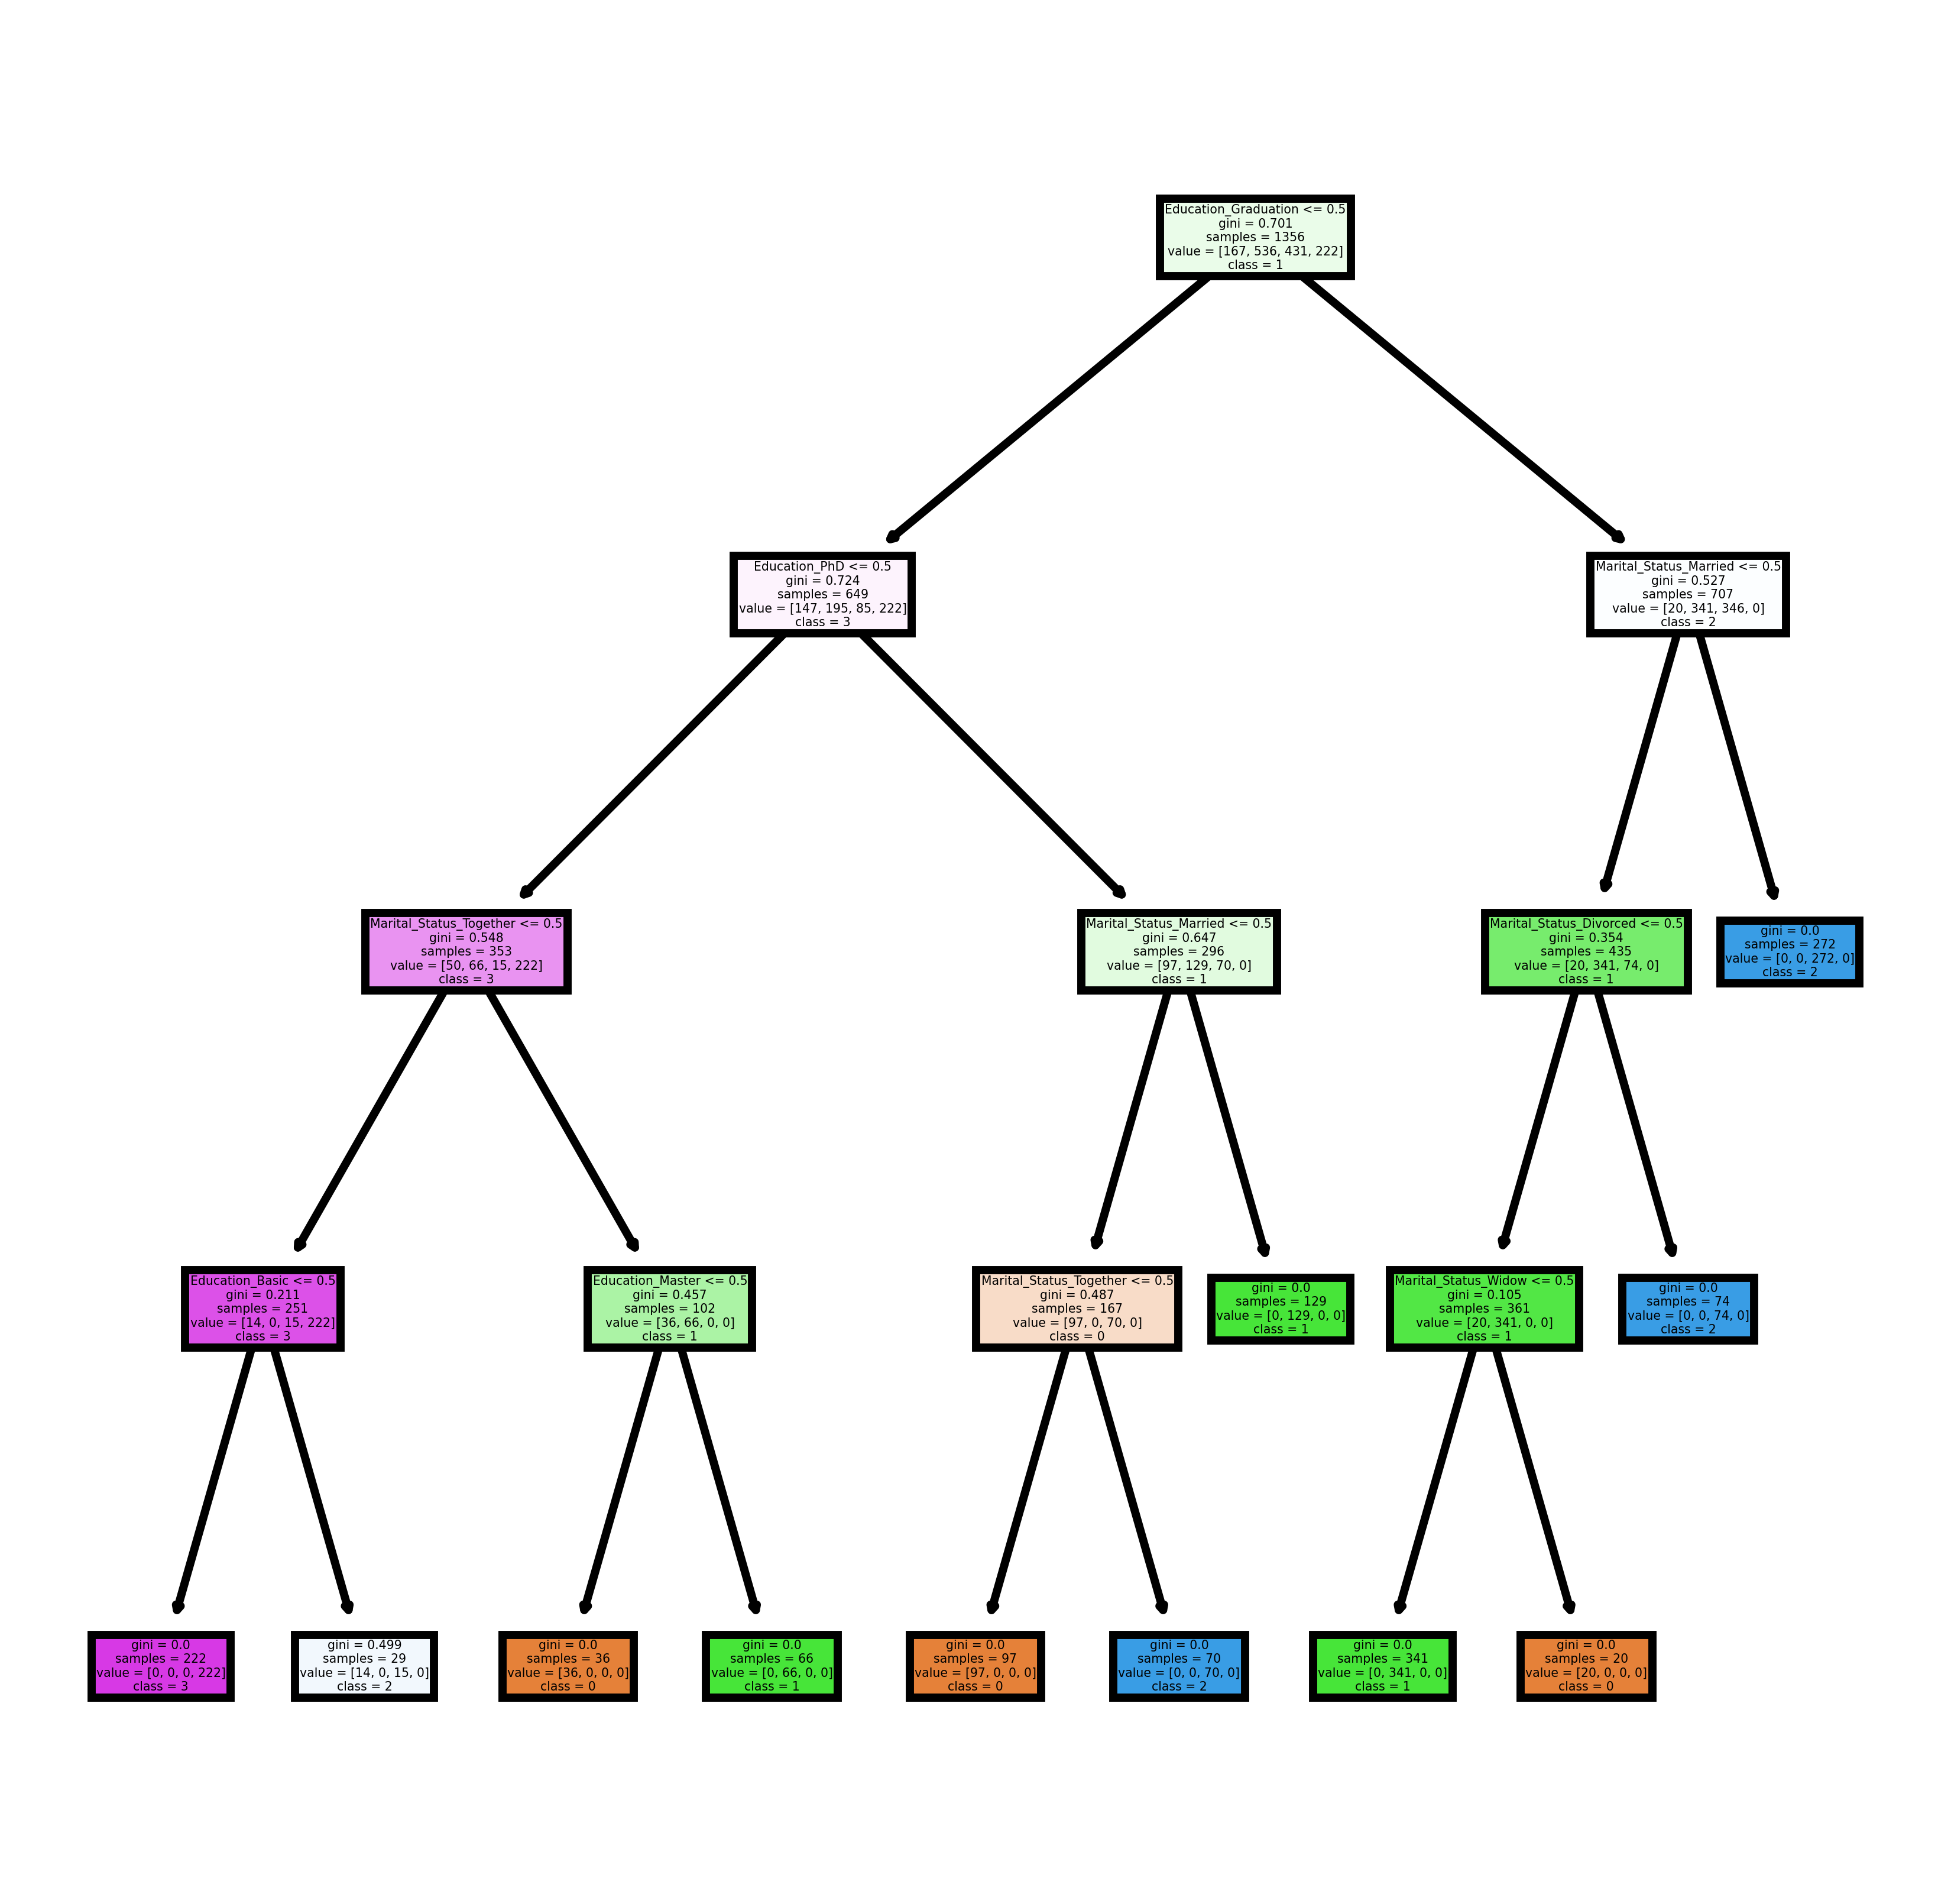

In [213]:
fn=['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response',
       'Education_2n Cycle', 'Education_Basic', 'Education_Graduation',
       'Education_Master', 'Education_PhD', 'Marital_Status_Absurd',
       'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO']
cn=['0','1','2','3']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi=1000)
tree.plot_tree(model,
              feature_names = fn,
              class_names = cn,
              filled = True);

## Model Accuracy on Testing Dataset

In [214]:
# Predicting on test data
y_test_pred = model.predict(x_test) # Predicting on test dataset
pd.Series(y_test_pred).value_counts() # Getting the count of each class

1    210
2    201
3    101
0     70
dtype: int64

In [215]:
data1_DT1_test_ac=metrics.accuracy_score(y_test_pred,y_test)
data1_DT1_test_ac

0.993127147766323

## Model Accuracy on Training Dataset

In [216]:
y_train_pred = model.predict(x_train)
data1_DT1_train_ac=metrics.accuracy_score(y_train_pred,y_train)
data1_DT1_train_ac

0.9896755162241888

In [217]:
data1_DT1_accuracy_df = pd.DataFrame({'Training Accuracy (%)': [np.round(data1_DT1_train_ac*100,2)], 
                            'Testing Accuracy (%)': [np.round(data1_DT1_test_ac*100,2)]})
data1_DT1_accuracy_df

Training Accuracy (%)  Testing Accuracy (%)
0                  98.97                 99.31

## Building Decision Tree Classifier using entropy Criteria

In [218]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

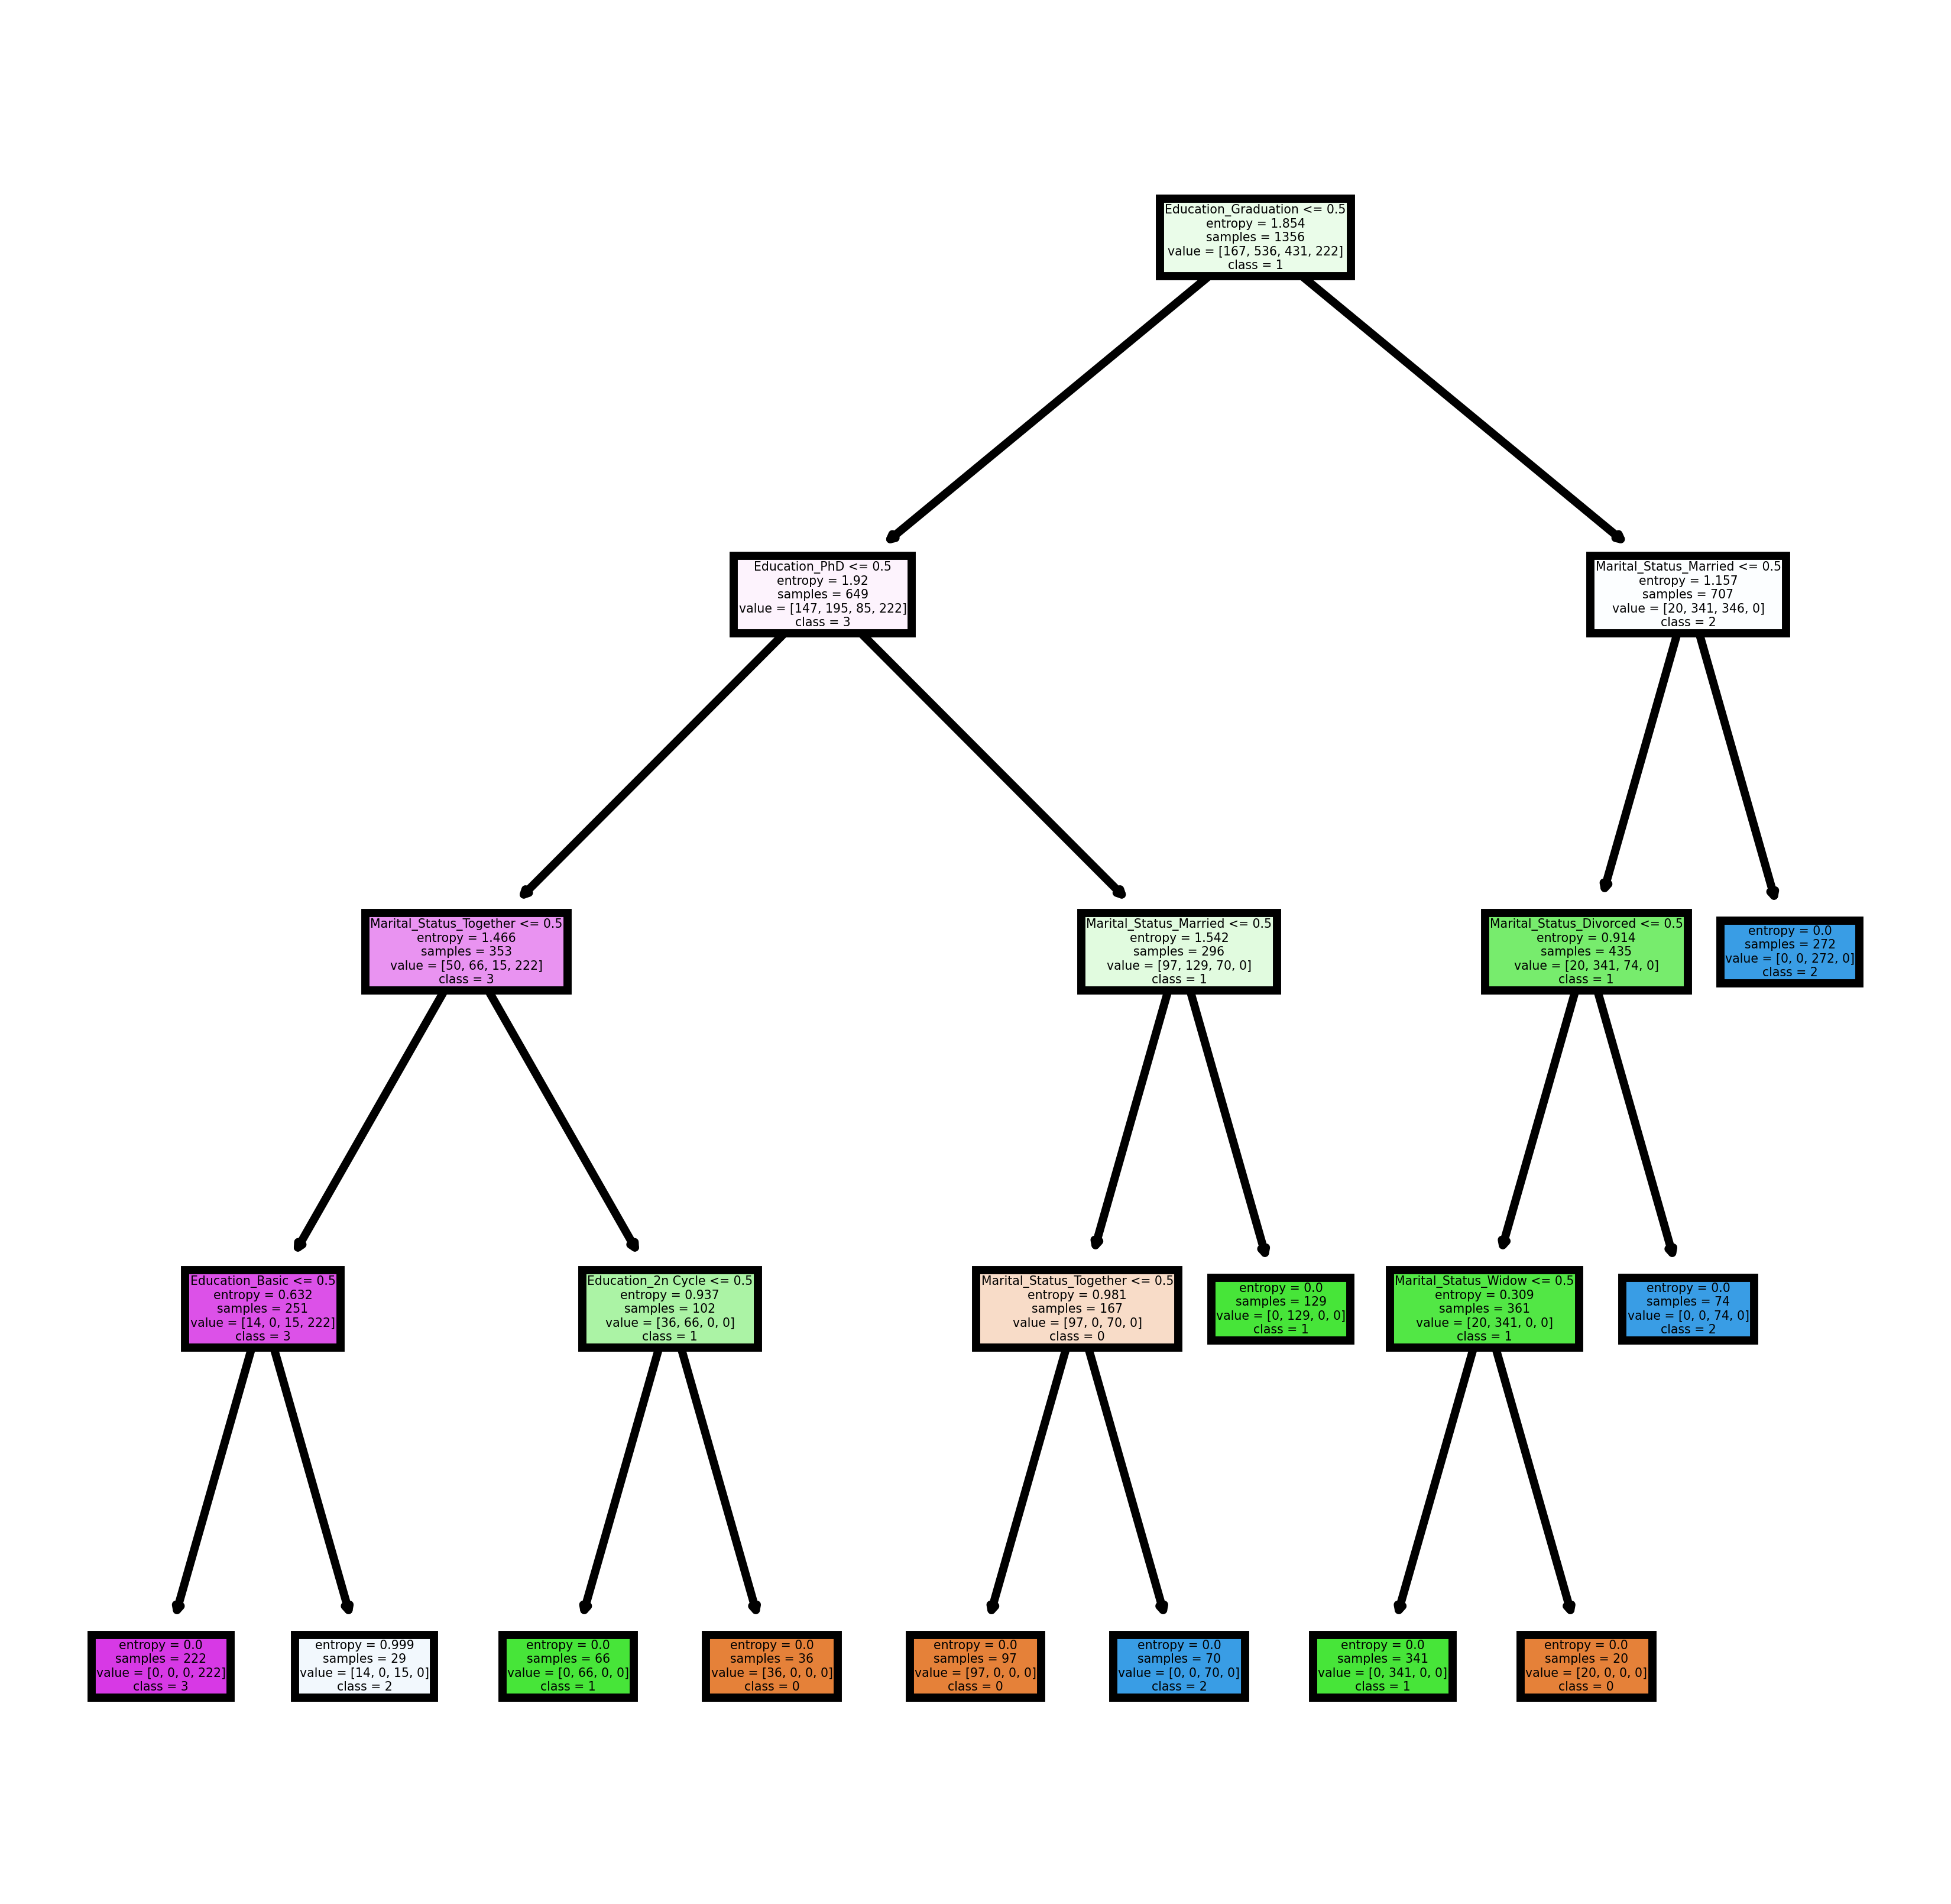

In [219]:
fn=['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response',
       'Education_2n Cycle', 'Education_Basic', 'Education_Graduation',
       'Education_Master', 'Education_PhD', 'Marital_Status_Absurd',
       'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO']
cn=['0','1','2','3']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi=1000)
tree.plot_tree(model,
              feature_names = fn,
              class_names = cn,
              filled = True);

## Model Accuracy on Testing Dataset

In [220]:
# Predicting on test data
y_test_pred = model.predict(x_test) # Predicting on test dataset
pd.Series(y_test_pred).value_counts() # Getting the count of each class

1    210
2    201
3    101
0     70
dtype: int64

In [221]:
data1_DT2_test_ac=metrics.accuracy_score(y_test_pred,y_test)
data1_DT2_test_ac

0.993127147766323

## Model Accuracy on Training Dataset

In [222]:
y_train_pred = model.predict(x_train)
data1_DT2_train_ac=metrics.accuracy_score(y_train_pred,y_train)
data1_DT2_train_ac

0.9896755162241888

In [223]:
data1_DT2_accuracy_df = pd.DataFrame({'Training Accuracy (%)': [np.round(data1_DT2_train_ac*100,2)], 
                            'Testing Accuracy (%)': [np.round(data1_DT2_test_ac*100,2)]})
data1_DT2_accuracy_df

Training Accuracy (%)  Testing Accuracy (%)
0                  98.97                 99.31

## 3) Random Forests

In [224]:
array = data1.values
X = array[:,1:37]
Y = array[:,42]

## Building Random Forest Classifier

In [225]:
num_trees = 200
max_features = 6

model = RandomForestClassifier(n_estimators=num_trees, max_samples=0.8, max_features=max_features, random_state=8)

In [226]:
results = cross_val_score(model, X, Y, cv=10)
data1_RF_test_ac=results.mean()
data1_RF_test_ac

1.0

## 4) Boosting

In [227]:
array = data1.values
X = array[:,1:37]
Y = array[:,42]

## Building AdaBoost Classifier

In [228]:
num_trees = 40
model = AdaBoostClassifier(n_estimators=num_trees, learning_rate=0.5, random_state=8)

In [229]:
results = cross_val_score(model, X, Y, cv=10)
data1_Boosting_test_ac=results.mean()
data1_Boosting_test_ac

0.9199535281234976

## Visualising the CV results

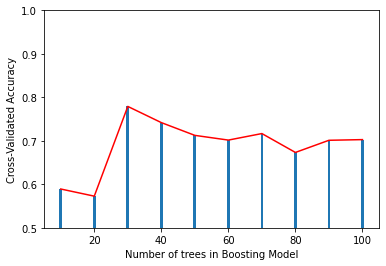

In [230]:
num_trees_range = [10*i for i in range(1,11)]
results = []
for n in num_trees_range:
    model = AdaBoostClassifier(n_estimators=n, learning_rate=0.5, random_state=8)
    scores = cross_val_score(model, X, Y, cv=5)
    results.append(scores.mean())
# plot
plt.bar(num_trees_range, results)
plt.plot(num_trees_range, results, color="red")
plt.xlabel('Number of trees in Boosting Model')
plt.ylabel('Cross-Validated Accuracy')
plt.ylim(0.5,1)
plt.show()

## 5) K-Nearest Neighbors (KNN)

In [231]:
array = data1.values
X = array[:,1:37]
Y = array[:,42]

In [232]:
X

array([[1.9570e+03, 5.8138e+04, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.9540e+03, 4.6344e+04, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.9650e+03, 7.1613e+04, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [1.9810e+03, 5.6981e+04, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.9560e+03, 6.9245e+04, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.9540e+03, 5.2869e+04, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [233]:
Y

array([1., 1., 1., ..., 2., 1., 1.])

In [234]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,shuffle=True)

## KNN Model Building

In [235]:
model = KNeighborsClassifier(n_neighbors=21)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=21)

In [236]:
pred=model.predict(x_test)
data1_KNN_test_ac=accuracy_score(pred,y_test)
data1_KNN_test_ac

0.3694158075601375

## Grid Search for Algorithm Tuning

In [237]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [238]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [239]:
print(grid.best_score_)
print(grid.best_params_)

0.40611097791630046
{'n_neighbors': 1}


## Visualising the CV results

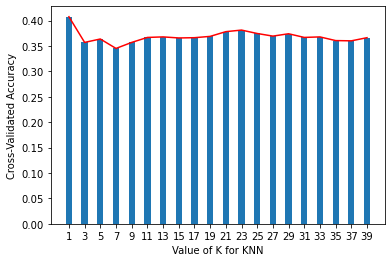

In [240]:
# choose k between 1 to 39
k_range = [2*i+1 for i in range(0,20)]
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=10)
    k_scores.append(scores.mean())
# plot
plt.bar(k_range, k_scores)
plt.plot(k_range, k_scores, color="red")
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_range)
plt.show()

## 6) Support Vector Machine (SVM)

In [241]:
array = data1.values
X = array[:,1:37]
Y = array[:,42]

In [242]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=15)

In [243]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1356, 36), (1356,), (582, 36), (582,))

In [244]:
clf = SVC(kernel="rbf",gamma=0.002)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy = ", acc)
confusion_matrix(y_test, y_pred)

Accuracy =  47.766323024054984


array([[ 13,  57,   1,   1],
       [  0, 222,   3,   3],
       [  0, 164,  33,   0],
       [  0,  73,   2,  10]], dtype=int64)

In [245]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.18      0.31        72
         1.0       0.43      0.97      0.60       228
         2.0       0.85      0.17      0.28       197
         3.0       0.71      0.12      0.20        85

    accuracy                           0.48       582
   macro avg       0.75      0.36      0.35       582
weighted avg       0.68      0.48      0.40       582



## Grid Search CV (Hyperparameter tuning)

In [246]:
clf = SVC()
param_grid = [{'kernel':["rbf"], 'gamma':[50,5,10,0.5,1,0.001,0.0001,0.00001],'C':[1,10,0.1] }]
gsv = GridSearchCV(clf,param_grid,cv=5)
gsv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 0.1],
                          'gamma': [50, 5, 10, 0.5, 1, 0.001, 0.0001, 1e-05],
                          'kernel': ['rbf']}])

In [247]:
gsv.best_params_, gsv.best_score_

({'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}, 0.4277349685261559)

### Building model using best parameters obtained in Grid Search CV

In [248]:
# Test data accuracy
clf = SVC(C=1, gamma=0.5, kernel="rbf")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
data1_SVM_test_ac = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", data1_SVM_test_ac)
confusion_matrix(y_test, y_pred)

Accuracy = 47.42268041237113


array([[ 12,  60,   0,   0],
       [  0, 228,   0,   0],
       [  0, 171,  26,   0],
       [  0,  75,   0,  10]], dtype=int64)

In [249]:
# Train data accuracy
clf = SVC(C=1, gamma=0.5, kernel="rbf")
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
data1_SVM_train_ac = accuracy_score(y_train, y_pred_train) * 100
print("Accuracy =", data1_SVM_train_ac)

Accuracy = 100.0


In [250]:
data1_SVM_accuracy_df = pd.DataFrame({'Training Accuracy (%)': [np.round(data1_SVM_train_ac,2)], 
                            'Testing Accuracy (%)': [np.round(data1_SVM_test_ac,2)]})
data1_SVM_accuracy_df

Training Accuracy (%)  Testing Accuracy (%)
0                  100.0                 47.42

## 7) Naive Bayes

In [251]:
array = data1.values
X = array[:,1:37]
Y = array[:,42]

In [252]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=15)

In [253]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1356, 36), (1356,), (582, 36), (582,))

### Multinomial Naive Bayes

In [254]:
classifier_mb = MB()
classifier_mb.fit(X_train,y_train)

MultinomialNB()

### Test data accuracy

In [255]:
y_pred = classifier_mb.predict(X_test)
data1_NB1_test_ac = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", data1_NB1_test_ac)
confusion_matrix(y_test, y_pred)

Accuracy = 27.491408934707906


array([[18, 18, 11, 25],
       [53, 75, 22, 78],
       [44, 47, 30, 76],
       [15, 23, 10, 37]], dtype=int64)

In [256]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.14      0.25      0.18        72
         1.0       0.46      0.33      0.38       228
         2.0       0.41      0.15      0.22       197
         3.0       0.17      0.44      0.25        85

    accuracy                           0.27       582
   macro avg       0.30      0.29      0.26       582
weighted avg       0.36      0.27      0.28       582



### Train data accuracy

In [257]:
y_pred_train = classifier_mb.predict(X_train)
data1_NB1_train_ac = accuracy_score(y_train, y_pred_train) * 100
print("Accuracy =", data1_NB1_train_ac)

Accuracy = 30.23598820058997


In [258]:
data1_NB1_accuracy_df = pd.DataFrame({'Training Accuracy (%)': [np.round(data1_NB1_train_ac,2)], 
                            'Testing Accuracy (%)': [np.round(data1_NB1_test_ac,2)]})
data1_NB1_accuracy_df

Training Accuracy (%)  Testing Accuracy (%)
0                  30.24                 27.49

### Gaussian Naive Bayes

In [259]:
classifier_gb = GB()
classifier_gb.fit(X_train,y_train)

GaussianNB()

### Test data accuracy

In [260]:
y_pred = classifier_gb.predict(X_test)
data1_NB2_test_ac = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", data1_NB2_test_ac)
confusion_matrix(y_test, y_pred)

Accuracy = 68.90034364261169


array([[ 31,  17,  11,  13],
       [  0, 147,  42,  39],
       [  7,  24, 163,   3],
       [  0,  14,  11,  60]], dtype=int64)

In [261]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.43      0.56        72
         1.0       0.73      0.64      0.68       228
         2.0       0.72      0.83      0.77       197
         3.0       0.52      0.71      0.60        85

    accuracy                           0.69       582
   macro avg       0.70      0.65      0.65       582
weighted avg       0.71      0.69      0.69       582



### Train data accuracy

In [262]:
y_pred_train = classifier_gb.predict(X_train)
data1_NB2_train_ac = accuracy_score(y_train, y_pred_train) * 100
print("Accuracy =", data1_NB2_train_ac)

Accuracy = 67.2566371681416


In [263]:
data1_NB2_accuracy_df = pd.DataFrame({'Training Accuracy (%)': [np.round(data1_NB2_train_ac,2)], 
                            'Testing Accuracy (%)': [np.round(data1_NB2_test_ac,2)]})
data1_NB2_accuracy_df

Training Accuracy (%)  Testing Accuracy (%)
0                  67.26                  68.9

## 8) Gradient Boosting

In [264]:
array = data1.values
X = array[:,1:37]
Y = array[:,42]

In [265]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=15)

In [266]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1356, 36), (1356,), (582, 36), (582,))

## Gradient Boosting Model Building

In [267]:
gb_classifier = GradientBoostingClassifier(n_estimators=50)
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=50)

In [268]:
y_pred = gb_classifier.predict(X_test)
data1_GB_test_ac=accuracy_score(y_pred,y_test)
data1_GB_test_ac

1.0

In [269]:
y_pred_train = gb_classifier.predict(X_train)
data1_GB_train_ac = accuracy_score(y_train, y_pred_train)
data1_GB_train_ac

1.0

In [270]:
data1_GB_accuracy_df = pd.DataFrame({'Training Accuracy (%)': [np.round(data1_GB_train_ac*100,2)], 
                            'Testing Accuracy (%)': [np.round(data1_GB_test_ac*100,2)]})
data1_GB_accuracy_df

Training Accuracy (%)  Testing Accuracy (%)
0                  100.0                 100.0

## 9) XGBoost

In [271]:
array = data1.values
X = array[:,1:37]
Y = array[:,42]

In [272]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=15)

In [273]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1356, 36), (1356,), (582, 36), (582,))

## XGBoost Model Building

In [274]:
xgb_classifier = XGBClassifier(objective='multi:softmax', num_class=4)
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_class=4,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [275]:
y_pred = xgb_classifier.predict(X_test)
data1_XGB_test_ac=accuracy_score(y_pred,y_test)
data1_XGB_test_ac

1.0

In [276]:
y_pred_train = xgb_classifier.predict(X_train)
data1_XGB_train_ac = accuracy_score(y_train, y_pred_train)
data1_XGB_train_ac

1.0

In [277]:
data1_XGB_accuracy_df = pd.DataFrame({'Training Accuracy (%)': [np.round(data1_XGB_train_ac*100,2)], 
                            'Testing Accuracy (%)': [np.round(data1_XGB_test_ac*100,2)]})
data1_XGB_accuracy_df

Training Accuracy (%)  Testing Accuracy (%)
0                  100.0                 100.0

In [278]:
xgb_classifier = XGBClassifier(objective='multi:softmax', num_class=4)

# Define the hyperparameter grid for tuning
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 150]
}

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the accuracy of the model
data1_XGB_ac = accuracy_score(y_test, y_pred)
print("Best Parameters:", best_params)
print("Accuracy:", data1_XGB_ac)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Accuracy: 1.0


## 10) LightGBM

In [279]:
array = data1.values
X = array[:,1:37]
Y = array[:,42]

In [280]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=15)

In [281]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1356, 36), (1356,), (582, 36), (582,))

## LightGBM Model Building

In [282]:
lgbm_classifier = LGBMClassifier()
lgbm_classifier.fit(X_train, y_train)

LGBMClassifier()

In [283]:
y_pred = lgbm_classifier.predict(X_test)
data1_LGBM_test_ac=accuracy_score(y_pred,y_test)
data1_LGBM_test_ac

1.0

In [284]:
y_pred_train = lgbm_classifier.predict(X_train)
data1_LGBM_train_ac = accuracy_score(y_train, y_pred_train)
data1_LGBM_train_ac

1.0

In [285]:
data1_LGBM_accuracy_df = pd.DataFrame({'Training Accuracy (%)': [np.round(data1_LGBM_train_ac*100,2)], 
                            'Testing Accuracy (%)': [np.round(data1_LGBM_test_ac*100,2)]})
data1_LGBM_accuracy_df

Training Accuracy (%)  Testing Accuracy (%)
0                  100.0                 100.0

In [286]:

# Define the parameter grids for each classifier

gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001]
}

xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001]
}

lgbm_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Initialize the classifiers
gb_classifier = GradientBoostingClassifier()
xgb_classifier = XGBClassifier()
lgbm_classifier = LGBMClassifier()

# Create a dictionary of classifiers and their corresponding parameter grids
classifiers = {
    'Gradient Boosting': (gb_classifier, gb_param_grid),
    'XGBoost': (xgb_classifier, xgb_param_grid),
    'LightGBM': (lgbm_classifier, lgbm_param_grid)
}

# Perform grid search cross-validation for each classifier
for name, (classifier, param_grid) in classifiers.items():
    print(f"Performing grid search for {name}...")
    grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=3)
    grid_search.fit(X_train, y_train)
    
    # Get the best parameters and best model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Make predictions on the test set using the best model
    y_pred = best_model.predict(X_test)

    # Evaluate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    print("Best Parameters:", best_params)
    print("Accuracy:", accuracy)

Performing grid search for Gradient Boosting...
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Accuracy: 1.0
Performing grid search for XGBoost...
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Accuracy: 1.0
Performing grid search for LightGBM...
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Accuracy: 1.0


## Classification Models - Transformed Data

In [287]:
data2.shape

(1938, 25)

In [288]:
data2.head()

ID   Income  Recency  NumWebVisitsMonth  Complain  Response  \
0  5524  58138.0       58                  7         0         1   
1  2174  46344.0       38                  5         0         0   
2  4141  71613.0       26                  4         0         0   
3  6182  26646.0       26                  6         0         0   
4  5324  58293.0       94                  5         0         0   

   Education_2n Cycle  Education_Basic  Education_Graduation  \
0                   0                0                     1   
1                   0                0                     1   
2                   0                0                     1   
3                   0                0                     1   
4                   0                0                     0   

   Education_Master  ...  Marital_Status_Single  Marital_Status_Together  \
0                 0  ...                      1                        0   
1                 0  ...                      1                        0   
2                 0  ...                      0                        1   
3                 0  ...                      0                        1   
4                 0  ...                      0                        0   

   Marital_Status_Widow  Marital_Status_YOLO  Expenses  NumPurchases  \
0                     0                    0      1617            25   
1                     0                    0        27             6   
2                     0                    0       776            21   
3                     0                    0        53             8   
4                     0                    0       422            19   

   AcceptedCmp  Childrenhome  Age  clusterid  
0            0             0   66          1  
1            0             2   69          1  
2            0             0   58          1  
3            0             1   39          1  
4            0             1   42          1  

[5 rows x 25 columns]

In [289]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1938 entries, 0 to 2239
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1938 non-null   int64  
 1   Income                   1938 non-null   float64
 2   Recency                  1938 non-null   int64  
 3   NumWebVisitsMonth        1938 non-null   int64  
 4   Complain                 1938 non-null   int64  
 5   Response                 1938 non-null   int64  
 6   Education_2n Cycle       1938 non-null   uint8  
 7   Education_Basic          1938 non-null   uint8  
 8   Education_Graduation     1938 non-null   uint8  
 9   Education_Master         1938 non-null   uint8  
 10  Education_PhD            1938 non-null   uint8  
 11  Marital_Status_Absurd    1938 non-null   uint8  
 12  Marital_Status_Alone     1938 non-null   uint8  
 13  Marital_Status_Divorced  1938 non-null   uint8  
 14  Marital_Status_Married  

## 1) Logistic Regression

In [290]:
# Dividing our data into input and output variables 
x=data2.iloc[:,1:24]
y=data2.iloc[:,24]

In [291]:
x

Income  Recency  NumWebVisitsMonth  Complain  Response  \
0     58138.0       58                  7         0         1   
1     46344.0       38                  5         0         0   
2     71613.0       26                  4         0         0   
3     26646.0       26                  6         0         0   
4     58293.0       94                  5         0         0   
...       ...      ...                ...       ...       ...   
2234  34421.0       81                  7         0         0   
2235  61223.0       46                  5         0         0   
2237  56981.0       91                  6         0         0   
2238  69245.0        8                  3         0         0   
2239  52869.0       40                  7         0         1   

      Education_2n Cycle  Education_Basic  Education_Graduation  \
0                      0                0                     1   
1                      0                0                     1   
2                      0                0                     1   
3                      0                0                     1   
4                      0                0                     0   
...                  ...              ...                   ...   
2234                   0                0                     1   
2235                   0                0                     1   
2237                   0                0                     1   
2238                   0                0                     0   
2239                   0                0                     0   

      Education_Master  Education_PhD  ...  Marital_Status_Married  \
0                    0              0  ...                       0   
1                    0              0  ...                       0   
2                    0              0  ...                       0   
3                    0              0  ...                       0   
4                    0              1  ...                       1   
...                ...            ...  ...                     ...   
2234                 0              0  ...                       1   
2235                 0              0  ...                       1   
2237                 0              0  ...                       0   
2238                 1              0  ...                       0   
2239                 0              1  ...                       1   

      Marital_Status_Single  Marital_Status_Together  Marital_Status_Widow  \
0                         1                        0                     0   
1                         1                        0                     0   
2                         0                        1                     0   
3                         0                        1                     0   
4                         0                        0                     0   
...                     ...                      ...                   ...   
2234                      0                        0                     0   
2235                      0                        0                     0   
2237                      0                        0                     0   
2238                      0                        1                     0   
2239                      0                        0                     0   

      Marital_Status_YOLO  Expenses  NumPurchases  AcceptedCmp  Childrenhome  \
0                       0      1617            25            0             0   
1                       0        27             6            0             2   
2                       0       776            21            0             0   
3                       0        53             8            0             1   
4                       0       422            19            0             1   
...                   ...       ...           ...          ...           ...   
2234                    0        30             4            0             1   
223

In [292]:
y

0       1
1       1
2       1
3       1
4       1
       ..
2234    2
2235    2
2237    2
2238    1
2239    1
Name: clusterid, Length: 1938, dtype: int32

## Test-Train Split

In [293]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,shuffle=True)

In [294]:
x_train.shape

(1356, 23)

In [295]:
y_train.shape

(1356,)

In [296]:
x_test.shape

(582, 23)

In [297]:
y_test.shape

(582,)

## Logistic regression and fit the model

In [298]:
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

In [299]:
classifier.intercept_

array([-1.12303200e-05,  4.26772612e-05,  1.47317013e-05, -4.61786425e-05])

In [300]:
classifier.coef_

array([[-1.30471894e-05, -1.22506945e-03, -1.70914319e-04,
         8.90669108e-07,  2.14204199e-05,  6.03086876e-05,
         2.35671564e-05, -2.13513138e-04, -7.81170050e-05,
         1.96523981e-04,  0.00000000e+00,  0.00000000e+00,
         3.92277489e-05, -2.03927860e-04,  9.19556655e-05,
        -2.96203611e-05,  9.11344879e-05,  0.00000000e+00,
         2.75943232e-04,  7.77133638e-05, -1.33378729e-05,
         1.37506397e-05,  9.60314119e-05],
       [ 4.75833633e-06,  4.37505339e-03,  4.23354783e-04,
        -4.24381549e-06,  1.14413215e-05, -1.19199990e-04,
        -2.36767044e-05,  2.17132787e-04, -5.17173526e-05,
         2.01385178e-05,  0.00000000e+00,  0.00000000e+00,
        -1.45303104e-04, -2.55127911e-04,  1.46313357e-04,
         3.38372909e-04, -4.15779932e-05,  0.00000000e+00,
        -2.65605439e-05,  3.13745398e-04,  4.33999943e-06,
         6.51927806e-05,  2.32409748e-03],
       [ 4.83122181e-06,  1.11042432e-03,  2.44164202e-04,
         1.11328534e-06, -2.4

## Model Accuracy on Training Dataset

In [301]:
y_train_pred=classifier.predict(x_train)

In [302]:
data2_logistic_train_ac=ac(y_train,y_train_pred)
data2_logistic_train_ac

0.39823008849557523

In [303]:
y_train_pred_df = pd.DataFrame({'actual': y_train,
                                'predicted_values': classifier.predict(x_train)})
y_train_pred_df

actual  predicted_values
250        3                 1
1062       0                 1
1387       0                 1
1026       1                 1
1707       1                 1
...      ...               ...
717        1                 1
482        1                 1
2232       1                 1
477        3                 1
962        1                 1

[1356 rows x 2 columns]

## Model Accuracy on Testing Dataset

In [304]:
y_test_pred=classifier.predict(x_test)

In [305]:
data2_logistic_test_ac=ac(y_test,y_test_pred)
data2_logistic_test_ac

0.3539518900343643

In [306]:
y_test_pred_df = pd.DataFrame({'actual': y_test,
                                'predicted_values': classifier.predict(x_test)})
y_test_pred_df

actual  predicted_values
2072       2                 1
876        3                 1
1880       1                 1
731        2                 1
779        1                 1
...      ...               ...
624        3                 1
1304       2                 1
1173       3                 1
743        0                 1
2152       2                 1

[582 rows x 2 columns]

In [307]:
data2_logistic_accuracy_df = pd.DataFrame({'Training Accuracy (%)': [np.round(data2_logistic_train_ac*100,2)], 
                            'Testing Accuracy (%)': [np.round(data2_logistic_test_ac*100,2)]})
data2_logistic_accuracy_df

Training Accuracy (%)  Testing Accuracy (%)
0                  39.82                  35.4

## Confusion Matrix for the model accuracy

In [308]:
confusion_matrix(y_test_pred,y_test)

array([[  0,   0,   0,   0],
       [ 65, 206, 206, 105],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0]], dtype=int64)

## Classification report

In [309]:
print(classification_report(y_test_pred,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.35      0.52       582
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.35       582
   macro avg       0.25      0.09      0.13       582
weighted avg       1.00      0.35      0.52       582



## 2) Decision Tree

In [310]:
# Dividing our data into input and output variables 
x=data2.iloc[:,1:24]
y=data2.iloc[:,24]

In [311]:
# Splitting data into training and testing datasets
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=10)

## Building Decision Tree Classifier using gini Criteria

In [312]:
model = DecisionTreeClassifier(criterion= 'gini', min_samples_split=40)
model.fit(x_train,y_train)

DecisionTreeClassifier(min_samples_split=40)

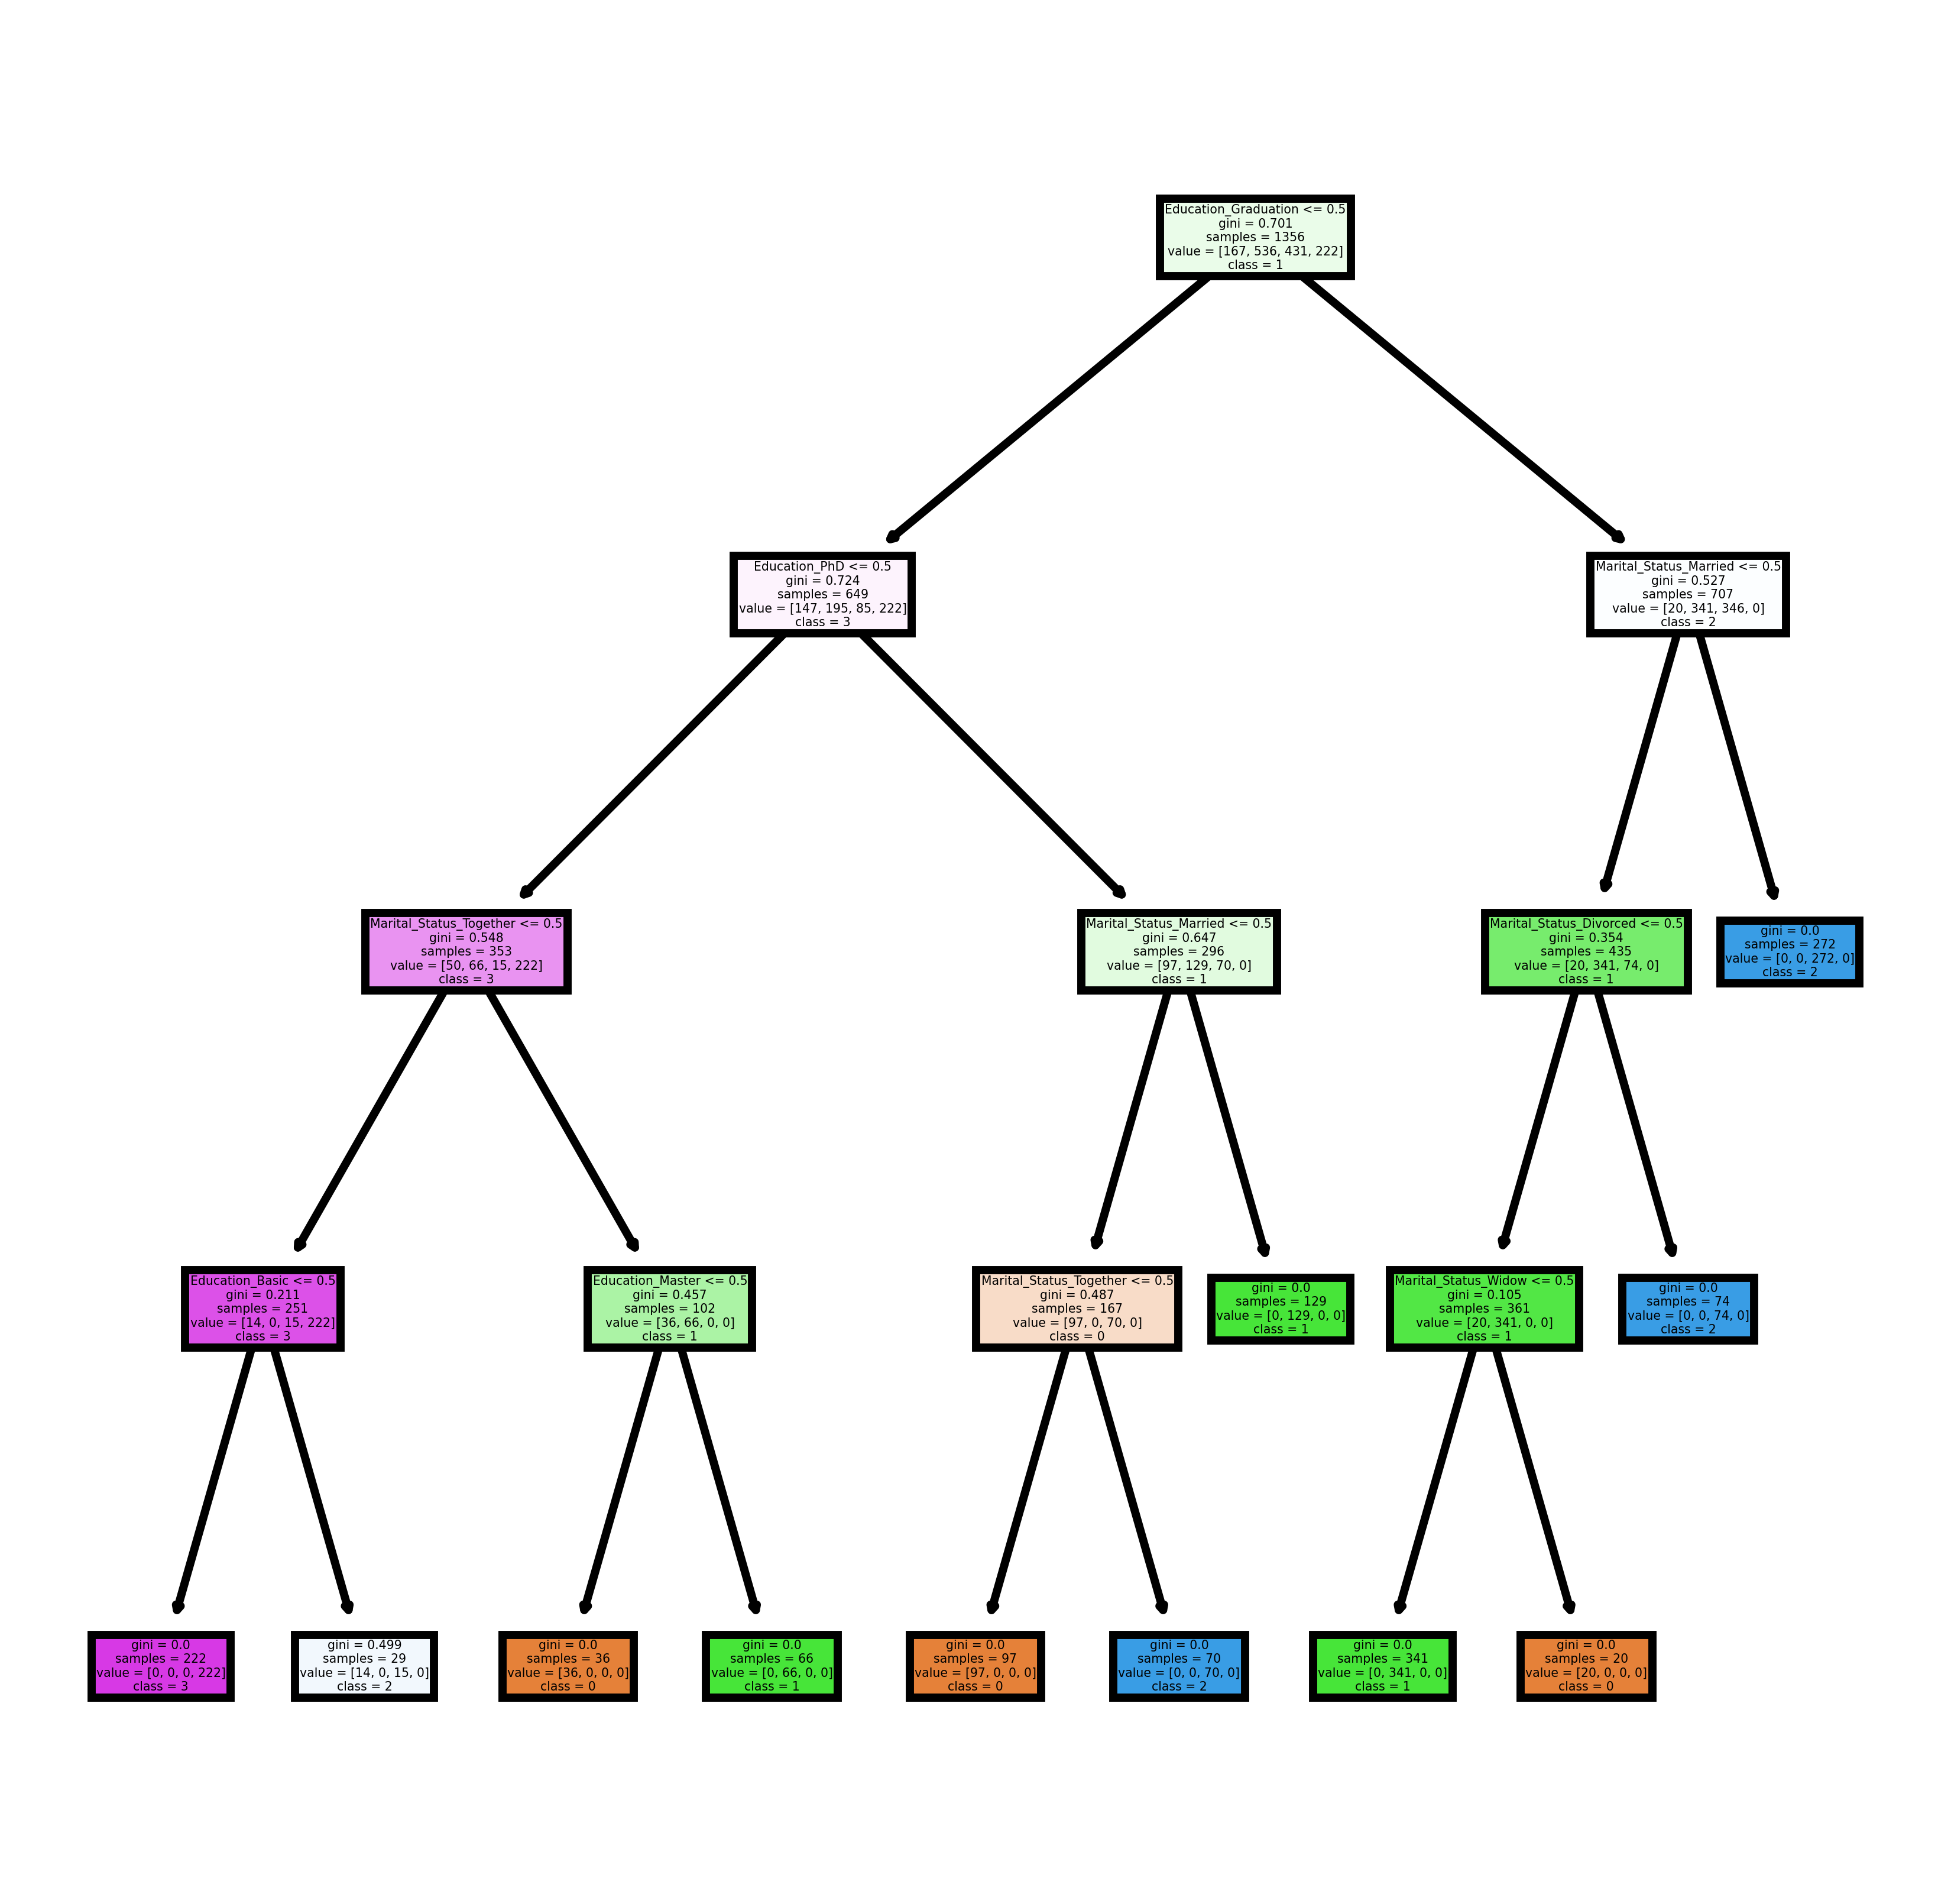

In [313]:
fn=['Income', 'Recency', 'NumWebVisitsMonth', 'Complain', 'Response',
       'Education_2n Cycle', 'Education_Basic', 'Education_Graduation',
       'Education_Master', 'Education_PhD', 'Marital_Status_Absurd',
       'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO', 'Expenses', 'NumPurchases', 'AcceptedCmp',
       'Childrenhome', 'Age']
cn=['0','1','2','3']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi=1000)
tree.plot_tree(model,
              feature_names = fn,
              class_names = cn,
              filled = True);

## Model Accuracy on Testing Dataset

In [314]:
# Predicting on test data
y_test_pred = model.predict(x_test) # Predicting on test dataset
pd.Series(y_test_pred).value_counts() # Getting the count of each class

1    210
2    201
3    101
0     70
dtype: int64

In [315]:
data2_DT1_test_ac=metrics.accuracy_score(y_test_pred,y_test)
data2_DT1_test_ac

0.993127147766323

## Model Accuracy on Training Dataset

In [316]:
y_train_pred = model.predict(x_train)
data2_DT1_train_ac=metrics.accuracy_score(y_train_pred,y_train)
data2_DT1_train_ac

0.9896755162241888

In [317]:
data2_DT1_accuracy_df = pd.DataFrame({'Training Accuracy (%)': [np.round(data2_DT1_train_ac*100,2)], 
                            'Testing Accuracy (%)': [np.round(data2_DT1_test_ac*100,2)]})
data2_DT1_accuracy_df

Training Accuracy (%)  Testing Accuracy (%)
0                  98.97                 99.31

## Building Decision Tree Classifier using entropy Criteria

In [318]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

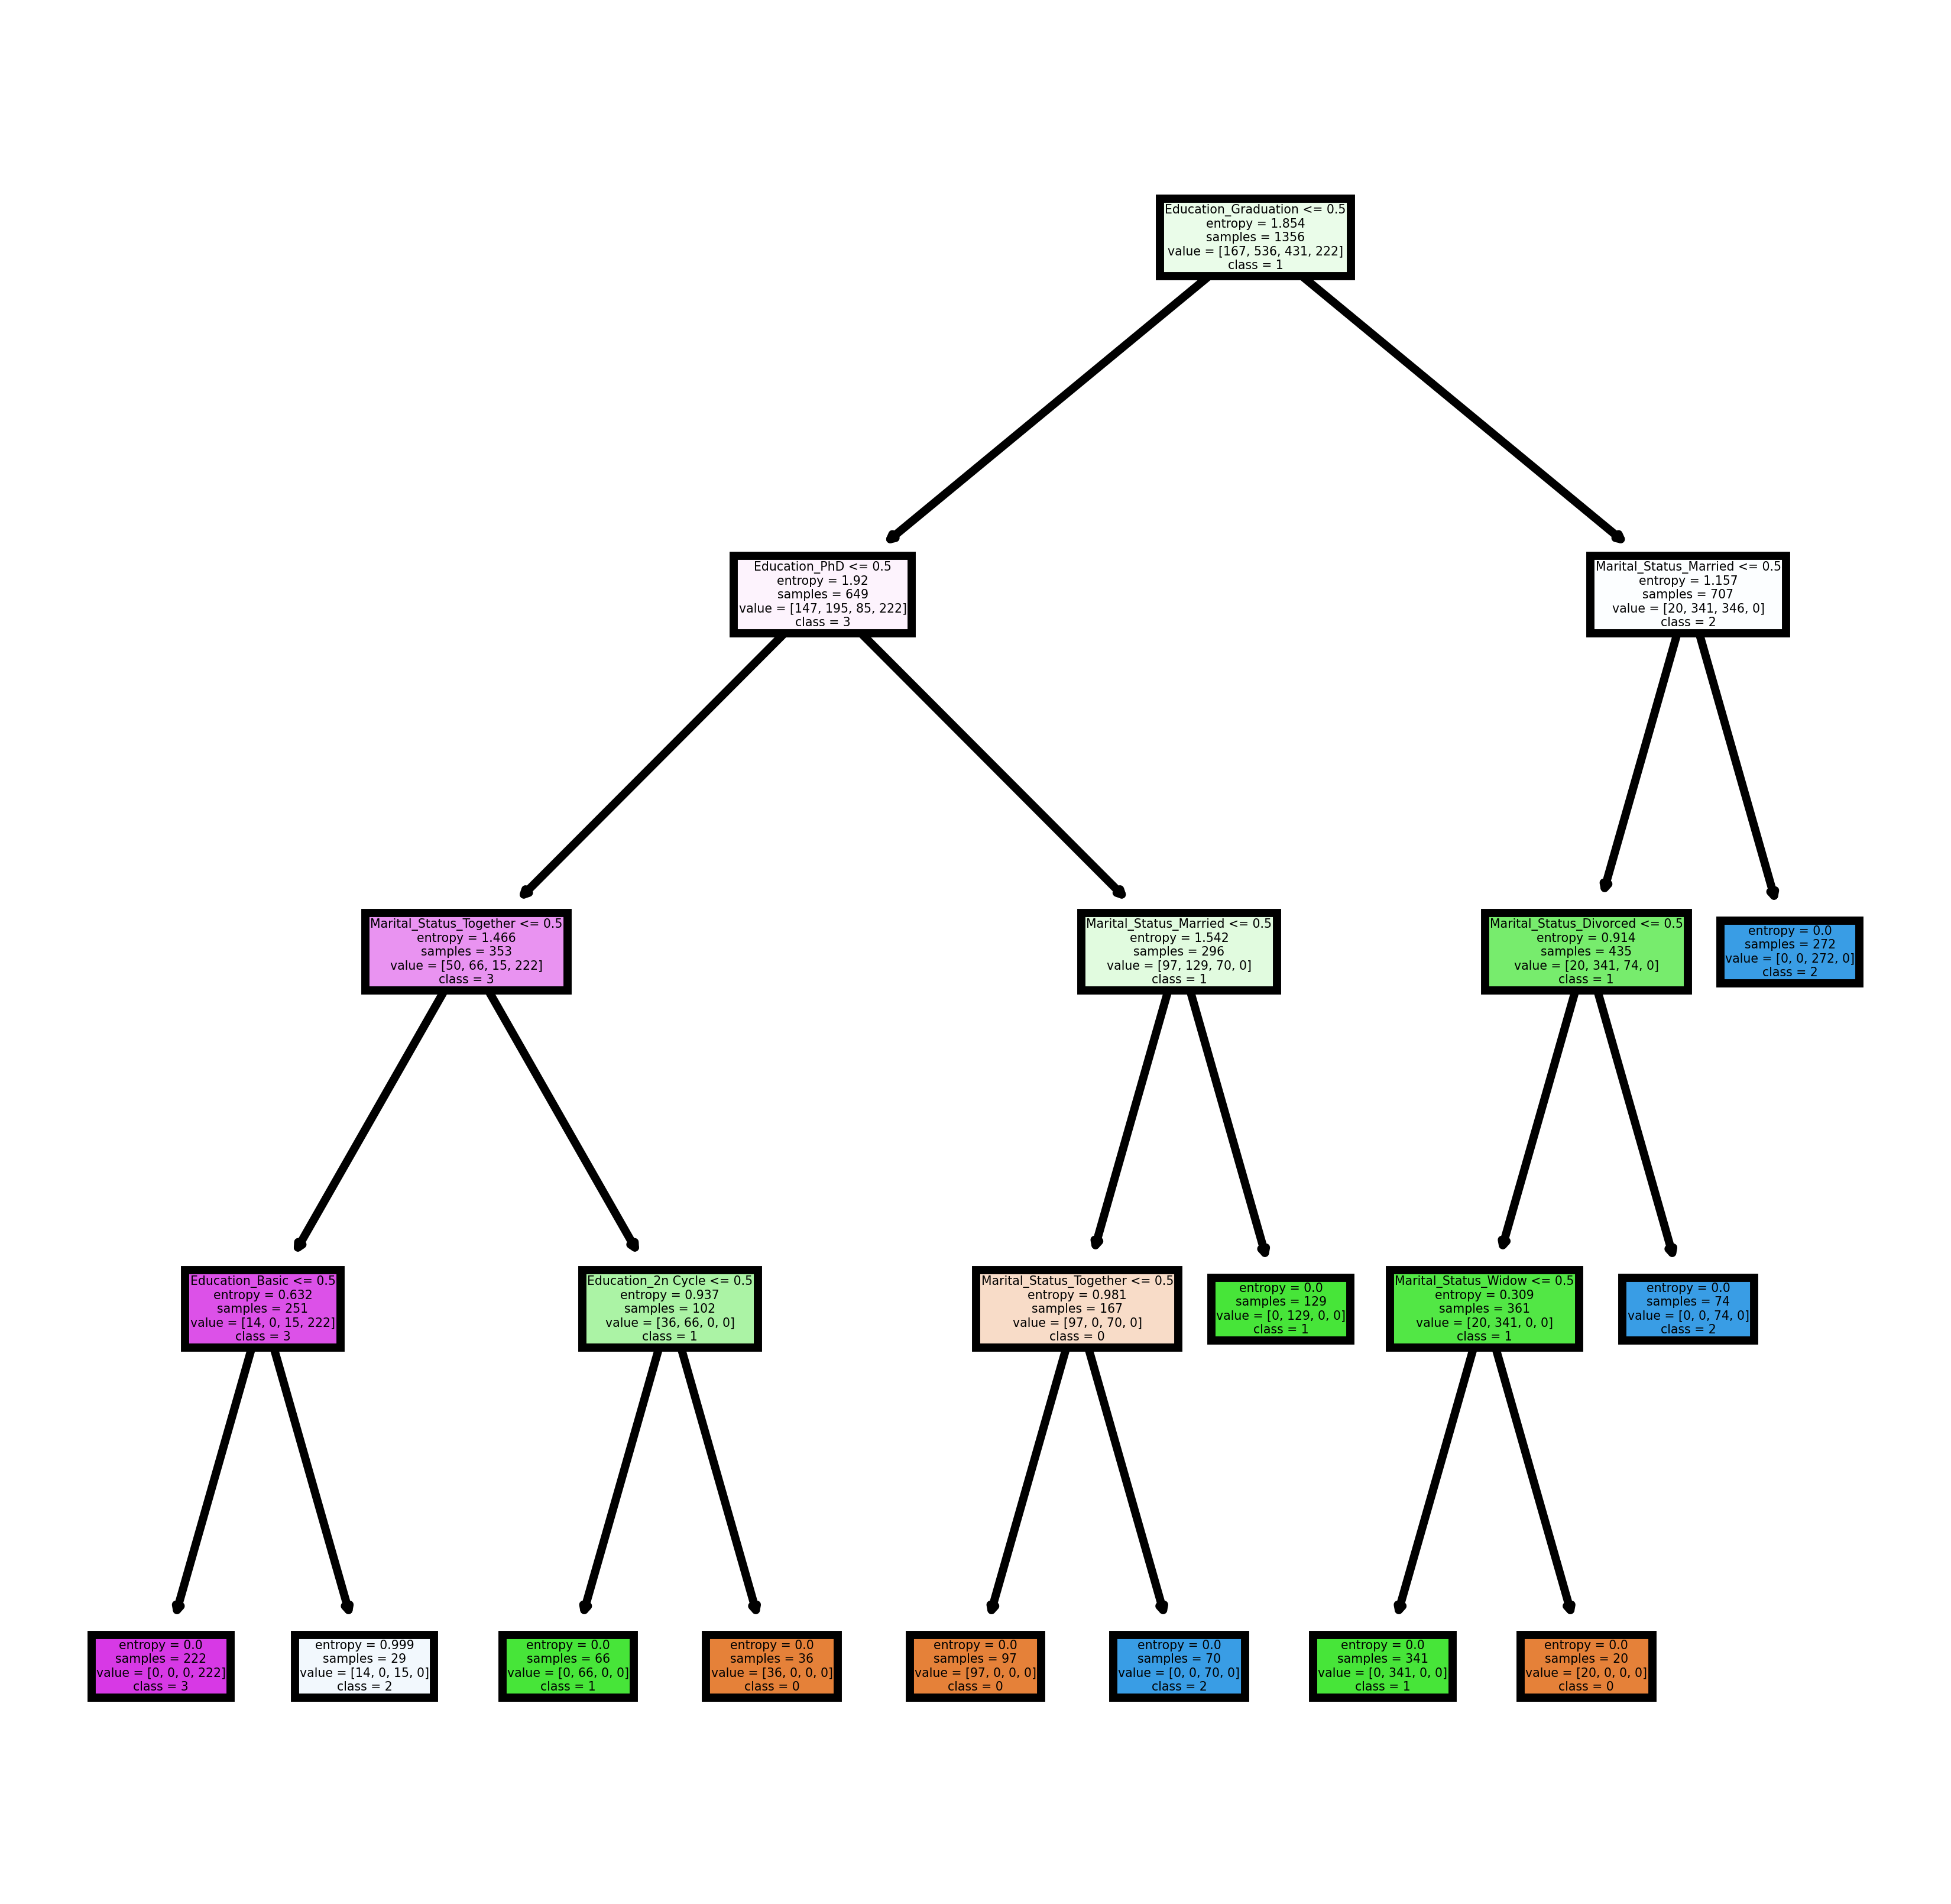

In [319]:
fn=['Income', 'Recency', 'NumWebVisitsMonth', 'Complain', 'Response',
       'Education_2n Cycle', 'Education_Basic', 'Education_Graduation',
       'Education_Master', 'Education_PhD', 'Marital_Status_Absurd',
       'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO', 'Expenses', 'NumPurchases', 'AcceptedCmp',
       'Childrenhome', 'Age']
cn=['0','1','2','3']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi=1000)
tree.plot_tree(model,
              feature_names = fn,
              class_names = cn,
              filled = True);

## Model Accuracy on Testing Dataset

In [320]:
# Predicting on test data
y_test_pred = model.predict(x_test) # Predicting on test dataset
pd.Series(y_test_pred).value_counts() # Getting the count of each class

1    210
2    201
3    101
0     70
dtype: int64

In [321]:
data2_DT2_test_ac=metrics.accuracy_score(y_test_pred,y_test)
data2_DT2_test_ac

0.993127147766323

## Model Accuracy on Training Dataset

In [322]:
y_train_pred = model.predict(x_train)
data2_DT2_train_ac=metrics.accuracy_score(y_train_pred,y_train)
data2_DT2_train_ac

0.9896755162241888

In [323]:
data2_DT2_accuracy_df = pd.DataFrame({'Training Accuracy (%)': [np.round(data2_DT2_train_ac*100,2)], 
                            'Testing Accuracy (%)': [np.round(data2_DT2_test_ac*100,2)]})
data2_DT2_accuracy_df

Training Accuracy (%)  Testing Accuracy (%)
0                  98.97                 99.31

## 3) Random Forests

In [324]:
array = data2.values
X = array[:,1:24]
Y = array[:,24]

## Building Random Forest Classifier

In [325]:
num_trees = 200
max_features = 5

model = RandomForestClassifier(n_estimators=num_trees, max_samples=0.8, max_features=max_features, random_state=8)

In [326]:
results = cross_val_score(model, X, Y, cv=10)
data2_RF_test_ac=results.mean()
data2_RF_test_ac

1.0

## 4) Boosting

In [327]:
array = data2.values
X = array[:,1:24]
Y = array[:,24]

## Building AdaBoost Classifier

In [328]:
num_trees = 40
model = AdaBoostClassifier(n_estimators=num_trees, learning_rate=0.5, random_state=8)

In [329]:
results = cross_val_score(model, X, Y, cv=10)
data2_Boosting_test_ac=results.mean()
data2_Boosting_test_ac

0.9199535281234976

## Visualising the CV results

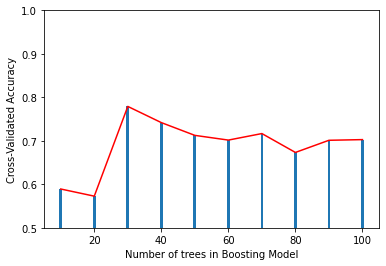

In [330]:
num_trees_range = [10*i for i in range(1,11)]
results = []
for n in num_trees_range:
    model = AdaBoostClassifier(n_estimators=n, learning_rate=0.5, random_state=8)
    scores = cross_val_score(model, X, Y, cv=5)
    results.append(scores.mean())
# plot
plt.bar(num_trees_range, results)
plt.plot(num_trees_range, results, color="red")
plt.xlabel('Number of trees in Boosting Model')
plt.ylabel('Cross-Validated Accuracy')
plt.ylim(0.5,1)
plt.show()

## 5) K-Nearest Neighbors (KNN)

In [331]:
array = data2.values
X = array[:,1:24]
Y = array[:,24]

In [332]:
X

array([[5.8138e+04, 5.8000e+01, 7.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        6.6000e+01],
       [4.6344e+04, 3.8000e+01, 5.0000e+00, ..., 0.0000e+00, 2.0000e+00,
        6.9000e+01],
       [7.1613e+04, 2.6000e+01, 4.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        5.8000e+01],
       ...,
       [5.6981e+04, 9.1000e+01, 6.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        4.2000e+01],
       [6.9245e+04, 8.0000e+00, 3.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        6.7000e+01],
       [5.2869e+04, 4.0000e+01, 7.0000e+00, ..., 0.0000e+00, 2.0000e+00,
        6.9000e+01]])

In [333]:
Y

array([1., 1., 1., ..., 2., 1., 1.])

In [334]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,shuffle=True)

## KNN Model Building

In [335]:
model = KNeighborsClassifier(n_neighbors=21)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=21)

In [336]:
pred=model.predict(x_test)
data2_KNN_test_ac=accuracy_score(pred,y_test)
data2_KNN_test_ac

0.3642611683848797

## Grid Search for Algorithm Tuning

In [337]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [338]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [339]:
print(grid.best_score_)
print(grid.best_params_)

0.405085377873678
{'n_neighbors': 1}


## Visualising the CV results

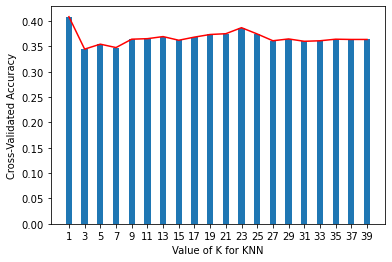

In [340]:
# choose k between 1 to 39
k_range = [2*i+1 for i in range(0,20)]
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=10)
    k_scores.append(scores.mean())
# plot
plt.bar(k_range, k_scores)
plt.plot(k_range, k_scores, color="red")
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_range)
plt.show()

## 6) Support Vector Machine (SVM)

In [341]:
array = data2.values
X = array[:,1:24]
Y = array[:,24]

In [342]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=15)

In [343]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1356, 23), (1356,), (582, 23), (582,))

In [344]:
clf = SVC(kernel="rbf",gamma=0.002)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy = ", acc)
confusion_matrix(y_test, y_pred)

Accuracy =  47.59450171821305


array([[ 13,  58,   1,   0],
       [  0, 221,   4,   3],
       [  0, 162,  33,   2],
       [  0,  74,   1,  10]], dtype=int64)

In [345]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.18      0.31        72
         1.0       0.43      0.97      0.59       228
         2.0       0.85      0.17      0.28       197
         3.0       0.67      0.12      0.20        85

    accuracy                           0.48       582
   macro avg       0.74      0.36      0.35       582
weighted avg       0.68      0.48      0.39       582



## Grid Search CV (Hyperparameter tuning)

In [346]:
clf = SVC()
param_grid = [{'kernel':["rbf"], 'gamma':[50,5,10,0.5,1,0.001,0.0001,0.00001],'C':[1,10,0.1] }]
gsv = GridSearchCV(clf,param_grid,cv=5)
gsv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 0.1],
                          'gamma': [50, 5, 10, 0.5, 1, 0.001, 0.0001, 1e-05],
                          'kernel': ['rbf']}])

In [347]:
gsv.best_params_, gsv.best_score_

({'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}, 0.4277349685261559)

### Building model using best parameters obtained in Grid Search CV

In [348]:
# Test data accuracy
clf = SVC(C=1, gamma=0.5, kernel="rbf")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
data2_SVM_test_ac = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", data2_SVM_test_ac)
confusion_matrix(y_test, y_pred)

Accuracy = 47.42268041237113


array([[ 12,  60,   0,   0],
       [  0, 228,   0,   0],
       [  0, 171,  26,   0],
       [  0,  75,   0,  10]], dtype=int64)

In [349]:
# Train data accuracy
clf = SVC(C=1, gamma=0.5, kernel="rbf")
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
data2_SVM_train_ac = accuracy_score(y_train, y_pred_train) * 100
print("Accuracy =", data2_SVM_train_ac)

Accuracy = 100.0


In [350]:
data2_SVM_accuracy_df = pd.DataFrame({'Training Accuracy (%)': [np.round(data2_SVM_train_ac,2)], 
                            'Testing Accuracy (%)': [np.round(data2_SVM_test_ac,2)]})
data2_SVM_accuracy_df

Training Accuracy (%)  Testing Accuracy (%)
0                  100.0                 47.42

## 7) Naive Bayes

In [351]:
array = data2.values
X = array[:,1:24]
Y = array[:,24]

In [352]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=15)

In [353]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1356, 23), (1356,), (582, 23), (582,))

### Multinomial Naive Bayes

In [354]:
classifier_mb = MB()
classifier_mb.fit(X_train,y_train)

MultinomialNB()

### Test data accuracy

In [355]:
y_pred = classifier_mb.predict(X_test)
data2_NB1_test_ac = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", data2_NB1_test_ac)
confusion_matrix(y_test, y_pred)

Accuracy = 28.694158075601372


array([[  9,   7,  19,  37],
       [ 12,  35,  66, 115],
       [  8,   2,  71, 116],
       [  2,  11,  20,  52]], dtype=int64)

In [356]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.29      0.12      0.17        72
         1.0       0.64      0.15      0.25       228
         2.0       0.40      0.36      0.38       197
         3.0       0.16      0.61      0.26        85

    accuracy                           0.29       582
   macro avg       0.37      0.31      0.26       582
weighted avg       0.45      0.29      0.28       582



### Train data accuracy

In [357]:
y_pred_train = classifier_mb.predict(X_train)
data2_NB1_train_ac = accuracy_score(y_train, y_pred_train) * 100
print("Accuracy =", data2_NB1_train_ac)

Accuracy = 32.30088495575221


In [358]:
data2_NB1_accuracy_df = pd.DataFrame({'Training Accuracy (%)': [np.round(data2_NB1_train_ac,2)], 
                            'Testing Accuracy (%)': [np.round(data2_NB1_test_ac,2)]})
data2_NB1_accuracy_df

Training Accuracy (%)  Testing Accuracy (%)
0                   32.3                 28.69

### Gaussian Naive Bayes

In [359]:
classifier_gb = GB()
classifier_gb.fit(X_train,y_train)

GaussianNB()

### Test data accuracy

In [360]:
y_pred = classifier_gb.predict(X_test)
data2_NB2_test_ac = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", data2_NB2_test_ac)
confusion_matrix(y_test, y_pred)

Accuracy = 73.71134020618557


array([[ 21,  40,  10,   1],
       [  0, 175,  53,   0],
       [  0,  27, 170,   0],
       [  0,  17,   5,  63]], dtype=int64)

In [361]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.29      0.45        72
         1.0       0.68      0.77      0.72       228
         2.0       0.71      0.86      0.78       197
         3.0       0.98      0.74      0.85        85

    accuracy                           0.74       582
   macro avg       0.84      0.67      0.70       582
weighted avg       0.77      0.74      0.73       582



### Train data accuracy

In [362]:
y_pred_train = classifier_gb.predict(X_train)
data2_NB2_train_ac = accuracy_score(y_train, y_pred_train) * 100
print("Accuracy =", data2_NB2_train_ac)

Accuracy = 75.07374631268436


In [363]:
data2_NB2_accuracy_df = pd.DataFrame({'Training Accuracy (%)': [np.round(data2_NB2_train_ac,2)], 
                            'Testing Accuracy (%)': [np.round(data2_NB2_test_ac,2)]})
data2_NB2_accuracy_df

Training Accuracy (%)  Testing Accuracy (%)
0                  75.07                 73.71

## 8) Gradient Boosting

In [364]:
array = data2.values
X = array[:,1:24]
Y = array[:,24]

In [365]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=15)

In [366]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1356, 23), (1356,), (582, 23), (582,))

## Gradient Boosting Model Building

In [367]:
gb_classifier = GradientBoostingClassifier(n_estimators=50)
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=50)

In [368]:
y_pred = gb_classifier.predict(X_test)
data2_GB_test_ac=accuracy_score(y_pred,y_test)
data2_GB_test_ac

1.0

In [369]:
y_pred_train = gb_classifier.predict(X_train)
data2_GB_train_ac = accuracy_score(y_train, y_pred_train)
data2_GB_train_ac

1.0

In [370]:
data2_GB_accuracy_df = pd.DataFrame({'Training Accuracy (%)': [np.round(data2_GB_train_ac*100,2)], 
                            'Testing Accuracy (%)': [np.round(data2_GB_test_ac*100,2)]})
data2_GB_accuracy_df

Training Accuracy (%)  Testing Accuracy (%)
0                  100.0                 100.0

## 9) XGBoost

In [371]:
array = data2.values
X = array[:,1:24]
Y = array[:,24]

In [372]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=15)

In [373]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1356, 23), (1356,), (582, 23), (582,))

## XGBoost Model Building

In [374]:
xgb_classifier = XGBClassifier(objective='multi:softmax', num_class=4)
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_class=4,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [375]:
y_pred = xgb_classifier.predict(X_test)
data2_XGB_test_ac=accuracy_score(y_pred,y_test)
data2_XGB_test_ac

1.0

In [376]:
y_pred_train = xgb_classifier.predict(X_train)
data2_XGB_train_ac = accuracy_score(y_train, y_pred_train)
data2_XGB_train_ac

1.0

In [377]:
data2_XGB_accuracy_df = pd.DataFrame({'Training Accuracy (%)': [np.round(data2_XGB_train_ac*100,2)], 
                            'Testing Accuracy (%)': [np.round(data2_XGB_test_ac*100,2)]})
data2_XGB_accuracy_df

Training Accuracy (%)  Testing Accuracy (%)
0                  100.0                 100.0

In [378]:
xgb_classifier = XGBClassifier(objective='multi:softmax', num_class=4)

# Define the hyperparameter grid for tuning
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 150]
}

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the accuracy of the model
data1_XGB_ac = accuracy_score(y_test, y_pred)
print("Best Parameters:", best_params)
print("Accuracy:", data1_XGB_ac)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Accuracy: 1.0


## 10) LightGBM

In [379]:
array = data2.values
X = array[:,1:24]
Y = array[:,24]

In [380]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=15)

In [381]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1356, 23), (1356,), (582, 23), (582,))

## LightGBM Model Building

In [382]:
lgbm_classifier = LGBMClassifier()
lgbm_classifier.fit(X_train, y_train)

LGBMClassifier()

In [383]:
y_pred = lgbm_classifier.predict(X_test)
data2_LGBM_test_ac=accuracy_score(y_pred,y_test)
data2_LGBM_test_ac

1.0

In [384]:
y_pred_train = lgbm_classifier.predict(X_train)
data2_LGBM_train_ac = accuracy_score(y_train, y_pred_train)
data2_LGBM_train_ac

1.0

In [385]:
data2_LGBM_accuracy_df = pd.DataFrame({'Training Accuracy (%)': [np.round(data2_LGBM_train_ac*100,2)], 
                            'Testing Accuracy (%)': [np.round(data2_LGBM_test_ac*100,2)]})
data2_LGBM_accuracy_df

Training Accuracy (%)  Testing Accuracy (%)
0                  100.0                 100.0

## Grid Search CV (Hyperparameter tuning)

In [386]:

# Define the parameter grids for each classifier

gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001]
}

xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001]
}

lgbm_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Initialize the classifiers
gb_classifier = GradientBoostingClassifier()
xgb_classifier = XGBClassifier()
lgbm_classifier = LGBMClassifier()

# Create a dictionary of classifiers and their corresponding parameter grids
classifiers = {
    'Gradient Boosting': (gb_classifier, gb_param_grid),
    'XGBoost': (xgb_classifier, xgb_param_grid),
    'LightGBM': (lgbm_classifier, lgbm_param_grid)
}

# Perform grid search cross-validation for each classifier
for name, (classifier, param_grid) in classifiers.items():
    print(f"Performing grid search for {name}...")
    grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=3)
    grid_search.fit(X_train, y_train)
    
    # Get the best parameters and best model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Make predictions on the test set using the best model
    y_pred = best_model.predict(X_test)

    # Evaluate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    print("Best Parameters:", best_params)
    print("Accuracy:", accuracy)

Performing grid search for Gradient Boosting...
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Accuracy: 1.0
Performing grid search for XGBoost...
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Accuracy: 1.0
Performing grid search for LightGBM...
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Accuracy: 1.0


In [387]:
Testing_Accuracy = {'Model': pd.Series(['Logistic Regression', 'Decision Tree', 'Random Forests', 'Boosting', 'K-Nearest Neighbors (KNN)', 'Support Vector Machine (SVM)','Naive Bayes', 'Gradient Boosting', 'XGBoost', 'LightGBM']),
                                    'Baseline Models Accuracy (%)': pd.Series([round(data1_logistic_test_ac*100,2), round(data1_DT1_test_ac*100,2), round(data1_RF_test_ac*100,2), round(data1_Boosting_test_ac*100,2), round(data1_KNN_test_ac*100,2), round(data1_SVM_test_ac,2), round(data1_NB2_test_ac,2), round(data1_GB_test_ac*100,2), round(data1_XGB_test_ac*100,2), round(data1_LGBM_test_ac*100,2)]),
                                    'Transformed Data Accuracy (%)': pd.Series([round(data2_logistic_test_ac*100,2), round(data2_DT1_test_ac*100,2), round(data2_RF_test_ac*100,2), round(data2_Boosting_test_ac*100,2), round(data2_KNN_test_ac*100,2), round(data2_SVM_test_ac,2), round(data2_NB2_test_ac,2), round(data2_GB_test_ac*100,2), round(data2_XGB_test_ac*100,2), round(data2_LGBM_test_ac*100,2)])}
Testing_Accuracy_df = pd.DataFrame(Testing_Accuracy)
Testing_Accuracy_df

Model  Baseline Models Accuracy (%)  \
0           Logistic Regression                         38.32   
1                 Decision Tree                         99.31   
2                Random Forests                        100.00   
3                      Boosting                         92.00   
4     K-Nearest Neighbors (KNN)                         36.94   
5  Support Vector Machine (SVM)                         47.42   
6                   Naive Bayes                         68.90   
7             Gradient Boosting                        100.00   
8                       XGBoost                        100.00   
9                      LightGBM                        100.00   

   Transformed Data Accuracy (%)  
0                          35.40  
1                          99.31  
2                         100.00  
3                          92.00  
4                          36.43  
5                          47.42  
6                          73.71  
7                         100.00  
8                         100.00  
9                         100.00

## Perform PCA

In [388]:
data1.head()

ID  Year_Birth   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0  5524        1957  58138.0        0         0       58       635         88   
1  2174        1954  46344.0        1         1       38        11          1   
2  4141        1965  71613.0        0         0       26       426         49   
3  6182        1984  26646.0        1         0       26        11          4   
4  5324        1981  58293.0        1         0       94       173         43   

   MntMeatProducts  MntFishProducts  ...  Marital_Status_Single  \
0              546              172  ...                      1   
1                6                2  ...                      1   
2              127              111  ...                      0   
3               20               10  ...                      0   
4              118               46  ...                      0   

   Marital_Status_Together  Marital_Status_Widow  Marital_Status_YOLO  \
0                        0                     0                    0   
1                        0                     0                    0   
2                        1                     0                    0   
3                        1                     0                    0   
4                        0                     0                    0   

   Expenses  NumPurchases  AcceptedCmp  Childrenhome  Age  clusterid  
0      1617            25            0             0   66          1  
1        27             6            0             2   69          1  
2       776            21            0             0   58          1  
3        53             8            0             1   39          1  
4       422            19            0             1   42          1  

[5 rows x 43 columns]

In [389]:
DATA = data1.iloc[:, 1:37].values
DATA

array([[1.9570e+03, 5.8138e+04, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.9540e+03, 4.6344e+04, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.9650e+03, 7.1613e+04, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [1.9810e+03, 5.6981e+04, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.9560e+03, 6.9245e+04, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.9540e+03, 5.2869e+04, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [390]:
data1_normal = scale(DATA)
data1_normal

array([[-1.06275212,  0.44254564, -0.89211467, ..., -0.59125474,
        -0.15765334,  0.        ],
       [-1.3262309 , -0.15236805,  0.94520545, ..., -0.59125474,
        -0.15765334,  0.        ],
       [-0.36014205,  1.12225244, -0.89211467, ...,  1.69131835,
        -0.15765334,  0.        ],
       ...,
       [ 1.04507811,  0.38418417, -0.89211467, ..., -0.59125474,
        -0.15765334,  0.        ],
       [-1.15057838,  1.00280564, -0.89211467, ...,  1.69131835,
        -0.15765334,  0.        ],
       [-1.3262309 ,  0.17676641,  0.94520545, ..., -0.59125474,
        -0.15765334,  0.        ]])

In [391]:
pca = PCA()
pca_values = pca.fit_transform(data1_normal)

In [392]:
pca_values

array([[ 4.59183685e+00, -1.58275783e+00,  1.96923635e+00, ...,
        -2.37780291e-16, -3.22439128e-17,  1.36290253e-16],
       [-2.02760363e+00, -2.03639103e-01,  5.66938000e-01, ...,
        -1.17898341e-16, -1.11065585e-16,  3.69607442e-16],
       [ 2.35657525e+00, -3.80604150e-01,  4.91355594e-01, ...,
        -1.18927142e-16, -2.39867722e-16,  6.68072794e-18],
       ...,
       [ 1.95546056e+00,  6.96170051e-01,  6.11074681e-01, ...,
         3.11556766e-17, -9.16787338e-17,  6.41773874e-17],
       [ 2.55084210e+00,  1.49791260e+00, -1.24823908e+00, ...,
         9.14464771e-18, -1.18163139e-17,  4.95538816e-18],
       [-1.56013848e+00,  1.59352414e+00, -8.30589525e-01, ...,
        -5.30038965e-17, -1.18910649e-17,  1.17917916e-17]])

In [393]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([1.99013934e-01, 6.83040347e-02, 5.31078028e-02, 4.76314284e-02,
       4.60794986e-02, 4.27199902e-02, 3.79606070e-02, 3.75586947e-02,
       3.60893280e-02, 3.30069871e-02, 3.21056064e-02, 3.11978331e-02,
       3.03982620e-02, 2.96332915e-02, 2.91904503e-02, 2.81626684e-02,
       2.72838811e-02, 2.46301999e-02, 2.27474279e-02, 2.03597506e-02,
       1.72669087e-02, 1.58245236e-02, 1.52211186e-02, 1.26542548e-02,
       1.21274314e-02, 1.16282275e-02, 1.11986663e-02, 9.16835248e-03,
       7.13572437e-03, 6.14364163e-03, 4.44947347e-03, 3.92485781e-32,
       3.60061454e-33, 8.74323199e-34, 8.74323199e-34, 8.74323199e-34])

<BarContainer object of 36 artists>

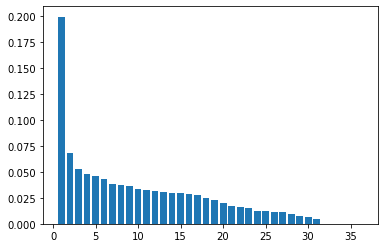

In [394]:
plt.bar(range(1,len(var)+1),var)

In [395]:
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([19.9 , 26.73, 32.04, 36.8 , 41.41, 45.68, 49.48, 53.24, 56.85,
       60.15, 63.36, 66.48, 69.52, 72.48, 75.4 , 78.22, 80.95, 83.41,
       85.68, 87.72, 89.45, 91.03, 92.55, 93.82, 95.03, 96.19, 97.31,
       98.23, 98.94, 99.55, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99])

In [396]:
pca.components_

array([[-7.89023283e-02,  3.30988818e-01, -2.55225478e-01, ...,
         2.87357069e-03,  2.30774356e-02, -0.00000000e+00],
       [-3.53195944e-01,  8.55120588e-02, -6.26100400e-02, ...,
         6.84299551e-02,  4.25800637e-02, -0.00000000e+00],
       [ 5.88189172e-02, -9.55693295e-02,  9.41508464e-02, ...,
        -5.05103770e-02,  1.72353722e-03, -0.00000000e+00],
       ...,
       [-0.00000000e+00, -4.72450110e-17, -8.27256335e-17, ...,
        -3.42084678e-02, -1.20115551e-02, -0.00000000e+00],
       [-0.00000000e+00, -1.10753001e-17, -3.42278068e-18, ...,
        -2.80545914e-04, -9.85075603e-05, -0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

(0.0, 100.0)

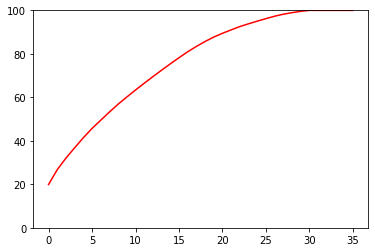

In [397]:
# Variance plot for PCA components obtained 
plt.plot(var1,color="red")
plt.ylim(0,100)

In [398]:
DATA.shape

(1938, 36)

In [399]:
pca_values.shape

(1938, 36)

In [400]:
pca_features = pd.DataFrame(pca_values[:,0:18],columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13','pc14','pc15','pc16','pc17','pc18'])
pca_features.head()

pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
0  4.591837 -1.582758  1.969236 -0.706414  3.175963 -0.402749 -0.031313   
1 -2.027604 -0.203639  0.566938 -1.204806 -0.139986 -1.555985 -0.611416   
2  2.356575 -0.380604  0.491356 -1.331237 -0.884271  0.588634  0.653379   
3 -2.399422 -1.346598  0.608499 -1.157402 -0.775155  0.692044  0.988250   
4  0.088447  0.180086 -0.954074  1.676558  0.471140  0.329084  0.964092   

        pc8       pc9      pc10      pc11      pc12      pc13      pc14  \
0 -0.514342 -0.012639  0.331137 -0.702328  0.368176  0.124332 -0.117842   
1  0.549211 -0.546364  1.178333 -0.788128  0.276268  0.178744 -0.435888   
2 -0.332883  0.698154  0.229497 -0.205060 -0.179833 -1.148744  0.382734   
3 -0.228774  0.988273 -0.366855 -0.474207 -0.237676 -1.004280  0.060575   
4  0.178216 -1.005345 -1.690640 -0.091998  0.069571  0.915453  0.322604   

       pc15      pc16      pc17      pc18  
0  0.236199  0.333699  0.598430 -0.001918  
1  0.964910 -0.692941 -0.205835  1.041133  
2 -0.165914 -0.702732 -0.006251 -0.519578  
3 -0.371773 -0.413716  0.404102 -0.209779  
4 -0.409107 -0.037902  1.862199 -0.289991

## Perform Clustering on PCA Data

In [401]:
pca_features_norm = norm_func(pca_features)
pca_features_norm.head()

pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
0  0.786167  0.227780  0.679417  0.250407  0.781213  0.327192  0.320638   
1  0.237325  0.373799  0.514109  0.165005  0.362521  0.196292  0.267989   
2  0.600834  0.355062  0.505199  0.143340  0.268543  0.439720  0.382778   
3  0.206496  0.252784  0.519008  0.173128  0.282321  0.451458  0.413170   
4  0.412775  0.414427  0.334806  0.658742  0.439686  0.410260  0.410978   

        pc8       pc9      pc10      pc11      pc12      pc13      pc14  \
0  0.346481  0.282325  0.402033  0.277433  0.390595  0.479650  0.369775   
1  0.451390  0.237828  0.480375  0.271080  0.381701  0.487110  0.337008   
2  0.364380  0.341584  0.392634  0.314251  0.337566  0.305105  0.421346   
3  0.374649  0.365772  0.337488  0.294323  0.331968  0.324912  0.388156   
4  0.414795  0.199563  0.215075  0.322622  0.361700  0.588117  0.415151   

       pc15      pc16      pc17      pc18  
0  0.449437  0.320585  0.518050  0.252064  
1  0.518016  0.155260  0.441082  0.328088  
2  0.411594  0.153684  0.460182  0.214334  
3  0.392220  0.200225  0.499453  0.236914  
4  0.388707  0.260744  0.638992  0.231067

### K-Means Clustering

In [402]:
model_kmeans = KMeans(n_clusters=4) 
model_kmeans.fit(pca_features_norm)

KMeans(n_clusters=4)

In [403]:
model_kmeans.labels_

array([1, 0, 1, ..., 1, 1, 2])

In [404]:
pca_features['k_clusterid'] = pd.Series(model_kmeans.labels_)
pca_features.head()

pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
0  4.591837 -1.582758  1.969236 -0.706414  3.175963 -0.402749 -0.031313   
1 -2.027604 -0.203639  0.566938 -1.204806 -0.139986 -1.555985 -0.611416   
2  2.356575 -0.380604  0.491356 -1.331237 -0.884271  0.588634  0.653379   
3 -2.399422 -1.346598  0.608499 -1.157402 -0.775155  0.692044  0.988250   
4  0.088447  0.180086 -0.954074  1.676558  0.471140  0.329084  0.964092   

        pc8       pc9      pc10      pc11      pc12      pc13      pc14  \
0 -0.514342 -0.012639  0.331137 -0.702328  0.368176  0.124332 -0.117842   
1  0.549211 -0.546364  1.178333 -0.788128  0.276268  0.178744 -0.435888   
2 -0.332883  0.698154  0.229497 -0.205060 -0.179833 -1.148744  0.382734   
3 -0.228774  0.988273 -0.366855 -0.474207 -0.237676 -1.004280  0.060575   
4  0.178216 -1.005345 -1.690640 -0.091998  0.069571  0.915453  0.322604   

       pc15      pc16      pc17      pc18  k_clusterid  
0  0.236199  0.333699  0.598430 -0.001918            1  
1  0.964910 -0.692941 -0.205835  1.041133            0  
2 -0.165914 -0.702732 -0.006251 -0.519578            1  
3 -0.371773 -0.413716  0.404102 -0.209779            0  
4 -0.409107 -0.037902  1.862199 -0.289991            2

In [405]:
pca_features_norm['k_clusterid'] = pd.Series(model_kmeans.labels_)
pca_features_norm.head()

pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
0  0.786167  0.227780  0.679417  0.250407  0.781213  0.327192  0.320638   
1  0.237325  0.373799  0.514109  0.165005  0.362521  0.196292  0.267989   
2  0.600834  0.355062  0.505199  0.143340  0.268543  0.439720  0.382778   
3  0.206496  0.252784  0.519008  0.173128  0.282321  0.451458  0.413170   
4  0.412775  0.414427  0.334806  0.658742  0.439686  0.410260  0.410978   

        pc8       pc9      pc10      pc11      pc12      pc13      pc14  \
0  0.346481  0.282325  0.402033  0.277433  0.390595  0.479650  0.369775   
1  0.451390  0.237828  0.480375  0.271080  0.381701  0.487110  0.337008   
2  0.364380  0.341584  0.392634  0.314251  0.337566  0.305105  0.421346   
3  0.374649  0.365772  0.337488  0.294323  0.331968  0.324912  0.388156   
4  0.414795  0.199563  0.215075  0.322622  0.361700  0.588117  0.415151   

       pc15      pc16      pc17      pc18  k_clusterid  
0  0.449437  0.320585  0.518050  0.252064            1  
1  0.518016  0.155260  0.441082  0.328088            0  
2  0.411594  0.153684  0.460182  0.214334            1  
3  0.392220  0.200225  0.499453  0.236914            0  
4  0.388707  0.260744  0.638992  0.231067            2

In [406]:
df3['pca_k_clusterid'] = model_kmeans.labels_
df3.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  Z_Revenue  Response  d_clusterid  \
0  2012-04-09       58       635  ...         11         1            0   
1  2014-08-03       38        11  ...         11         0            0   
2  2013-08-21       26       426  ...         11         0            1   
3  2014-10-02       26        11  ...         11         0            1   
4  2014-01-19       94       173  ...         11         0            2   

   k_clusterid  Expenses  NumPurchases  AcceptedCmp  Childrenhome  Age  \
0            1      1617            25            0             0   66   
1            1        27             6            0             2   69   
2            1       776            21            0             0   58   
3            1        53             8            0             1   39   
4            1       422            19            0             1   42   

   pca_k_clusterid  
0                1  
1                0  
2                1  
3                0  
4                2  

[5 rows x 37 columns]

In [575]:
df3.groupby('pca_k_clusterid')[['Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth','Expenses', 'NumPurchases', 
       'AcceptedCmp', 'Childrenhome', 'Age']].mean()

Income   Kidhome  Teenhome    Recency    MntWines  \
pca_k_clusterid                                                            
0                40830.508197  0.661635  0.591195  50.249057  130.000000   
1                71765.244192  0.050740  0.365751  50.469345  532.346723   
2                42877.096720  0.605136  0.589085  48.863563  181.109149   
3                54277.765957  0.297872  0.680851  47.659574  294.042553   

                 MntFruits  MntMeatProducts  MntFishProducts  \
pca_k_clusterid                                                
0                 7.899371        48.143396        11.472956   
1                65.733615       389.300211        93.911205   
2                10.117175        55.285714        14.057785   
3                31.765957       151.425532        42.936170   

                 MntSweetProducts  MntGoldProds  NumDealsPurchases  \
pca_k_clusterid                                                      
0                        7.915723     26.240252           2.527044   
1                       66.205074     77.697674           1.786469   
2                       10.449438     28.380417           2.638844   
3                       38.553191     49.808511           2.212766   

                 NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
pca_k_clusterid                                                            
0                       3.206289             1.084277           4.241509   
1                       5.473573             5.526427           8.852008   
2                       3.504013             1.309791           4.797753   
3                       4.021277             2.872340           6.148936   

                 NumWebVisitsMonth     Expenses  NumPurchases  AcceptedCmp  \
pca_k_clusterid                                                              
0                         6.298113   231.671698     11.059119     0.093082   
1                         3.253700  1225.194503     21.638478     0.169133   
2                         6.152488   299.399679     12.250401     0.136437   
3                         4.829787   608.531915     15.255319     0.085106   

                 Childrenhome        Age  
pca_k_clusterid                           
0                    1.252830  53.715723  
1                    0.416490  54.997886  
2                    1.194222  52.635634  
3                    0.978723  62.702128

In [407]:
data1['pca_k_clusterid'] = model_kmeans.labels_
data1.head()

ID  Year_Birth   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0  5524        1957  58138.0        0         0       58       635         88   
1  2174        1954  46344.0        1         1       38        11          1   
2  4141        1965  71613.0        0         0       26       426         49   
3  6182        1984  26646.0        1         0       26        11          4   
4  5324        1981  58293.0        1         0       94       173         43   

   MntMeatProducts  MntFishProducts  ...  Marital_Status_Together  \
0              546              172  ...                        0   
1                6                2  ...                        0   
2              127              111  ...                        1   
3               20               10  ...                        1   
4              118               46  ...                        0   

   Marital_Status_Widow  Marital_Status_YOLO  Expenses  NumPurchases  \
0                     0                    0      1617            25   
1                     0                    0        27             6   
2                     0                    0       776            21   
3                     0                    0        53             8   
4                     0                    0       422            19   

   AcceptedCmp  Childrenhome  Age  clusterid  pca_k_clusterid  
0            0             0   66          1                1  
1            0             2   69          1                0  
2            0             0   58          1                1  
3            0             1   39          1                0  
4            0             1   42          1                2  

[5 rows x 44 columns]

In [408]:
data1.groupby(["pca_k_clusterid"])["ID"].count()

pca_k_clusterid
0    795
1    473
2    623
3     47
Name: ID, dtype: int64

<AxesSubplot:xlabel='pca_k_clusterid'>

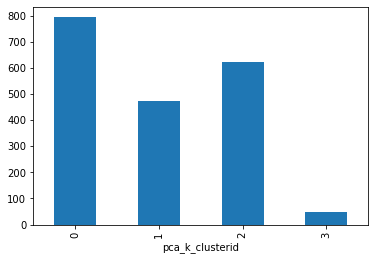

In [409]:
data1.groupby(["pca_k_clusterid"])["ID"].count().plot(kind='bar')

### Cluster Validation - Finding Optimal Number of Clusters for K-Means Clustering

### Elbow method for K-Means Clustering

In [410]:
nc=[2,3,4,5,6,7,8,9,10,11,12,13,14,15]
iner=[]    
for i in nc:
    km=KMeans(i)
    km.fit(pca_features_norm)
    iner.append(km.inertia_)

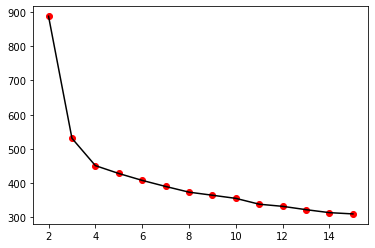

In [411]:
plt.plot(nc,iner,color="black")
plt.scatter(nc,iner,color="red")
plt.show()

## Model Building - Classification Algorithms

In [412]:
pca_features.head()

pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
0  4.591837 -1.582758  1.969236 -0.706414  3.175963 -0.402749 -0.031313   
1 -2.027604 -0.203639  0.566938 -1.204806 -0.139986 -1.555985 -0.611416   
2  2.356575 -0.380604  0.491356 -1.331237 -0.884271  0.588634  0.653379   
3 -2.399422 -1.346598  0.608499 -1.157402 -0.775155  0.692044  0.988250   
4  0.088447  0.180086 -0.954074  1.676558  0.471140  0.329084  0.964092   

        pc8       pc9      pc10      pc11      pc12      pc13      pc14  \
0 -0.514342 -0.012639  0.331137 -0.702328  0.368176  0.124332 -0.117842   
1  0.549211 -0.546364  1.178333 -0.788128  0.276268  0.178744 -0.435888   
2 -0.332883  0.698154  0.229497 -0.205060 -0.179833 -1.148744  0.382734   
3 -0.228774  0.988273 -0.366855 -0.474207 -0.237676 -1.004280  0.060575   
4  0.178216 -1.005345 -1.690640 -0.091998  0.069571  0.915453  0.322604   

       pc15      pc16      pc17      pc18  k_clusterid  
0  0.236199  0.333699  0.598430 -0.001918            1  
1  0.964910 -0.692941 -0.205835  1.041133            0  
2 -0.165914 -0.702732 -0.006251 -0.519578            1  
3 -0.371773 -0.413716  0.404102 -0.209779            0  
4 -0.409107 -0.037902  1.862199 -0.289991            2

In [413]:
pca_features.shape

(1938, 19)

### Distribution of customers in different PCA clusters

<AxesSubplot:ylabel='pca_k_clusterid'>

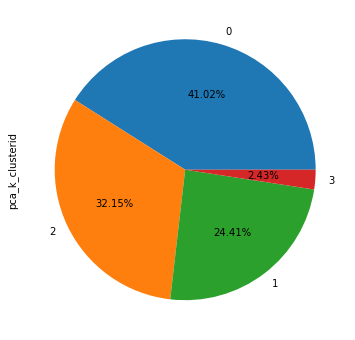

In [414]:
plt.figure(figsize=(6,6))
df3.pca_k_clusterid.value_counts().plot(kind='pie',autopct="%1.2f%%")

<AxesSubplot:xlabel='pca_k_clusterid'>

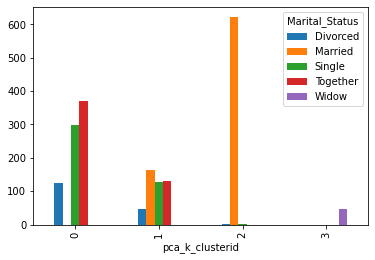

In [415]:
pd.crosstab(df3.pca_k_clusterid,df3.Marital_Status).plot(kind="bar")

<AxesSubplot:xlabel='pca_k_clusterid'>

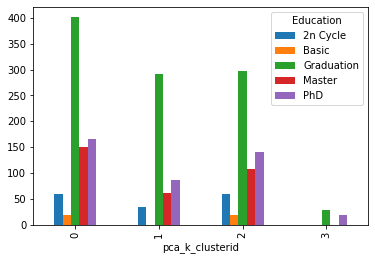

In [416]:
pd.crosstab(df3.pca_k_clusterid,df3.Education).plot(kind="bar")

<AxesSubplot:xlabel='AcceptedCmp'>

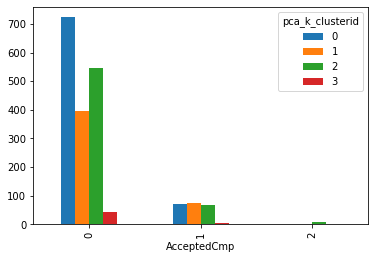

In [417]:
pd.crosstab(df3.AcceptedCmp,df3.pca_k_clusterid).plot(kind="bar")

<AxesSubplot:xlabel='pca_k_clusterid'>

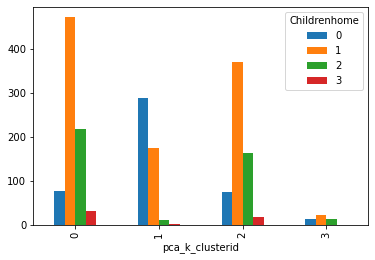

In [418]:
pd.crosstab(df3.pca_k_clusterid,df3.Childrenhome).plot(kind="bar")

<AxesSubplot:xlabel='pca_k_clusterid'>

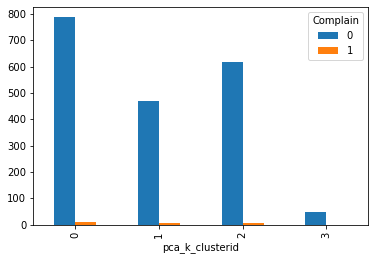

In [419]:
pd.crosstab(df3.pca_k_clusterid,df3.Complain).plot(kind="bar")

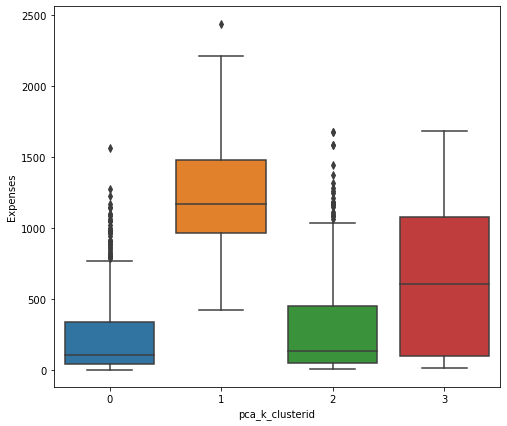

In [420]:
plt.figure(figsize=(8,7))
sns.boxplot(x='pca_k_clusterid', y='Expenses', data=df3)
plt.ylabel('Expenses')
plt.show()

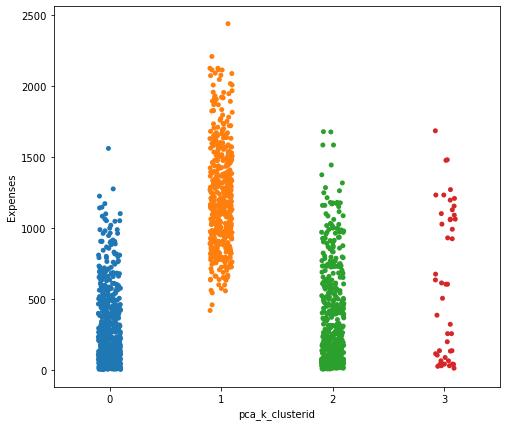

In [421]:
plt.figure(figsize=(8,7))
sns.stripplot(x='pca_k_clusterid', y='Expenses', data=df3)
plt.ylabel('Expenses')
plt.show()

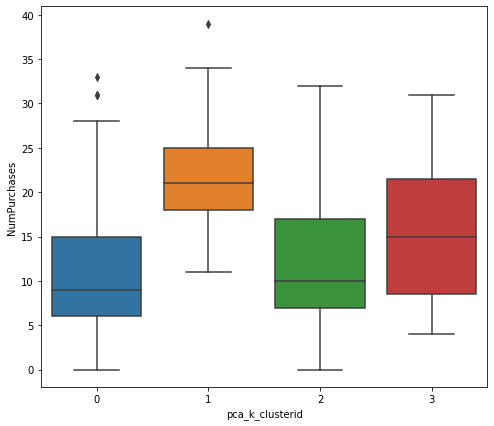

In [422]:
plt.figure(figsize=(8,7))
sns.boxplot(x='pca_k_clusterid', y='NumPurchases', data=df3)
plt.ylabel('NumPurchases')
plt.show()

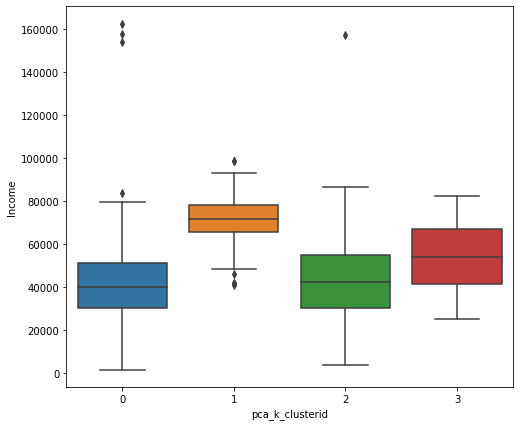

In [423]:
plt.figure(figsize=(8,7))
sns.boxplot(x='pca_k_clusterid', y='Income', data=df3)
plt.ylabel('Income')
plt.show()

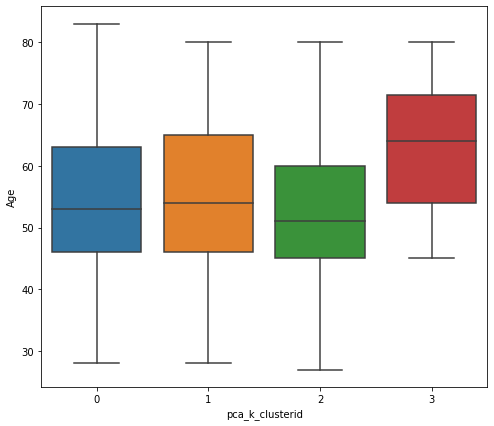

In [424]:
plt.figure(figsize=(8,7))
sns.boxplot(x='pca_k_clusterid', y='Age', data=df3)
plt.ylabel('Age')
plt.show()

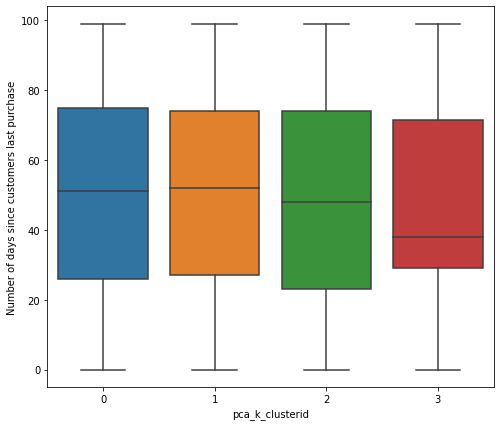

In [425]:
plt.figure(figsize=(8,7))
sns.boxplot(x='pca_k_clusterid', y='Recency', data=df3)
plt.ylabel('Number of days since customers last purchase')
plt.show()

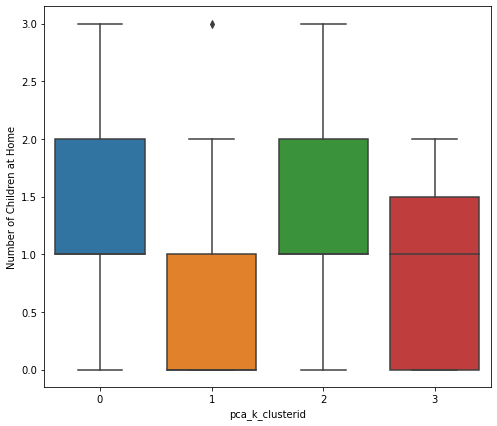

In [426]:
plt.figure(figsize=(8,7))
sns.boxplot(x='pca_k_clusterid', y='Childrenhome', data=df3)
plt.ylabel('Number of Children at Home')
plt.show()

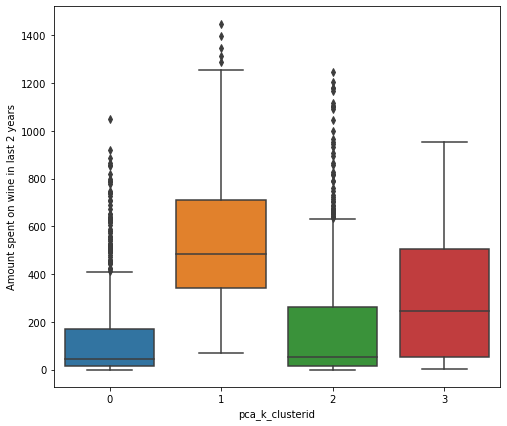

In [429]:
plt.figure(figsize=(8,7))
sns.boxplot(x='pca_k_clusterid', y='MntWines', data=df3)
plt.ylabel('Amount spent on wine in last 2 years')
plt.show()

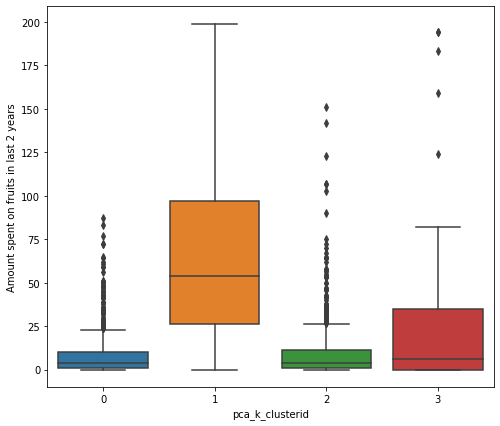

In [430]:
plt.figure(figsize=(8,7))
sns.boxplot(x='pca_k_clusterid', y='MntFruits', data=df3)
plt.ylabel('Amount spent on fruits in last 2 years')
plt.show()

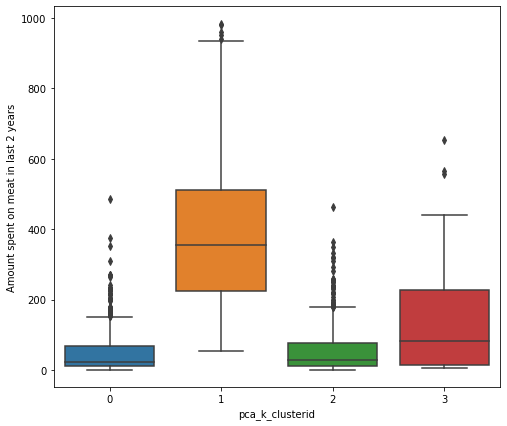

In [431]:
plt.figure(figsize=(8,7))
sns.boxplot(x='pca_k_clusterid', y='MntMeatProducts', data=df3)
plt.ylabel('Amount spent on meat in last 2 years')
plt.show()

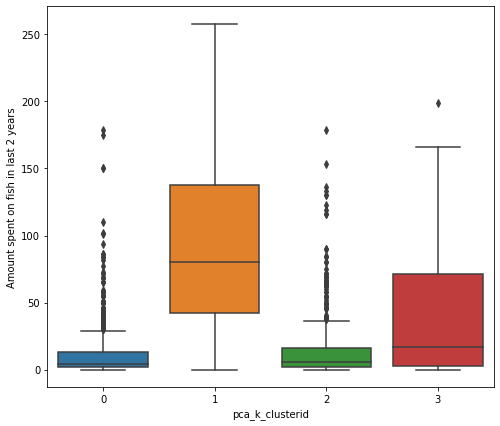

In [432]:
plt.figure(figsize=(8,7))
sns.boxplot(x='pca_k_clusterid', y='MntFishProducts', data=df3)
plt.ylabel('Amount spent on fish in last 2 years')
plt.show()

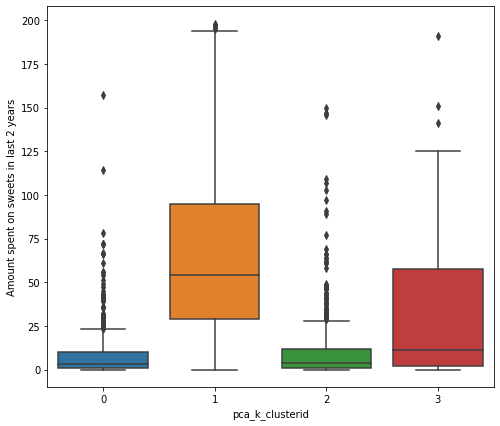

In [433]:
plt.figure(figsize=(8,7))
sns.boxplot(x='pca_k_clusterid', y='MntSweetProducts', data=df3)
plt.ylabel('Amount spent on sweets in last 2 years')
plt.show()

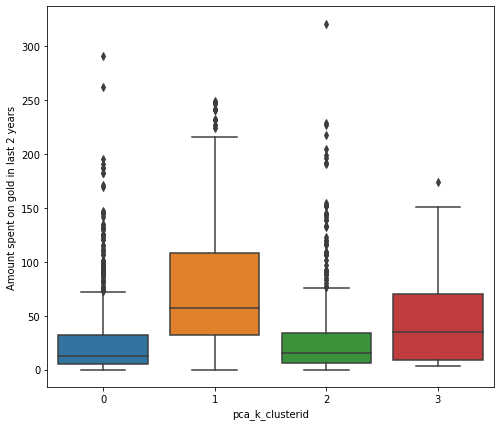

In [434]:
plt.figure(figsize=(8,7))
sns.boxplot(x='pca_k_clusterid', y='MntGoldProds', data=df3)
plt.ylabel('Amount spent on gold in last 2 years')
plt.show()

In [449]:
# Add a new column

l=[]
for i in df3["Income"]:
    if i<=50000:
        l.append("Low Income")
    else:
        l.append("High Income")
df3["Income_Groups"]=l
df3

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2234   8372        1974  Graduation        Married  34421.0        1   
2235  10870        1967  Graduation        Married  61223.0        0   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  Response  d_clusterid  \
0            0  2012-04-09       58       635  ...         1            0   
1            1  2014-08-03       38        11  ...         0            0   
2            0  2013-08-21       26       426  ...         0            1   
3            0  2014-10-02       26        11  ...         0            1   
4            0  2014-01-19       94       173  ...         0            2   
...        ...         ...      ...       ...  ...       ...          ...   
2234         0  2013-01-07       81         3  ...         0            6   
2235         1  2013-06-13       46       709  ...         0            6   
2237         0  2014-01-25       91       908  ...         0            4   
2238         1  2014-01-24        8       428  ...         0            3   
2239         1  2012-10-15       40        84  ...         1            2   

      k_clusterid  Expenses  NumPurchases  AcceptedCmp  Childrenhome  Age  \
0               1      1617            25            0             0   66   
1               1        27             6            0             2   69   
2               1       776            21            0             0   58   
3               1        53             8            0             1   39   
4               1       422            19            0             1   42   
...           ...       ...           ...          ...           ...  ...   
2234            2        30             4            0             1   49   
2235            2      1341            18            0             1   56   
2237            2      1241            19            1             0   42   
2238            1       843            23            0             1   67   
2239            1       172            11            0             2   69   

      pca_k_clusterid  Income_Groups  
0                   1    High Income  
1                   0     Low Income  
2                   1    High Income  
3                   0     Low Income  
4                   2    High Income  
...               ...            ...  
2234                2     Low Income  
2235                1    High Income  
2237                1    High Income  
2238                1    High Income  
2239                2    High Income  

[1938 rows x 38 columns]

<AxesSubplot:xlabel='pca_k_clusterid'>

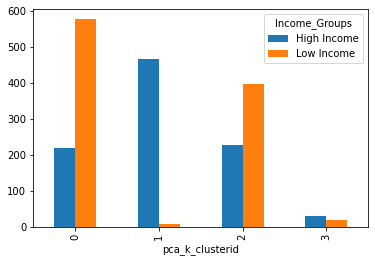

In [450]:
pd.crosstab(df3.pca_k_clusterid,df3.Income_Groups).plot(kind="bar")

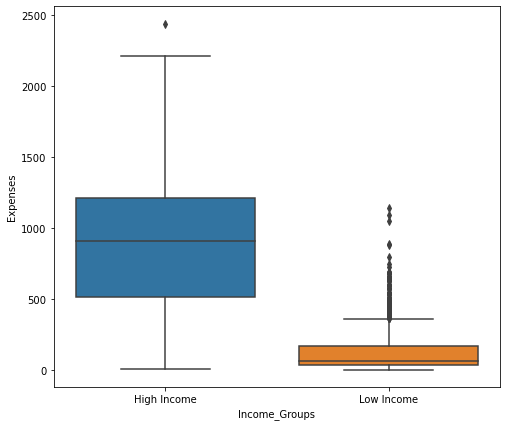

In [452]:
plt.figure(figsize=(8,7))
sns.boxplot(x='Income_Groups', y='Expenses', data=df3)
plt.ylabel('Expenses')
plt.show()

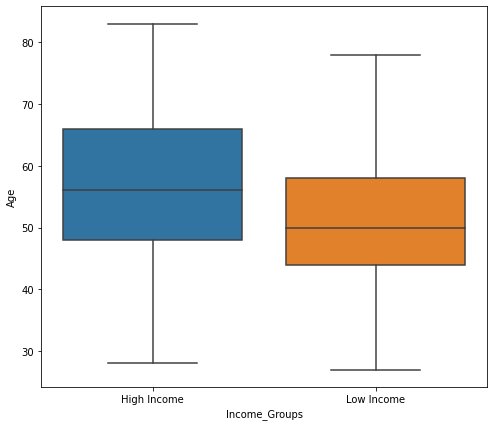

In [462]:
plt.figure(figsize=(8,7))
sns.boxplot(x='Income_Groups', y='Age', data=df3)
plt.ylabel('Age')
plt.show()

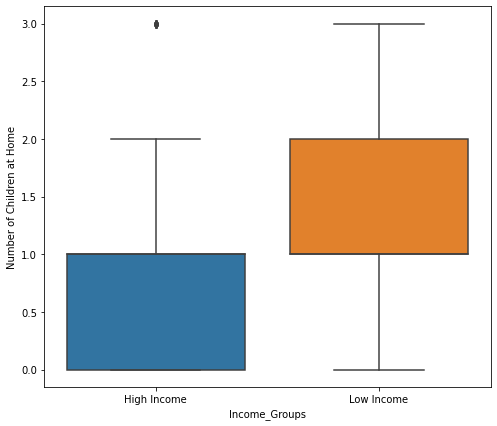

In [453]:
plt.figure(figsize=(8,7))
sns.boxplot(x='Income_Groups', y='Childrenhome', data=df3)
plt.ylabel('Number of Children at Home')
plt.show()

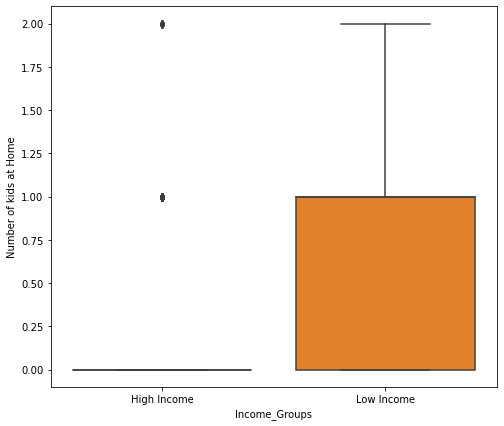

In [460]:
plt.figure(figsize=(8,7))
sns.boxplot(x='Income_Groups', y='Kidhome', data=df3)
plt.ylabel('Number of kids at Home')
plt.show()

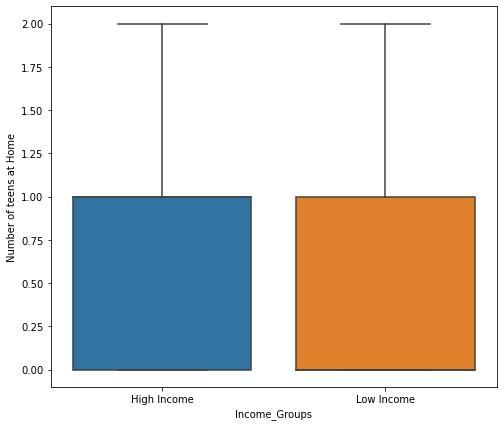

In [461]:
plt.figure(figsize=(8,7))
sns.boxplot(x='Income_Groups', y='Teenhome', data=df3)
plt.ylabel('Number of teens at Home')
plt.show()

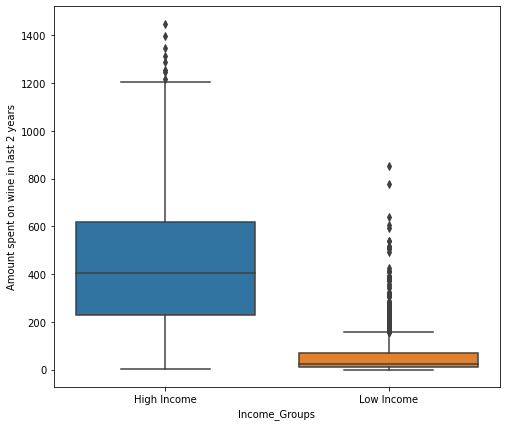

In [454]:
plt.figure(figsize=(8,7))
sns.boxplot(x='Income_Groups', y='MntWines', data=df3)
plt.ylabel('Amount spent on wine in last 2 years')
plt.show()

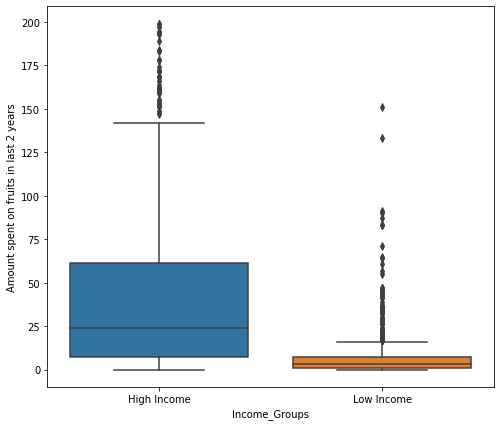

In [455]:
plt.figure(figsize=(8,7))
sns.boxplot(x='Income_Groups', y='MntFruits', data=df3)
plt.ylabel('Amount spent on fruits in last 2 years')
plt.show()

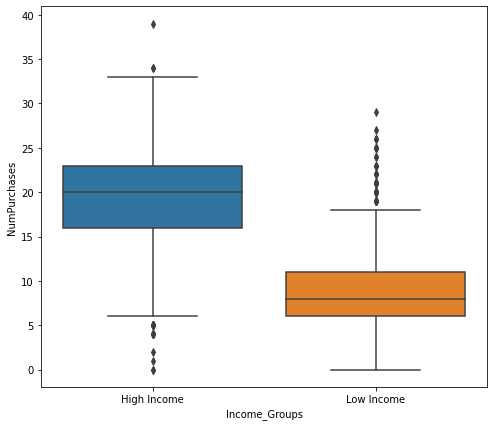

In [456]:
plt.figure(figsize=(8,7))
sns.boxplot(x='Income_Groups', y='NumPurchases', data=df3)
plt.ylabel('NumPurchases')
plt.show()

<AxesSubplot:xlabel='Education'>

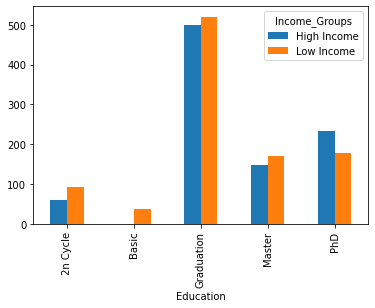

In [457]:
pd.crosstab(df3.Education,df3.Income_Groups).plot(kind="bar")

<AxesSubplot:xlabel='Marital_Status'>

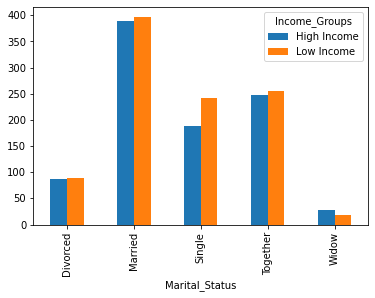

In [458]:
pd.crosstab(df3.Marital_Status,df3.Income_Groups).plot(kind="bar")

## 1) Logistic Regression

In [463]:
# Dividing our data into input and output variables 
x=pca_features.iloc[:,0:18]
y=pca_features.iloc[:,18]

In [464]:
x

pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
0     4.591837 -1.582758  1.969236 -0.706414  3.175963 -0.402749 -0.031313   
1    -2.027604 -0.203639  0.566938 -1.204806 -0.139986 -1.555985 -0.611416   
2     2.356575 -0.380604  0.491356 -1.331237 -0.884271  0.588634  0.653379   
3    -2.399422 -1.346598  0.608499 -1.157402 -0.775155  0.692044  0.988250   
4     0.088447  0.180086 -0.954074  1.676558  0.471140  0.329084  0.964092   
...        ...       ...       ...       ...       ...       ...       ...   
1933 -2.607511 -1.388337  0.395945  1.184227 -1.321082 -0.541036  0.052519   
1934  3.326818  0.415394  2.169299  1.516802 -0.321195  0.404366 -0.079137   
1935  1.955461  0.696170  0.611075 -0.040693 -0.689744 -1.444050 -0.463200   
1936  2.550842  1.497913 -1.248239 -1.676000 -0.226739  1.633304 -1.399900   
1937 -1.560138  1.593524 -0.830590  1.203247  1.658192 -0.963024  0.617371   

           pc8       pc9      pc10      pc11      pc12      pc13      pc14  \
0    -0.514342 -0.012639  0.331137 -0.702328  0.368176  0.124332 -0.117842   
1     0.549211 -0.546364  1.178333 -0.788128  0.276268  0.178744 -0.435888   
2    -0.332883  0.698154  0.229497 -0.205060 -0.179833 -1.148744  0.382734   
3    -0.228774  0.988273 -0.366855 -0.474207 -0.237676 -1.004280  0.060575   
4     0.178216 -1.005345 -1.690640 -0.091998  0.069571  0.915453  0.322604   
...        ...       ...       ...       ...       ...       ...       ...   
1933  0.276441  0.321386 -0.393615 -0.121377 -0.148849  0.676245 -0.213881   
1934 -0.346522 -0.557873  0.481601  0.801878 -0.737476  0.513243  0.224424   
1935  3.272334  1.847482 -1.501351  1.923983  1.749729 -1.899213 -1.284996   
1936 -0.915542  0.918315  1.054886 -0.274893 -0.679123 -0.729725  0.446269   
1937 -2.204542 -0.114165 -0.207741 -1.021392  0.590993  0.011178  0.043333   

          pc15      pc16      pc17      pc18  
0     0.236199  0.333699  0.598430 -0.001918  
1     0.964910 -0.692941 -0.205835  1.041133  
2    -0.165914 -0.702732 -0.006251 -0.519578  
3    -0.371773 -0.413716  0.404102 -0.209779  
4    -0.409107 -0.037902  1.862199 -0.289991  
...        ...       ...       ...       ...  
1933  0.004528  0.002050  0.780232 -0.321481  
1934 -0.048422 -0.534876 -0.409124 -0.094817  
1935 -1.202494  1.131364 -0.049417 -3.236151  
1936  0.025020 -0.397148 -0.254133  0.332336  
1937  0.704356 -0.288422  0.355440  0.184064  

[1938 rows x 18 columns]

In [465]:
y

0       1
1       0
2       1
3       0
4       2
       ..
1933    2
1934    1
1935    1
1936    1
1937    2
Name: k_clusterid, Length: 1938, dtype: int32

## Test-Train Split

In [466]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,shuffle=True)

In [467]:
x_train.shape

(1356, 18)

In [468]:
y_train.shape

(1356,)

In [469]:
x_test.shape

(582, 18)

In [470]:
y_test.shape

(582,)

## Logistic regression and fit the model

In [471]:
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

In [472]:
classifier.intercept_

array([ 3.67514453, -3.87541872,  2.80418693, -2.60391273])

In [473]:
classifier.coef_

array([[-2.08377702,  0.44028079,  0.10211562, -2.20553278,  0.28910191,
         0.23565082,  0.04128887,  0.73736965,  0.19607739, -0.23971044,
         0.17621733,  0.35185047,  0.22060261,  0.18000212,  0.10422972,
        -0.43754553, -0.28788977,  0.29983564],
       [ 3.36350623, -0.8139862 ,  0.14029034, -0.63970411,  0.39602559,
         0.06345344, -0.57586315,  0.17962773,  0.03056596, -0.29085729,
        -0.04802685,  0.46427366, -0.21290518,  0.32167805,  0.51160437,
        -0.49005879, -0.06780959, -0.16250882],
       [-1.75249028,  0.74846593, -0.19314742,  3.14717514, -0.51723223,
         0.34693795,  0.25932864, -0.32162275,  0.33268906,  0.12959827,
        -0.10095706, -0.03794486,  0.27667377, -0.15265221, -0.16898401,
        -0.27614751,  0.02426557, -0.08906462],
       [ 0.47276107, -0.37476051, -0.04925853, -0.30193825, -0.16789527,
        -0.64604221,  0.27524564, -0.59537462, -0.55933241,  0.40096946,
        -0.02723341, -0.77817928, -0.28437119, -0.349

## Model Accuracy on Training Dataset

In [474]:
y_train_pred=classifier.predict(x_train)

In [475]:
pca_logistic_train_ac=ac(y_train,y_train_pred)
pca_logistic_train_ac

0.9985250737463127

In [476]:
y_train_pred_df = pd.DataFrame({'actual': y_train,
                                'predicted_values': classifier.predict(x_train)})
y_train_pred_df

actual  predicted_values
142        0                 0
213        0                 0
855        1                 1
539        2                 2
179        0                 0
...      ...               ...
1297       1                 1
1702       0                 0
773        2                 2
365        0                 0
691        2                 2

[1356 rows x 2 columns]

## Model Accuracy on Testing Dataset

In [477]:
y_test_pred=classifier.predict(x_test)

In [478]:
pca_logistic_test_ac=ac(y_test,y_test_pred)
pca_logistic_test_ac

0.993127147766323

In [479]:
y_test_pred_df = pd.DataFrame({'actual': y_test,
                                'predicted_values': classifier.predict(x_test)})
y_test_pred_df

actual  predicted_values
1503       0                 0
998        2                 2
51         0                 0
1901       0                 0
141        1                 1
...      ...               ...
185        0                 0
1603       2                 2
887        2                 2
1890       0                 0
1584       1                 1

[582 rows x 2 columns]

In [480]:
pca_logistic_accuracy_df = pd.DataFrame({'Training Accuracy (%)': [np.round(pca_logistic_train_ac*100,2)], 
                            'Testing Accuracy (%)': [np.round(pca_logistic_test_ac*100,2)]})
pca_logistic_accuracy_df

Training Accuracy (%)  Testing Accuracy (%)
0                  99.85                 99.31

## Confusion Matrix for the model accuracy

In [481]:
confusion_matrix(y_test_pred,y_test)

array([[236,   2,   1,   0],
       [  0, 148,   1,   0],
       [  0,   0, 187,   0],
       [  0,   0,   0,   7]], dtype=int64)

## Classification report

In [482]:
print(classification_report(y_test_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       239
           1       0.99      0.99      0.99       149
           2       0.99      1.00      0.99       187
           3       1.00      1.00      1.00         7

    accuracy                           0.99       582
   macro avg       0.99      1.00      0.99       582
weighted avg       0.99      0.99      0.99       582



## 2) Decision Tree

In [483]:
# Dividing our data into input and output variables 
x=pca_features.iloc[:,0:18]
y=pca_features.iloc[:,18]

In [484]:
# Splitting data into training and testing datasets
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=10)

## Building Decision Tree Classifier using gini Criteria

In [485]:
model = DecisionTreeClassifier(criterion= 'gini', max_depth=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

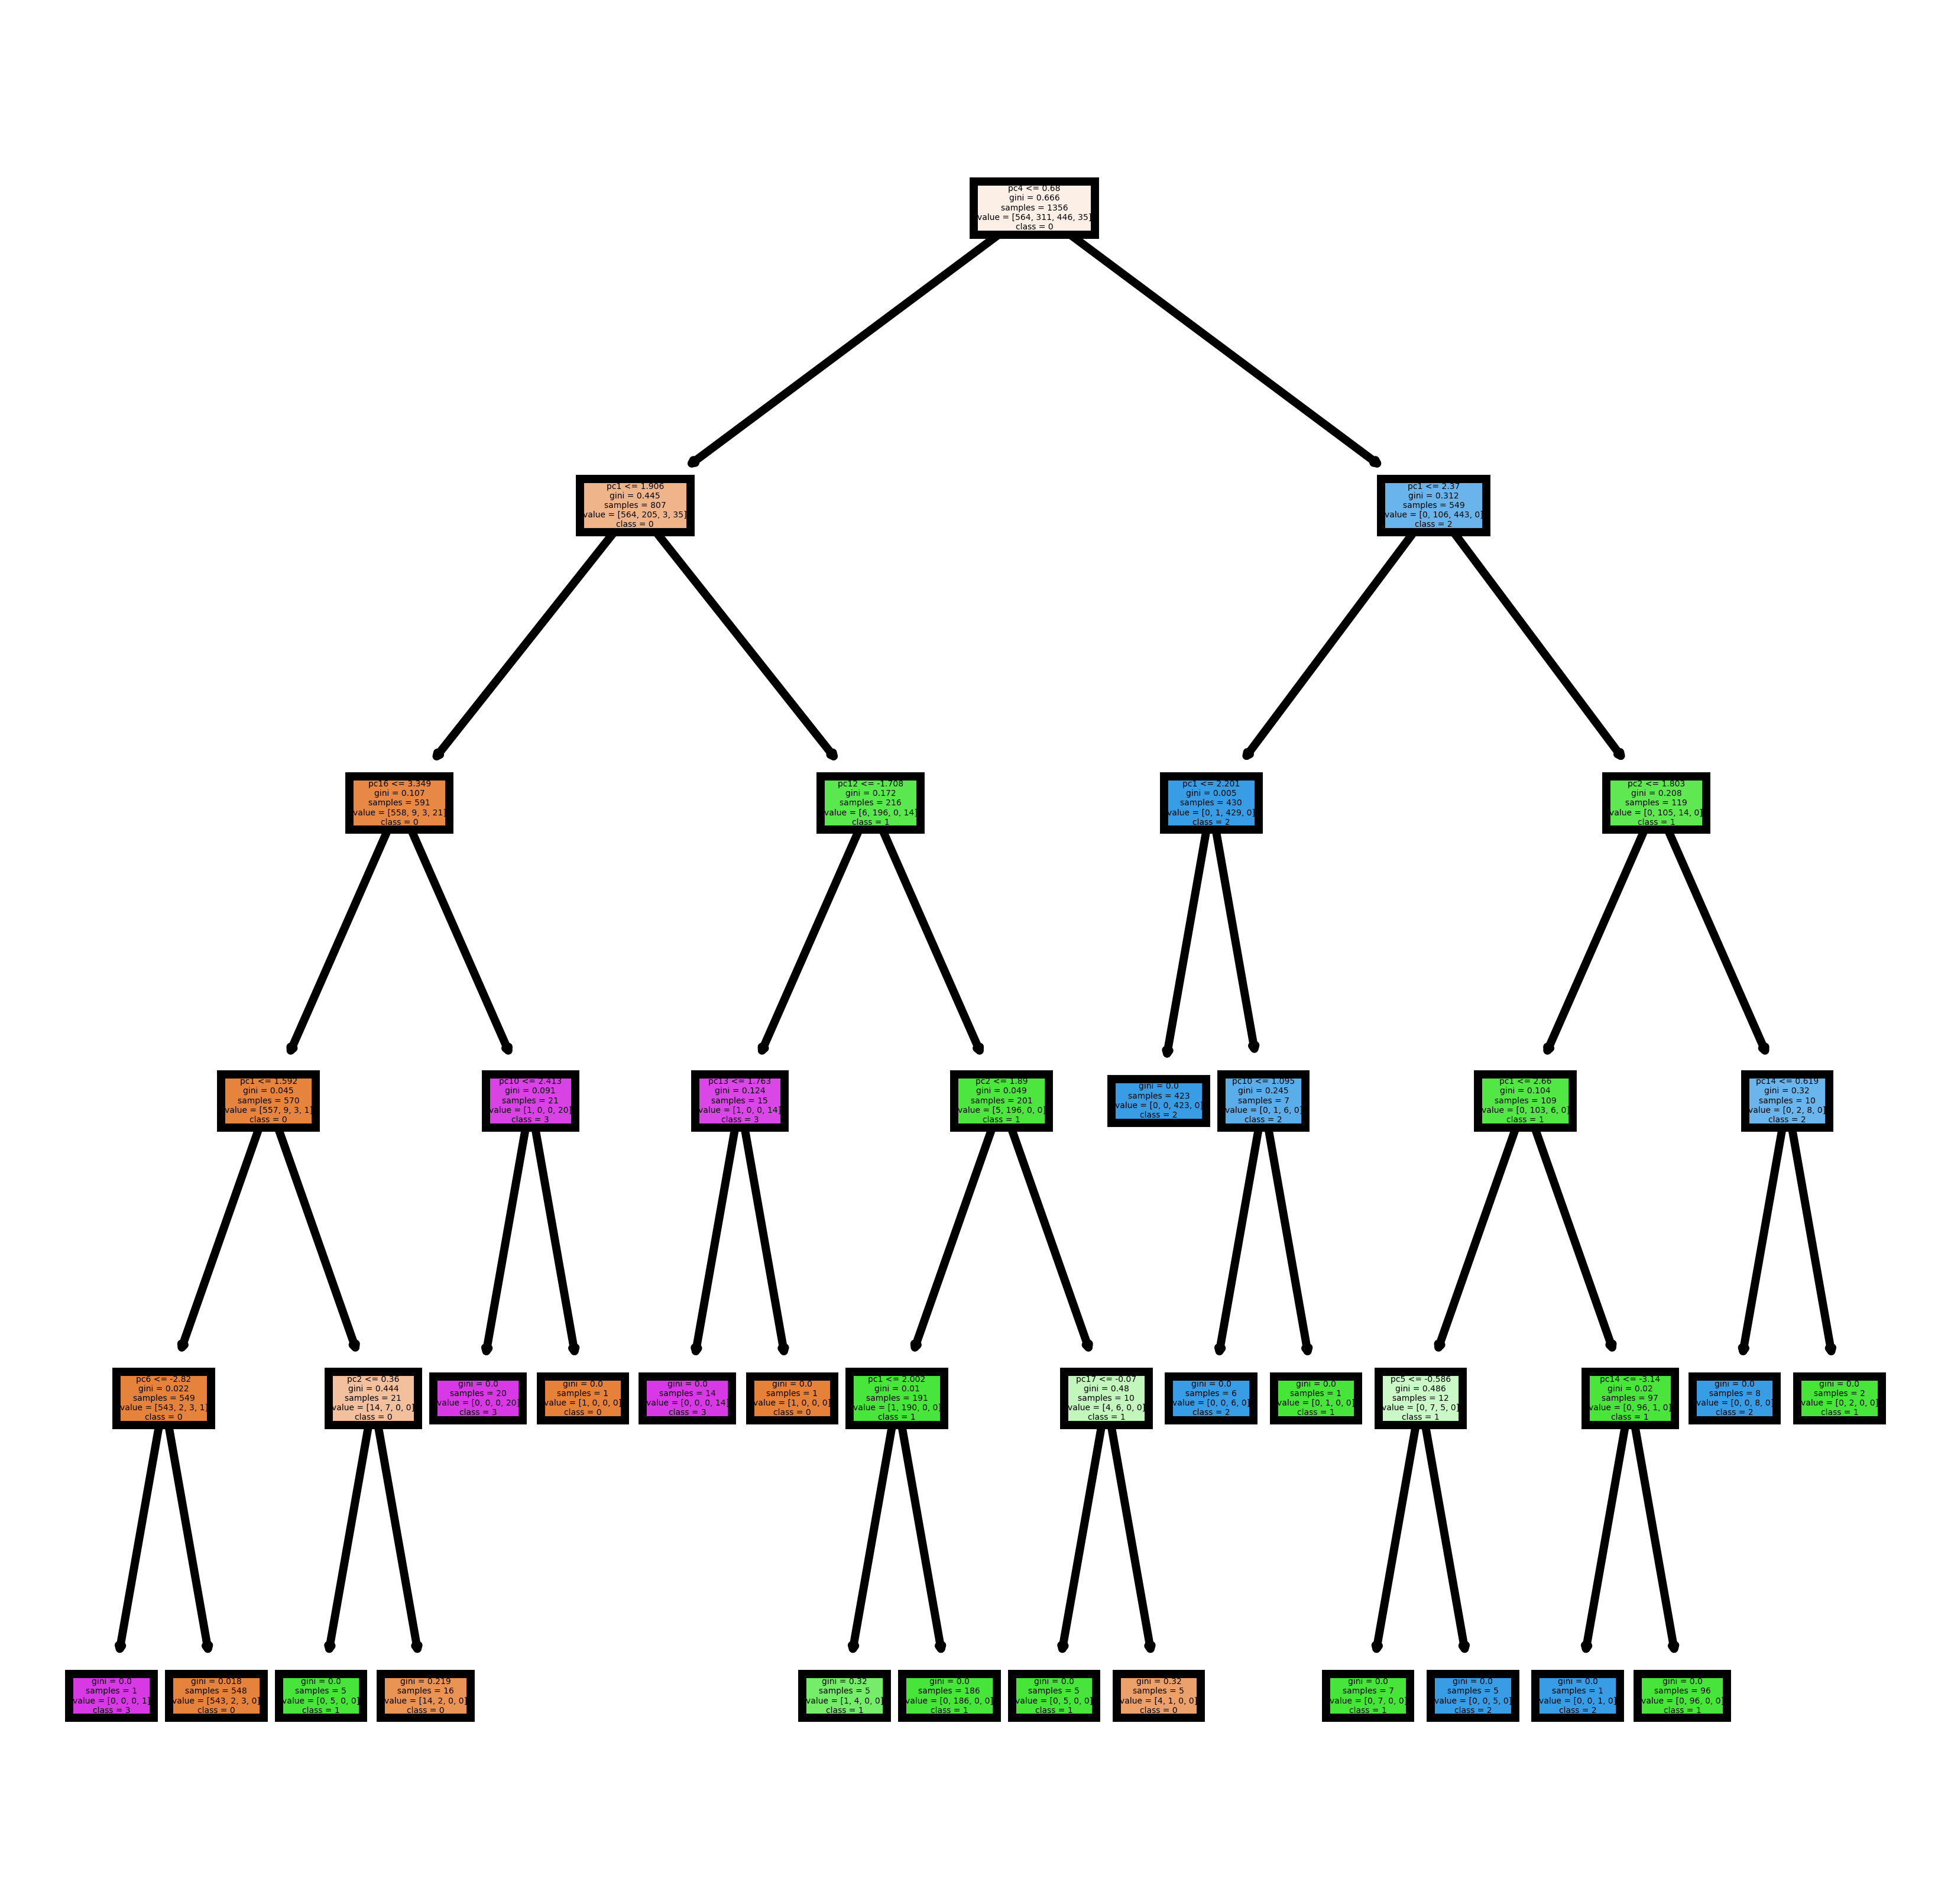

In [486]:
fn=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13','pc14','pc15','pc16','pc17','pc18']
cn=['0','1','2','3']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi=1000)
tree.plot_tree(model,
              feature_names = fn,
              class_names = cn,
              filled = True);

## Model Accuracy on Testing Dataset

In [487]:
# Predicting on test data
y_test_pred = model.predict(x_test) # Predicting on test dataset
pd.Series(y_test_pred).value_counts() # Getting the count of each class

0    237
2    181
1    152
3     12
dtype: int64

In [488]:
pca_DT1_test_ac=metrics.accuracy_score(y_test_pred,y_test)
pca_DT1_test_ac

0.9673539518900344

## Model Accuracy on Training Dataset

In [489]:
y_train_pred = model.predict(x_train)
pca_DT1_train_ac=metrics.accuracy_score(y_train_pred,y_train)
pca_DT1_train_ac

0.9933628318584071

In [490]:
pca_DT1_accuracy_df = pd.DataFrame({'Training Accuracy (%)': [np.round(pca_DT1_train_ac*100,2)], 
                            'Testing Accuracy (%)': [np.round(pca_DT1_test_ac*100,2)]})
pca_DT1_accuracy_df

Training Accuracy (%)  Testing Accuracy (%)
0                  99.34                 96.74

## Building Decision Tree Classifier using entropy Criteria

In [491]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

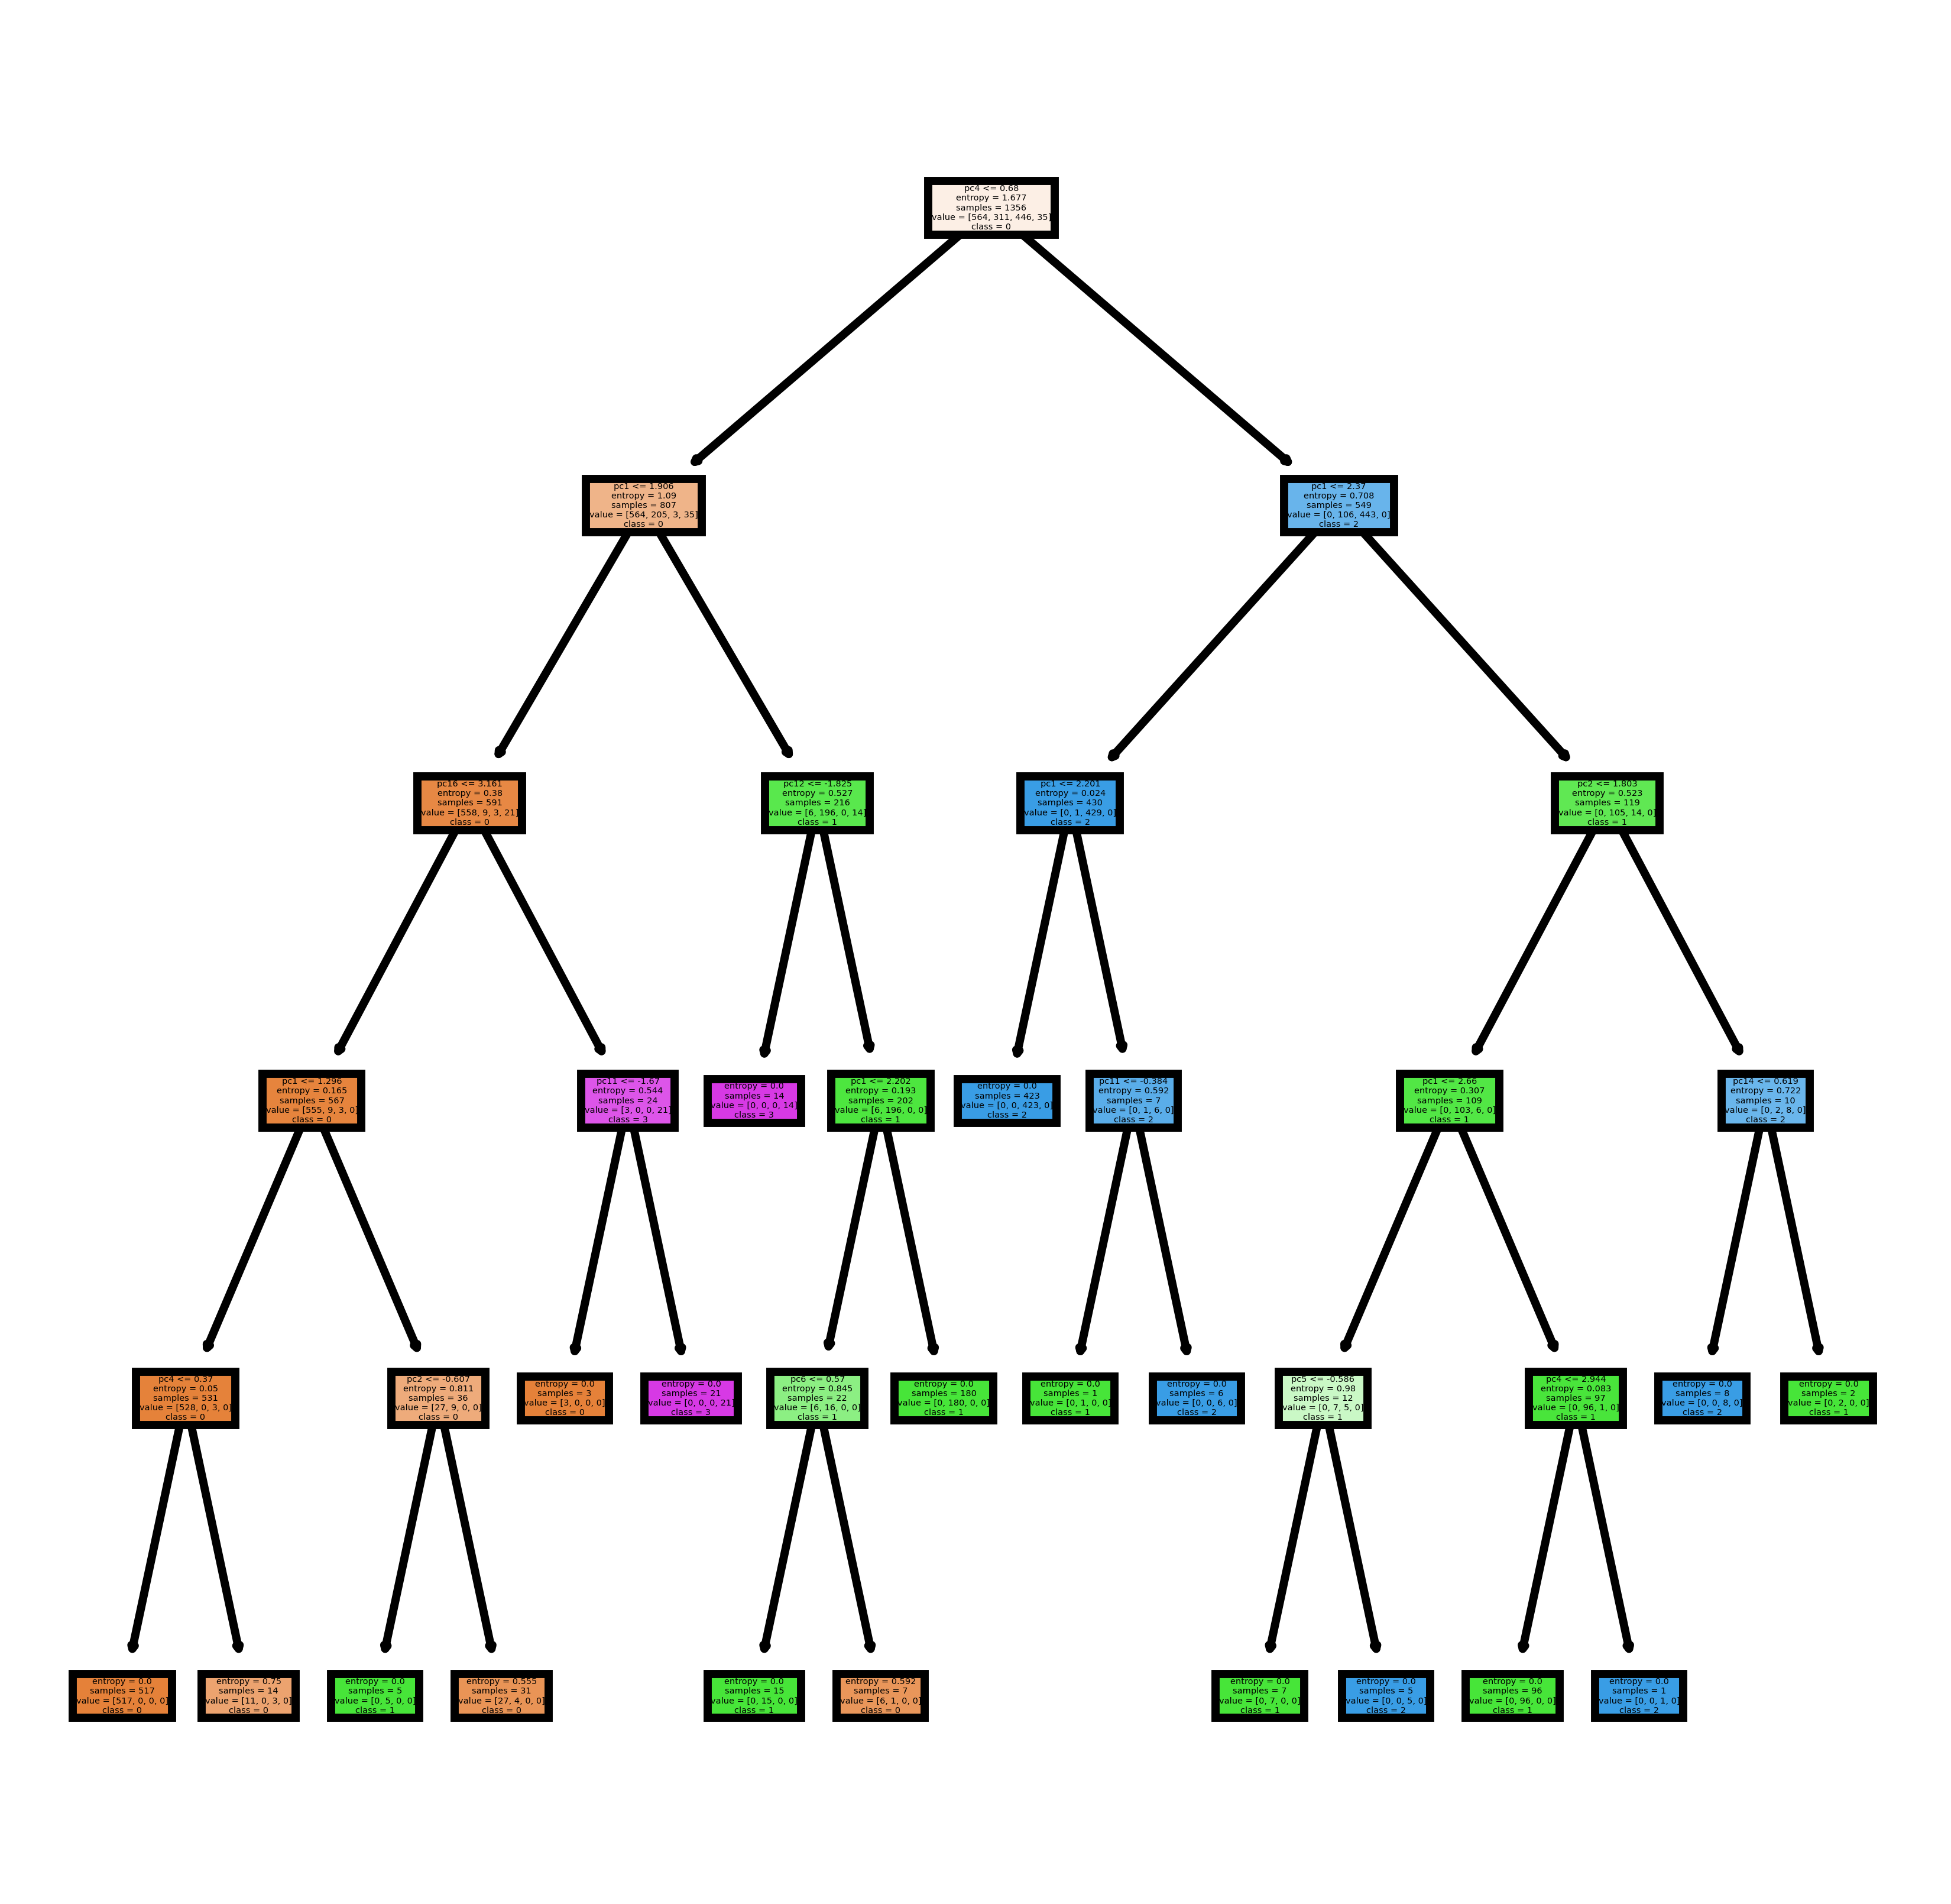

In [492]:
fn=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13','pc14','pc15','pc16','pc17','pc18']
cn=['0','1','2','3']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi=1000)
tree.plot_tree(model,
              feature_names = fn,
              class_names = cn,
              filled = True);

## Model Accuracy on Testing Dataset

In [493]:
# Predicting on test data
y_test_pred = model.predict(x_test) # Predicting on test dataset
pd.Series(y_test_pred).value_counts() # Getting the count of each class

0    237
2    181
1    151
3     13
dtype: int64

In [494]:
pca_DT2_test_ac=metrics.accuracy_score(y_test_pred,y_test)
pca_DT2_test_ac

0.9673539518900344

## Model Accuracy on Training Dataset

In [495]:
y_train_pred = model.predict(x_train)
pca_DT2_train_ac=metrics.accuracy_score(y_train_pred,y_train)
pca_DT2_train_ac

0.9941002949852508

In [496]:
pca_DT2_accuracy_df = pd.DataFrame({'Training Accuracy (%)': [np.round(pca_DT2_train_ac*100,2)], 
                            'Testing Accuracy (%)': [np.round(pca_DT2_test_ac*100,2)]})
pca_DT2_accuracy_df

Training Accuracy (%)  Testing Accuracy (%)
0                  99.41                 96.74

## 3) Random Forests

In [497]:
array = pca_features.values
X = array[:,0:18]
Y = array[:,18]

## Building Random Forest Classifier

In [498]:
num_trees = 200
max_features = 6

model = RandomForestClassifier(n_estimators=num_trees, max_samples=0.8, max_features=max_features, random_state=8)

In [499]:
results = cross_val_score(model, X, Y, cv=10)
pca_RF_test_ac=results.mean()
pca_RF_test_ac

0.9809037978740452

## 4) Boosting

In [500]:
array = pca_features.values
X = array[:,0:18]
Y = array[:,18]

## Building AdaBoost Classifier

In [501]:
num_trees = 10
model = AdaBoostClassifier(n_estimators=num_trees, learning_rate=0.5, random_state=8)

In [502]:
results = cross_val_score(model, X, Y, cv=10)
pca_Boosting_test_ac=results.mean()
pca_Boosting_test_ac

0.9453047379947652

## Visualising the CV results

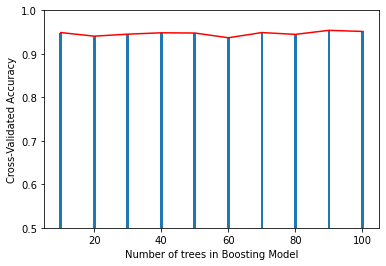

In [503]:
num_trees_range = [10*i for i in range(1,11)]
results = []
for n in num_trees_range:
    model = AdaBoostClassifier(n_estimators=n, learning_rate=0.5, random_state=8)
    scores = cross_val_score(model, X, Y, cv=5)
    results.append(scores.mean())
# plot
plt.bar(num_trees_range, results)
plt.plot(num_trees_range, results, color="red")
plt.xlabel('Number of trees in Boosting Model')
plt.ylabel('Cross-Validated Accuracy')
plt.ylim(0.5,1)
plt.show()

## 5) K-Nearest Neighbors (KNN)

In [504]:
array = pca_features.values
X = array[:,0:18]
Y = array[:,18]

In [505]:
X

array([[ 4.59183685e+00, -1.58275783e+00,  1.96923635e+00, ...,
         3.33699024e-01,  5.98430129e-01, -1.91781439e-03],
       [-2.02760363e+00, -2.03639103e-01,  5.66938000e-01, ...,
        -6.92940682e-01, -2.05834997e-01,  1.04113320e+00],
       [ 2.35657525e+00, -3.80604150e-01,  4.91355594e-01, ...,
        -7.02731537e-01, -6.25142115e-03, -5.19577749e-01],
       ...,
       [ 1.95546056e+00,  6.96170051e-01,  6.11074681e-01, ...,
         1.13136377e+00, -4.94169377e-02, -3.23615052e+00],
       [ 2.55084210e+00,  1.49791260e+00, -1.24823908e+00, ...,
        -3.97147736e-01, -2.54132747e-01,  3.32335589e-01],
       [-1.56013848e+00,  1.59352414e+00, -8.30589525e-01, ...,
        -2.88421838e-01,  3.55440059e-01,  1.84063567e-01]])

In [506]:
Y

array([1., 0., 1., ..., 1., 1., 2.])

In [507]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,shuffle=True)

## KNN Model Building

In [508]:
model = KNeighborsClassifier(n_neighbors=9)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [509]:
pred=model.predict(x_test)
pca_KNN_test_ac=accuracy_score(pred,y_test)
pca_KNN_test_ac

0.9467353951890034

## Grid Search for Algorithm Tuning

In [510]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [511]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [512]:
print(grid.best_score_)
print(grid.best_params_)

0.9695529982151895
{'n_neighbors': 39}


## Visualising the CV results

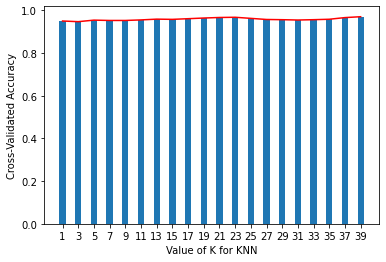

In [513]:
# choose k between 1 to 39
k_range = [2*i+1 for i in range(0,20)]
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=10)
    k_scores.append(scores.mean())
# plot
plt.bar(k_range, k_scores)
plt.plot(k_range, k_scores, color="red")
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_range)
plt.show()

## 6) Support Vector Machine (SVM)

In [514]:
array = pca_features.values
X = array[:,0:18]
Y = array[:,18]

In [515]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=15)

In [516]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1356, 18), (1356,), (582, 18), (582,))

In [517]:
clf = SVC(kernel="rbf",gamma=0.002)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy = ", acc)
confusion_matrix(y_test, y_pred)

Accuracy =  97.9381443298969


array([[224,   3,   0,   0],
       [  2, 141,   0,   0],
       [  0,   7, 188,   0],
       [  0,   0,   0,  17]], dtype=int64)

In [518]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       227
         1.0       0.93      0.99      0.96       143
         2.0       1.00      0.96      0.98       195
         3.0       1.00      1.00      1.00        17

    accuracy                           0.98       582
   macro avg       0.98      0.98      0.98       582
weighted avg       0.98      0.98      0.98       582



## Grid Search CV (Hyperparameter tuning)

In [519]:
clf = SVC()
param_grid = [{'kernel':["rbf"], 'gamma':[50,5,10,0.5,1,0.001,0.0001,0.00001],'C':[1,10,0.1] }]
gsv = GridSearchCV(clf,param_grid,cv=5)
gsv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 0.1],
                          'gamma': [50, 5, 10, 0.5, 1, 0.001, 0.0001, 1e-05],
                          'kernel': ['rbf']}])

In [520]:
gsv.best_params_, gsv.best_score_

({'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}, 0.9771299110049924)

### Building model using best parameters obtained in Grid Search CV

In [521]:
# Test data accuracy
clf = SVC(C=10, gamma=0.001, kernel="rbf")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
pca_SVM_test_ac = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", pca_SVM_test_ac)
confusion_matrix(y_test, y_pred)

Accuracy = 98.4536082474227


array([[225,   1,   1,   0],
       [  1, 142,   0,   0],
       [  0,   6, 189,   0],
       [  0,   0,   0,  17]], dtype=int64)

In [522]:
# Train data accuracy
clf = SVC(C=1, gamma=0.5, kernel="rbf")
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
pca_SVM_train_ac = accuracy_score(y_train, y_pred_train) * 100
print("Accuracy =", pca_SVM_train_ac)

Accuracy = 100.0


In [523]:
pca_SVM_accuracy_df = pd.DataFrame({'Training Accuracy (%)': [np.round(pca_SVM_train_ac,2)], 
                            'Testing Accuracy (%)': [np.round(pca_SVM_test_ac,2)]})
pca_SVM_accuracy_df

Training Accuracy (%)  Testing Accuracy (%)
0                  100.0                 98.45

## 7) Naive Bayes

In [524]:
array = pca_features_norm.values
X = array[:,0:18]
Y = array[:,18]

In [525]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=15)

In [526]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1356, 18), (1356,), (582, 18), (582,))

### Multinomial Naive Bayes

In [527]:
classifier_mb = MB()
classifier_mb.fit(X_train,y_train)

MultinomialNB()

### Test data accuracy

In [528]:
y_pred = classifier_mb.predict(X_test)
pca_NB1_test_ac = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", pca_NB1_test_ac)
confusion_matrix(y_test, y_pred)

Accuracy = 48.6254295532646


array([[227,   0,   0,   0],
       [122,   1,  20,   0],
       [140,   0,  55,   0],
       [ 17,   0,   0,   0]], dtype=int64)

In [529]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.45      1.00      0.62       227
         1.0       1.00      0.01      0.01       143
         2.0       0.73      0.28      0.41       195
         3.0       0.00      0.00      0.00        17

    accuracy                           0.49       582
   macro avg       0.55      0.32      0.26       582
weighted avg       0.67      0.49      0.38       582



### Train data accuracy

In [530]:
y_pred_train = classifier_mb.predict(X_train)
pca_NB1_train_ac = accuracy_score(y_train, y_pred_train) * 100
print("Accuracy =", pca_NB1_train_ac)

Accuracy = 50.958702064896755


In [531]:
pca_NB1_accuracy_df = pd.DataFrame({'Training Accuracy (%)': [np.round(pca_NB1_train_ac,2)], 
                            'Testing Accuracy (%)': [np.round(pca_NB1_test_ac,2)]})
pca_NB1_accuracy_df

Training Accuracy (%)  Testing Accuracy (%)
0                  50.96                 48.63

### Gaussian Naive Bayes

In [532]:
classifier_gb = GB()
classifier_gb.fit(X_train,y_train)

GaussianNB()

### Test data accuracy

In [533]:
y_pred = classifier_gb.predict(X_test)
pca_NB2_test_ac = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", pca_NB2_test_ac)
confusion_matrix(y_test, y_pred)

Accuracy = 94.84536082474226


array([[225,   1,   1,   0],
       [ 10, 121,  12,   0],
       [  0,   6, 189,   0],
       [  0,   0,   0,  17]], dtype=int64)

In [534]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97       227
         1.0       0.95      0.85      0.89       143
         2.0       0.94      0.97      0.95       195
         3.0       1.00      1.00      1.00        17

    accuracy                           0.95       582
   macro avg       0.96      0.95      0.95       582
weighted avg       0.95      0.95      0.95       582



### Train data accuracy

In [535]:
y_pred_train = classifier_gb.predict(X_train)
pca_NB2_train_ac = accuracy_score(y_train, y_pred_train) * 100
print("Accuracy =", pca_NB2_train_ac)

Accuracy = 95.35398230088495


In [536]:
pca_NB2_accuracy_df = pd.DataFrame({'Training Accuracy (%)': [np.round(pca_NB2_train_ac,2)], 
                            'Testing Accuracy (%)': [np.round(pca_NB2_test_ac,2)]})
pca_NB2_accuracy_df

Training Accuracy (%)  Testing Accuracy (%)
0                  95.35                 94.85

## 8) Gradient Boosting

In [537]:
array = pca_features_norm.values
X = array[:,0:18]
Y = array[:,18]

In [538]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=15)

In [539]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1356, 18), (1356,), (582, 18), (582,))

## Gradient Boosting Model Building

In [540]:
gb_classifier = GradientBoostingClassifier(n_estimators=50)
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=50)

In [541]:
y_pred = gb_classifier.predict(X_test)
pca_GB_test_ac=accuracy_score(y_pred,y_test)
pca_GB_test_ac

0.9656357388316151

In [542]:
y_pred_train = gb_classifier.predict(X_train)
pca_GB_train_ac = accuracy_score(y_train, y_pred_train)
pca_GB_train_ac

1.0

In [543]:
pca_GB_accuracy_df = pd.DataFrame({'Training Accuracy (%)': [np.round(pca_GB_train_ac*100,2)], 
                            'Testing Accuracy (%)': [np.round(pca_GB_test_ac*100,2)]})
pca_GB_accuracy_df

Training Accuracy (%)  Testing Accuracy (%)
0                  100.0                 96.56

## 9) XGBoost

In [544]:
array = pca_features_norm.values
X = array[:,0:18]
Y = array[:,18]

In [545]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=15)

In [546]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1356, 18), (1356,), (582, 18), (582,))

## XGBoost Model Building

In [547]:
xgb_classifier = XGBClassifier(objective='multi:softmax', num_class=4, learning_rate=0.1, max_depth=3, n_estimators=100)
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_class=4,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [548]:
y_pred = xgb_classifier.predict(X_test)
pca_XGB_test_ac=accuracy_score(y_pred,y_test)
pca_XGB_test_ac

0.9742268041237113

In [549]:
y_pred_train = xgb_classifier.predict(X_train)
pca_XGB_train_ac = accuracy_score(y_train, y_pred_train)
pca_XGB_train_ac

1.0

In [550]:
pca_XGB_accuracy_df = pd.DataFrame({'Training Accuracy (%)': [np.round(pca_XGB_train_ac*100,2)], 
                            'Testing Accuracy (%)': [np.round(pca_XGB_test_ac*100,2)]})
pca_XGB_accuracy_df

Training Accuracy (%)  Testing Accuracy (%)
0                  100.0                 97.42

In [551]:
xgb_classifier = XGBClassifier(objective='multi:softmax', num_class=4)

# Define the hyperparameter grid for tuning
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 150]
}

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the accuracy of the model
data1_XGB_ac = accuracy_score(y_test, y_pred)
print("Best Parameters:", best_params)
print("Accuracy:", data1_XGB_ac)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
Accuracy: 0.9742268041237113


## 10) LightGBM

In [552]:
array = pca_features_norm.values
X = array[:,0:18]
Y = array[:,18]

In [553]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=15)

In [554]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1356, 18), (1356,), (582, 18), (582,))

## LightGBM Model Building

In [555]:
lgbm_classifier = LGBMClassifier()
lgbm_classifier.fit(X_train, y_train)

LGBMClassifier()

In [556]:
y_pred = lgbm_classifier.predict(X_test)
pca_LGBM_test_ac=accuracy_score(y_pred,y_test)
pca_LGBM_test_ac

0.9862542955326461

In [557]:
y_pred_train = lgbm_classifier.predict(X_train)
pca_LGBM_train_ac = accuracy_score(y_train, y_pred_train)
pca_LGBM_train_ac

1.0

In [558]:
pca_LGBM_accuracy_df = pd.DataFrame({'Training Accuracy (%)': [np.round(pca_LGBM_train_ac*100,2)], 
                            'Testing Accuracy (%)': [np.round(pca_LGBM_test_ac*100,2)]})
pca_LGBM_accuracy_df

Training Accuracy (%)  Testing Accuracy (%)
0                  100.0                 98.63

## Grid Search CV (Hyperparameter tuning)

In [559]:

# Define the parameter grids for each classifier

gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001]
}

xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001]
}

lgbm_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Initialize the classifiers
gb_classifier = GradientBoostingClassifier()
xgb_classifier = XGBClassifier()
lgbm_classifier = LGBMClassifier()

# Create a dictionary of classifiers and their corresponding parameter grids
classifiers = {
    'Gradient Boosting': (gb_classifier, gb_param_grid),
    'XGBoost': (xgb_classifier, xgb_param_grid),
    'LightGBM': (lgbm_classifier, lgbm_param_grid)
}

# Perform grid search cross-validation for each classifier
for name, (classifier, param_grid) in classifiers.items():
    print(f"Performing grid search for {name}...")
    grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=3)
    grid_search.fit(X_train, y_train)
    
    # Get the best parameters and best model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Make predictions on the test set using the best model
    y_pred = best_model.predict(X_test)

    # Evaluate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    print("Best Parameters:", best_params)
    print("Accuracy:", accuracy)

Performing grid search for Gradient Boosting...
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Accuracy: 0.9759450171821306
Performing grid search for XGBoost...
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 300}
Accuracy: 0.9759450171821306
Performing grid search for LightGBM...
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Accuracy: 0.9862542955326461


In [560]:
data1.head()

ID  Year_Birth   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0  5524        1957  58138.0        0         0       58       635         88   
1  2174        1954  46344.0        1         1       38        11          1   
2  4141        1965  71613.0        0         0       26       426         49   
3  6182        1984  26646.0        1         0       26        11          4   
4  5324        1981  58293.0        1         0       94       173         43   

   MntMeatProducts  MntFishProducts  ...  Marital_Status_Together  \
0              546              172  ...                        0   
1                6                2  ...                        0   
2              127              111  ...                        1   
3               20               10  ...                        1   
4              118               46  ...                        0   

   Marital_Status_Widow  Marital_Status_YOLO  Expenses  NumPurchases  \
0                     0                    0      1617            25   
1                     0                    0        27             6   
2                     0                    0       776            21   
3                     0                    0        53             8   
4                     0                    0       422            19   

   AcceptedCmp  Childrenhome  Age  clusterid  pca_k_clusterid  
0            0             0   66          1                1  
1            0             2   69          1                0  
2            0             0   58          1                1  
3            0             1   39          1                0  
4            0             1   42          1                2  

[5 rows x 44 columns]

In [561]:
data2.head()

ID   Income  Recency  NumWebVisitsMonth  Complain  Response  \
0  5524  58138.0       58                  7         0         1   
1  2174  46344.0       38                  5         0         0   
2  4141  71613.0       26                  4         0         0   
3  6182  26646.0       26                  6         0         0   
4  5324  58293.0       94                  5         0         0   

   Education_2n Cycle  Education_Basic  Education_Graduation  \
0                   0                0                     1   
1                   0                0                     1   
2                   0                0                     1   
3                   0                0                     1   
4                   0                0                     0   

   Education_Master  ...  Marital_Status_Single  Marital_Status_Together  \
0                 0  ...                      1                        0   
1                 0  ...                      1                        0   
2                 0  ...                      0                        1   
3                 0  ...                      0                        1   
4                 0  ...                      0                        0   

   Marital_Status_Widow  Marital_Status_YOLO  Expenses  NumPurchases  \
0                     0                    0      1617            25   
1                     0                    0        27             6   
2                     0                    0       776            21   
3                     0                    0        53             8   
4                     0                    0       422            19   

   AcceptedCmp  Childrenhome  Age  clusterid  
0            0             0   66          1  
1            0             2   69          1  
2            0             0   58          1  
3            0             1   39          1  
4            0             1   42          1  

[5 rows x 25 columns]

In [562]:
pca_features.head()

pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
0  4.591837 -1.582758  1.969236 -0.706414  3.175963 -0.402749 -0.031313   
1 -2.027604 -0.203639  0.566938 -1.204806 -0.139986 -1.555985 -0.611416   
2  2.356575 -0.380604  0.491356 -1.331237 -0.884271  0.588634  0.653379   
3 -2.399422 -1.346598  0.608499 -1.157402 -0.775155  0.692044  0.988250   
4  0.088447  0.180086 -0.954074  1.676558  0.471140  0.329084  0.964092   

        pc8       pc9      pc10      pc11      pc12      pc13      pc14  \
0 -0.514342 -0.012639  0.331137 -0.702328  0.368176  0.124332 -0.117842   
1  0.549211 -0.546364  1.178333 -0.788128  0.276268  0.178744 -0.435888   
2 -0.332883  0.698154  0.229497 -0.205060 -0.179833 -1.148744  0.382734   
3 -0.228774  0.988273 -0.366855 -0.474207 -0.237676 -1.004280  0.060575   
4  0.178216 -1.005345 -1.690640 -0.091998  0.069571  0.915453  0.322604   

       pc15      pc16      pc17      pc18  k_clusterid  
0  0.236199  0.333699  0.598430 -0.001918            1  
1  0.964910 -0.692941 -0.205835  1.041133            0  
2 -0.165914 -0.702732 -0.006251 -0.519578            1  
3 -0.371773 -0.413716  0.404102 -0.209779            0  
4 -0.409107 -0.037902  1.862199 -0.289991            2

In [563]:
data1.shape

(1938, 44)

In [564]:
data2.shape

(1938, 25)

In [565]:
pca_features.shape

(1938, 19)

In [566]:
Testing_Accuracy = {'Model': pd.Series(['Logistic Regression', 'Decision Tree', 'Random Forests', 'Boosting', 'K-Nearest Neighbors (KNN)', 'Support Vector Machine (SVM)','Naive Bayes', 'Gradient Boosting', 'XGBoost', 'LightGBM']),
                    'Baseline Models Accuracy (%)': pd.Series([round(data1_logistic_test_ac*100,2), round(data1_DT1_test_ac*100,2), round(data1_RF_test_ac*100,2), round(data1_Boosting_test_ac*100,2), round(data1_KNN_test_ac*100,2), round(data1_SVM_test_ac,2), round(data1_NB2_test_ac,2), round(data1_GB_test_ac*100,2), round(data1_XGB_test_ac*100,2), round(data1_LGBM_test_ac*100,2)]),
                    'Transformed Data Accuracy (%)': pd.Series([round(data2_logistic_test_ac*100,2), round(data2_DT1_test_ac*100,2), round(data2_RF_test_ac*100,2), round(data2_Boosting_test_ac*100,2), round(data2_KNN_test_ac*100,2), round(data2_SVM_test_ac,2), round(data2_NB2_test_ac,2), round(data2_GB_test_ac*100,2), round(data2_XGB_test_ac*100,2), round(data2_LGBM_test_ac*100,2)]),
                    'PCA Models Accuracy (%)': pd.Series([round(pca_logistic_test_ac*100,2), round(pca_DT1_test_ac*100,2), round(pca_RF_test_ac*100,2), round(pca_Boosting_test_ac*100,2), round(pca_KNN_test_ac*100,2), round(pca_SVM_test_ac,2), round(pca_NB2_test_ac,2), round(pca_GB_test_ac*100,2), round(pca_XGB_test_ac*100,2), round(pca_LGBM_test_ac*100,2)])}
Testing_Accuracy_df = pd.DataFrame(Testing_Accuracy)
Testing_Accuracy_df

Model  Baseline Models Accuracy (%)  \
0           Logistic Regression                         38.32   
1                 Decision Tree                         99.31   
2                Random Forests                        100.00   
3                      Boosting                         92.00   
4     K-Nearest Neighbors (KNN)                         36.94   
5  Support Vector Machine (SVM)                         47.42   
6                   Naive Bayes                         68.90   
7             Gradient Boosting                        100.00   
8                       XGBoost                        100.00   
9                      LightGBM                        100.00   

   Transformed Data Accuracy (%)  PCA Models Accuracy (%)  
0                          35.40                    99.31  
1                          99.31                    96.74  
2                         100.00                    98.09  
3                          92.00                    94.53  
4                          36.43                    94.67  
5                          47.42                    98.45  
6                          73.71                    94.85  
7                         100.00                    96.56  
8                         100.00                    97.42  
9                         100.00                    98.63